In [1]:
import sys
import os
repository_path = r"/home/emmanuel/EDCT/EQviewer"  ##change this path where is located the main directory
rep_data = os.path.join(repository_path,"data")
rep_out = os.path.join(repository_path,"example")
sys.path.insert(0,repository_path)

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import geopandas as gpd
from EQViewer import Catalog,Station,Shape
from EQViewer import seismic_profile,xy_seismic_profile
import EQViewer.utils as equt

# Seismic profile

## 1. Map

### 1.1 Region

In [3]:
lats = -5;latn = 15;lonw = -85;lone = -65 #castilla
reg = [lonw , lone, lats, latn ]

### 1.2 Catalog

In [4]:
cat_csv = os.path.join(rep_data,"CM_20160101T20220901_ok.csv")
df = pd.read_csv(cat_csv)
df = df.drop_duplicates(subset="id",ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40162 entries, 0 to 40161
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   No                       40162 non-null  int64  
 1   agency                   0 non-null      float64
 2   id                       40162 non-null  object 
 3   time_event               40162 non-null  object 
 4   latitude                 40162 non-null  float64
 5   latitude_uncertainty     0 non-null      float64
 6   longitude                40162 non-null  float64
 7   longitude_uncertainty    0 non-null      float64
 8   depth                    40162 non-null  float64
 9   depth_uncertainty        0 non-null      float64
 10  rms                      0 non-null      float64
 11  region                   0 non-null      float64
 12  method                   40162 non-null  object 
 13  earth_model              40162 non-null  object 
 14  event_type            

In order to use seismic_profiles scripts, you must change your seismic catalog format. We use origin_time,latitude,longitude,depth and magnitude columns. (depth in meters)

Here is a util function for this purpose. It renames those specific columns.

In [5]:
events = equt.transform_to_fmt_catalog(cat_csv,
        columns={"time_event":"origin_time"})
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292766 entries, 0 to 292765
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   No                       292766 non-null  int64         
 1   agency                   0 non-null       float64       
 2   id                       292766 non-null  object        
 3   origin_time              292766 non-null  datetime64[ns]
 4   latitude                 292766 non-null  float64       
 5   latitude_uncertainty     0 non-null       float64       
 6   longitude                292766 non-null  float64       
 7   longitude_uncertainty    0 non-null       float64       
 8   depth                    292766 non-null  float64       
 9   depth_uncertainty        0 non-null       float64       
 10  rms                      0 non-null       float64       
 11  region                   0 non-null       float64       
 12  method          

Make the seismic catalogs. This is a list of dictionaries containing the figure information. Here we only plot one seismic catalog.

In [8]:
catalogs = [Catalog(data=events, color = "lightblue",
                    style="c0.1c",
                    size=None,
                    cmap = True,
                    pen = "black"
            )
            ]
catalogs

### 1.3. Map

#### 1.3.1 My first map

Here is presented the seismic_profile.map function. It returns the figure, and the new catalog filtered by the previous defined region. 

/home/emmanuel/EDCT/EQviewer/EQViewer/seismic_profile.py:123: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


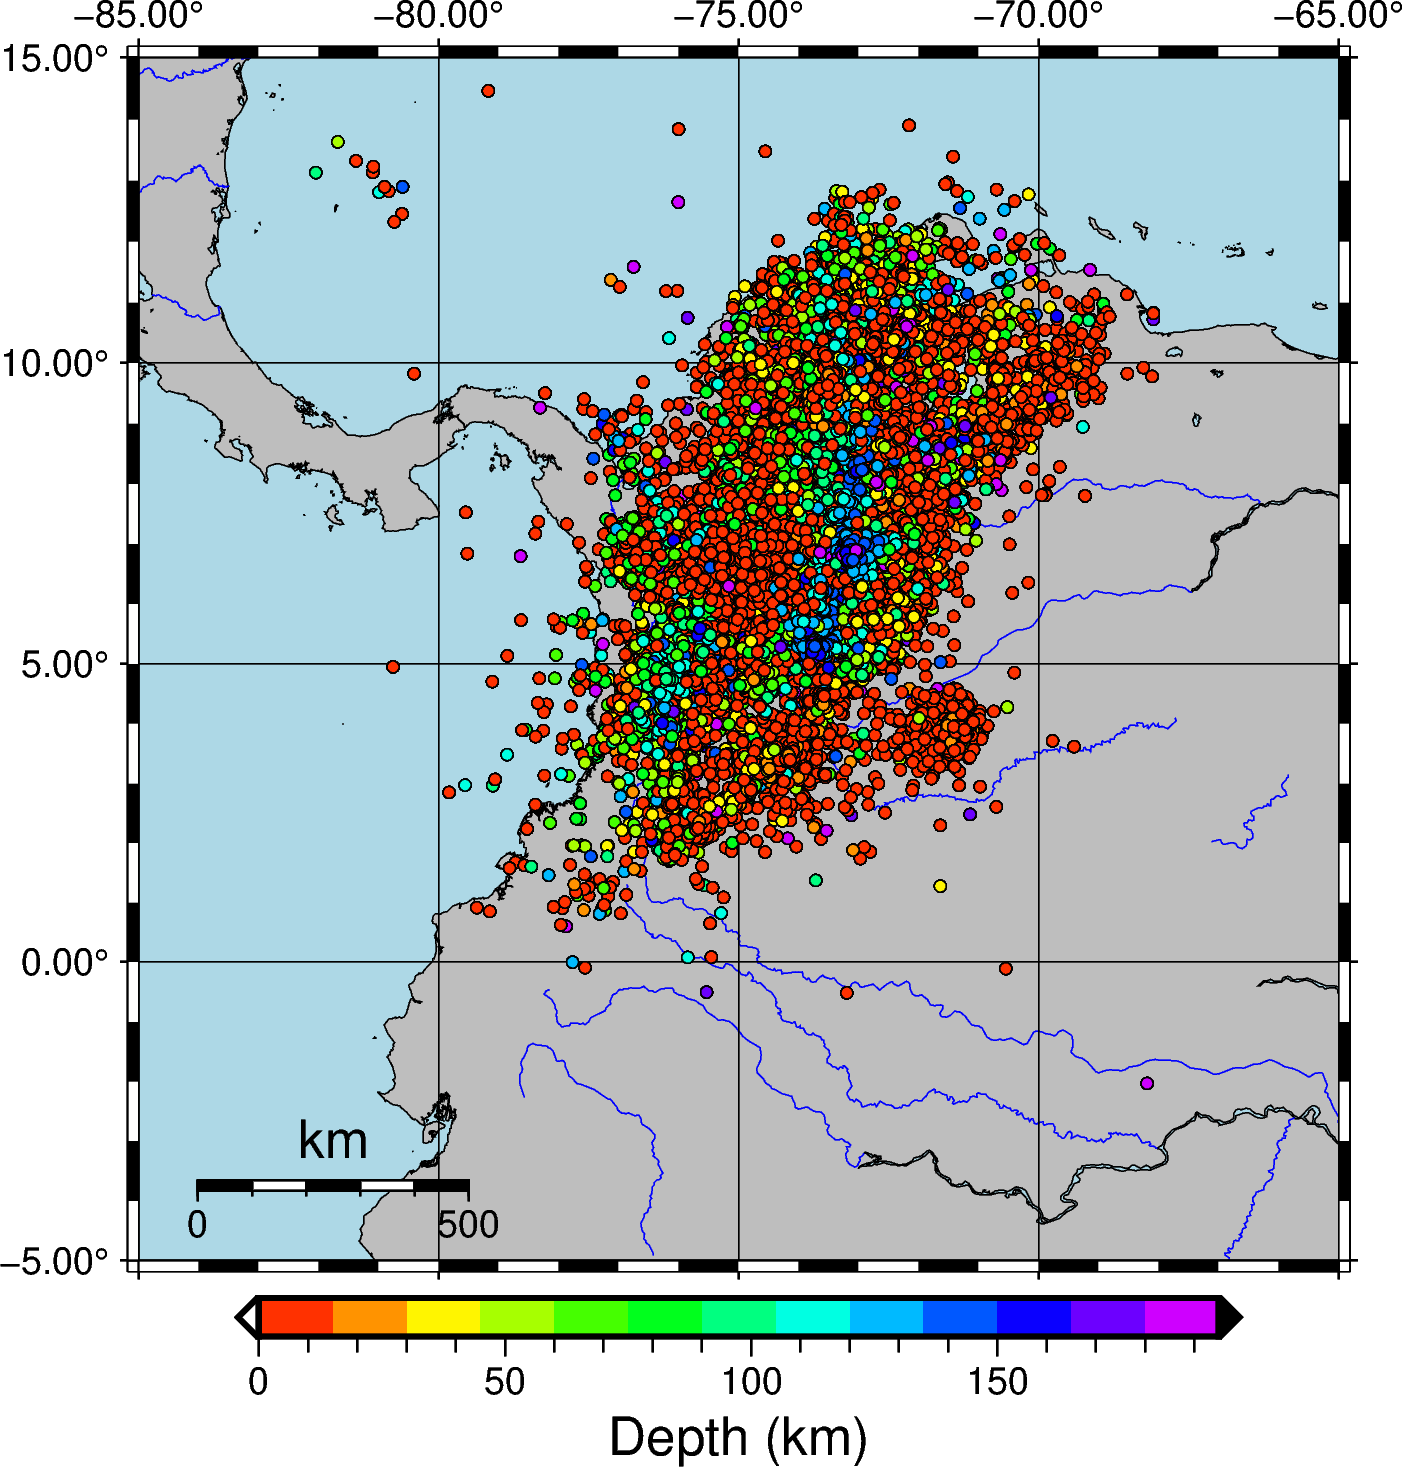

In [13]:
fig,new_catalog = seismic_profile.map(reg,catalogs=catalogs,
                cmap_args = {"cmap":'rainbow', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (km)", #label of the colorbar
                            "overrule_bg":True, #overrule True to color white and black for outliers.
                            "reverse":True, # reverse the colorbar
                            "series":[0, 200,15] }, #remove 200 if you want continous colorbar.
                                                    # [] empty to select the minimum and maximum values of the catalog
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar. 
                                "yloc":None, #if they are None, put bottom left as default.
                                "distance":500}, #distance en km
                legend=False
                )
fig.show()
outpath = os.path.join(rep_out,"mymap1.png")
fig.savefig(outpath,dpi=300)

#### 1.3.2. Other maps

other type of plots

/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:136: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


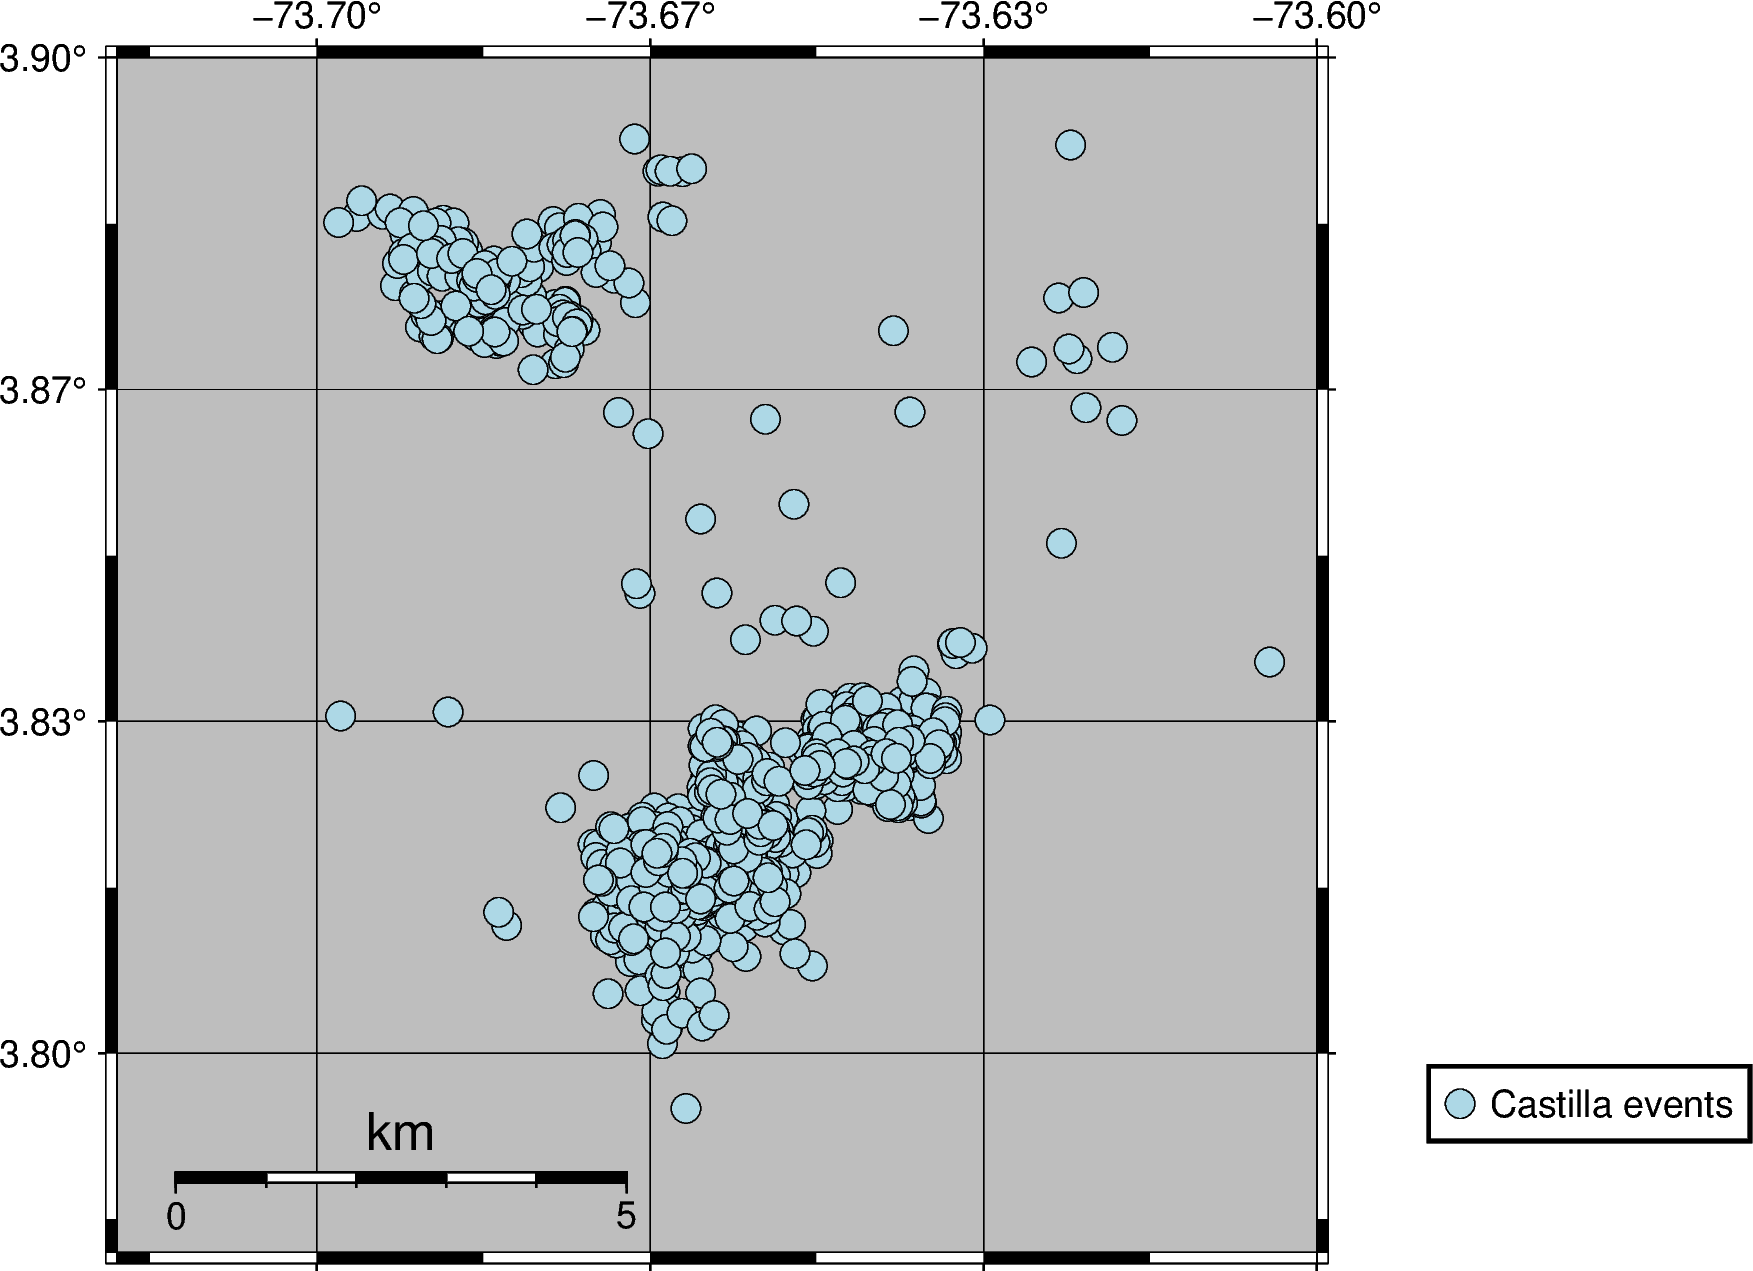

In [9]:
catalogs2 = [{"data":events[events["Type"]=="Cubarral"],
           "color": "lightblue", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"Castilla events"', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":None, # equation for the size
           "style" :"c0.25c", #circle in cm
           "cmap":False, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"black"} #color of the border
            ]
fig2,new_catalog2 = seismic_profile.map(reg,catalogs=catalogs2,
                cmap_args = {"cmap":'roma', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "reverse":False, # reverse the colorbar
                            "series":[0, 3e3] }, #remove 200 if you want continous colorbar
                                                # [] empty to select the minimum and maximum values of the catalog
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend_args = {"xloc":-73.59, #xloc,yloc are the x-y map coordinates to locate the legend.
                                "yloc":3.79},
                legend=True
                )
fig2.show()
outpath = os.path.join(rep_out,"mymap2.png")
fig2.savefig(outpath,dpi=300)

/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:122: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


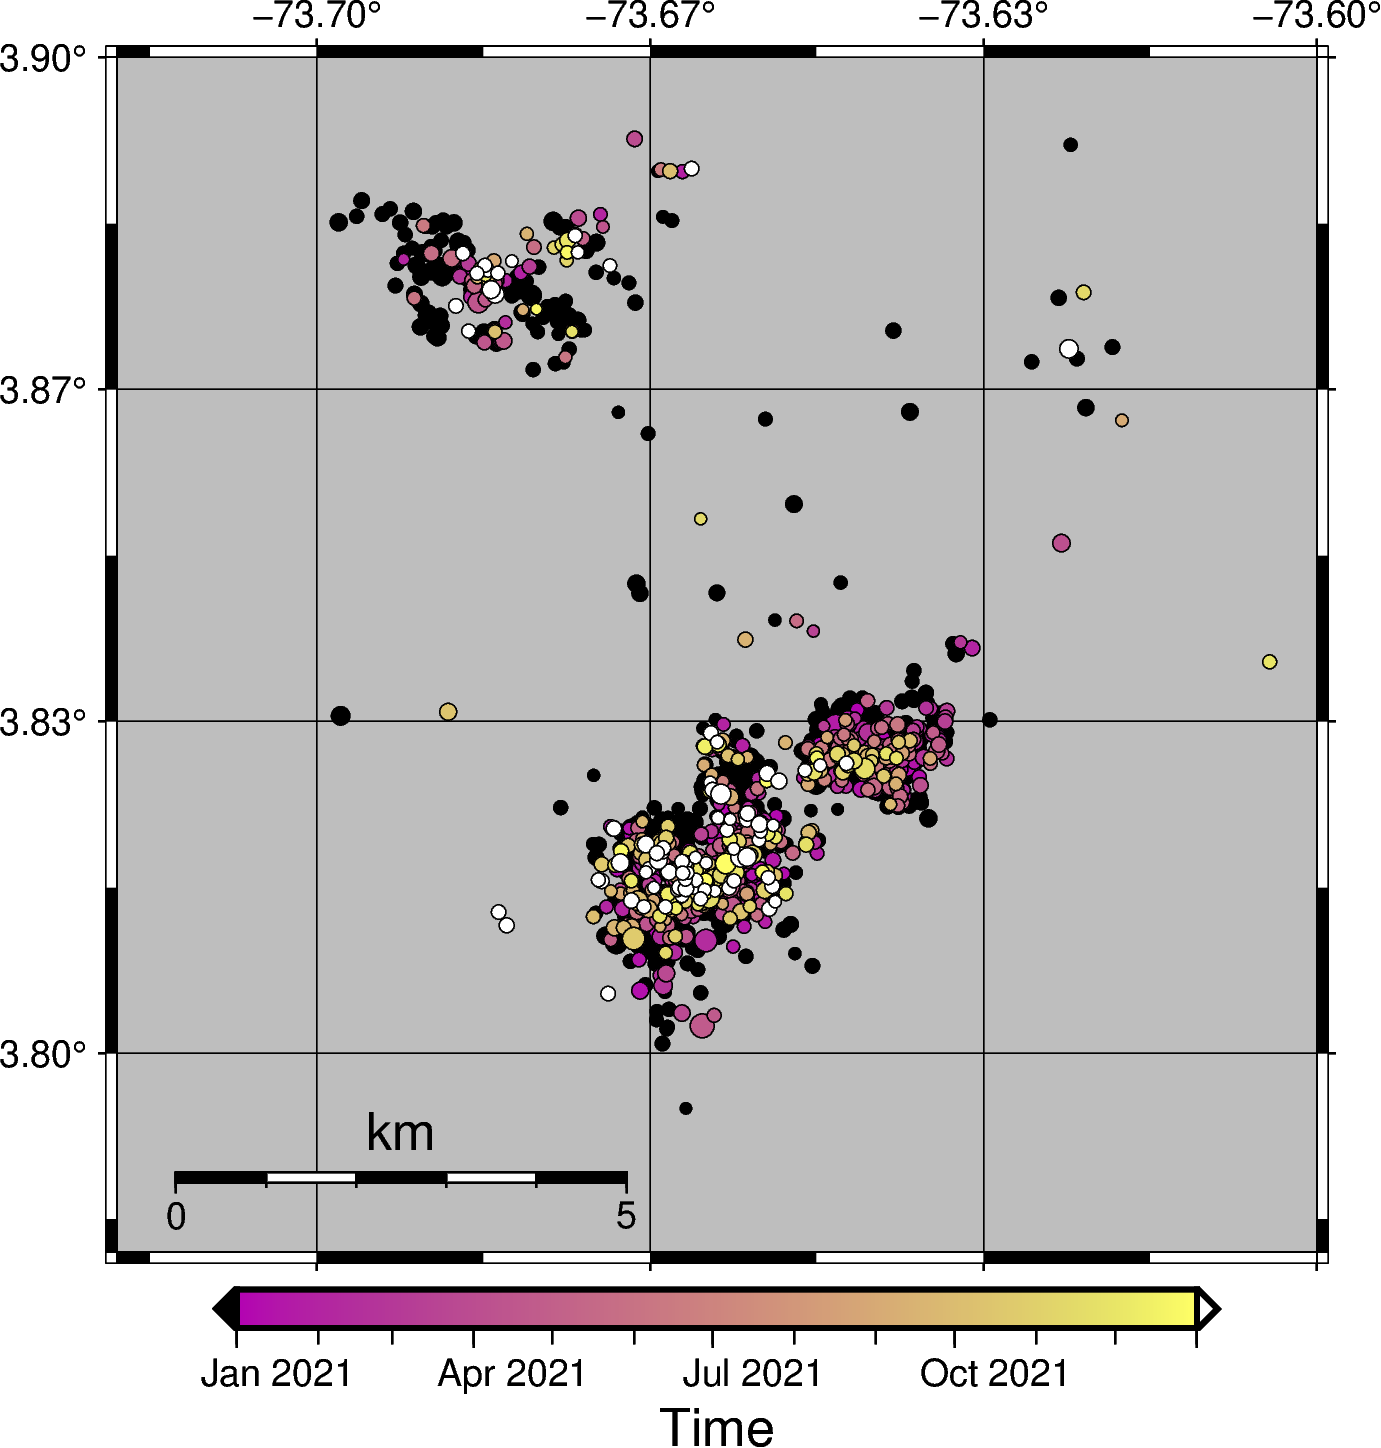

In [10]:
catalogs2 = [{"data":events[events["Type"]=="Cubarral"],
           "color": "lightblue", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"Castilla events"', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":lambda x: 0.1 * np.sqrt(1.5 ** (x*1.5)), # equation for the size
           "style" :"cc", #circle in cm
           "cmap":True, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"black"} #color of the border
            ]
fig2,new_catalog2 = seismic_profile.map(reg,catalogs=catalogs2,
                cmap_args = {"cmap":'buda', #name of the colorbar. see gmt colorbars
                            "color_target":"origin_time", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Time", #label of the colorbar
                            "reverse":False, # reverse the colorbar
                            "overrule_bg":True, #overrule True to color white and black the outliers.
                            "series":[dt.datetime(2021,1,1), dt.datetime(2022,1,1)] }, # [] to the specific
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend=False
                )
fig2.show()
outpath = os.path.join(rep_out,"mymap3.png")
fig2.savefig(outpath,dpi=300)

/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:136: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(
/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:136: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(
/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:122: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


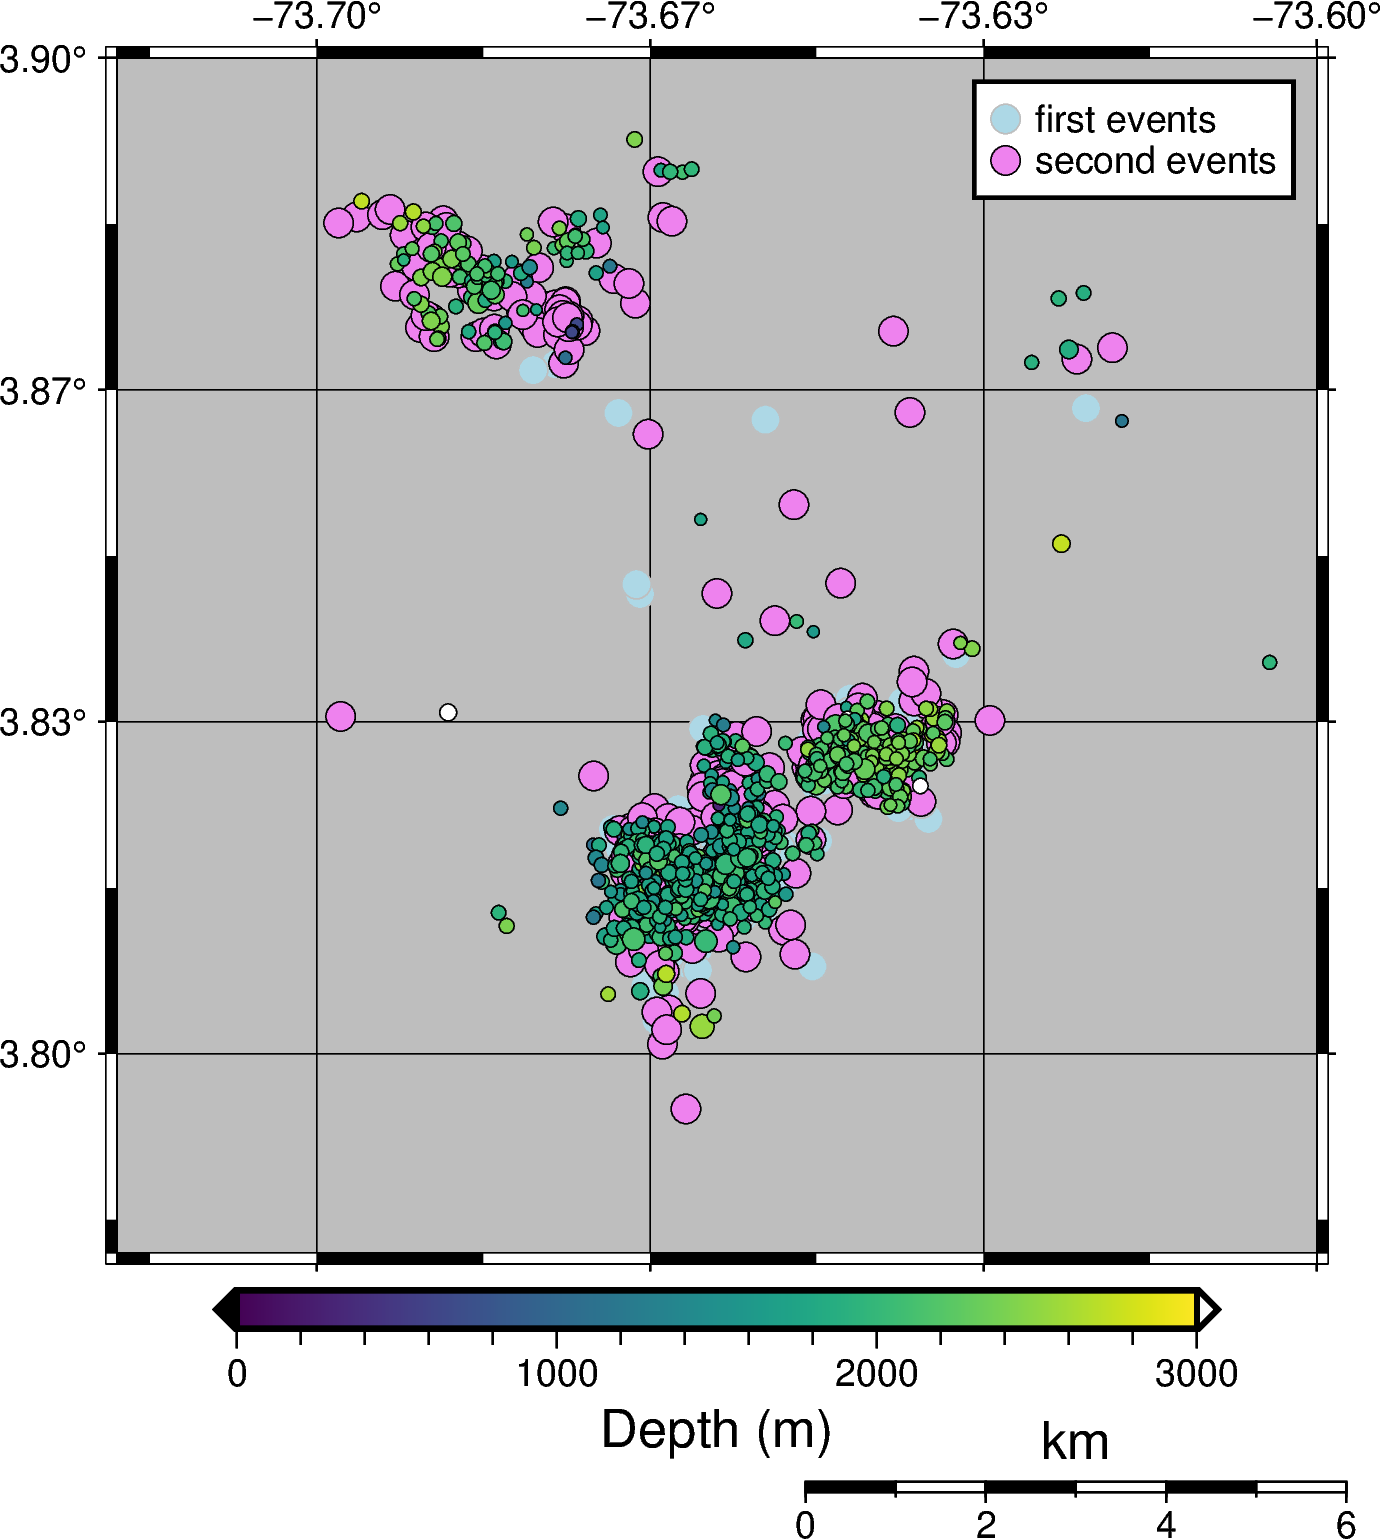

In [11]:
catalogs2 = [
            ## catalog 1
            {"data":events[events["Type"]=="Cubarral"].iloc[0:500],
           "color": "lightblue", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"first events"', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":None, # equation for the size
           "style" :"c0.25c", #circle in cm
           "cmap":None, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"gray"}, #color of the border
    
            ## catalog 2
            {"data":events[events["Type"]=="Cubarral"].iloc[500:1000],
           "color": "violet", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"second events', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":None, # equation for the size
           "style" :"c0.25c", #circle in cm
           "cmap":False, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"black"}, #color of the border

           ## catalog 3
            {"data":events[events["Type"]=="Cubarral"].iloc[1000:],
           "color": "lightblue", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"Other events"', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":lambda x: 0.1 * np.sqrt(1.5 ** (x*1.5)), # equation for the size
           "style" :"cc", #circle in cm
           "cmap":True, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"black"} #color of the border
            ]
fig2,new_catalog2 = seismic_profile.map(reg,catalogs=catalogs2,
                cmap_args = {"cmap":'viridis', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "reverse":False, # reverse the colorbar
                            "overrule_bg":True, #overrule True to color white and black the outliers.
                            "series":[0,3e3] }, # [] to the specific
                map_scale_args = {"xloc":-73.63, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":3.75,
                                "distance":6}, #distance en km
                legend=True
                )
fig2.show()
outpath = os.path.join(rep_out,"mymap4.png")
fig2.savefig(outpath,dpi=300)

### 1.3.4 Map with stations

Check the information of the station dataframe. Here, the next columns are mandatory: station,latitude and longitude 

In [12]:
stadf = os.path.join(rep_data,"stations","castilla.csv")
stadf = pd.read_csv(stadf)
stadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   network    12 non-null     object 
 1   station    12 non-null     object 
 2   longitude  12 non-null     float64
 3   latitude   12 non-null     float64
 4   elevation  12 non-null     float64
dtypes: float64(3), object(2)
memory usage: 608.0+ bytes


In [13]:
stations = [{"data":stadf,
            "name_in_map":True, #name of the stations in map
            "color":"cyan",
            "label":"stations",
            "style":"i0.4c",
            "pen":"black"}
    ]

/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:122: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


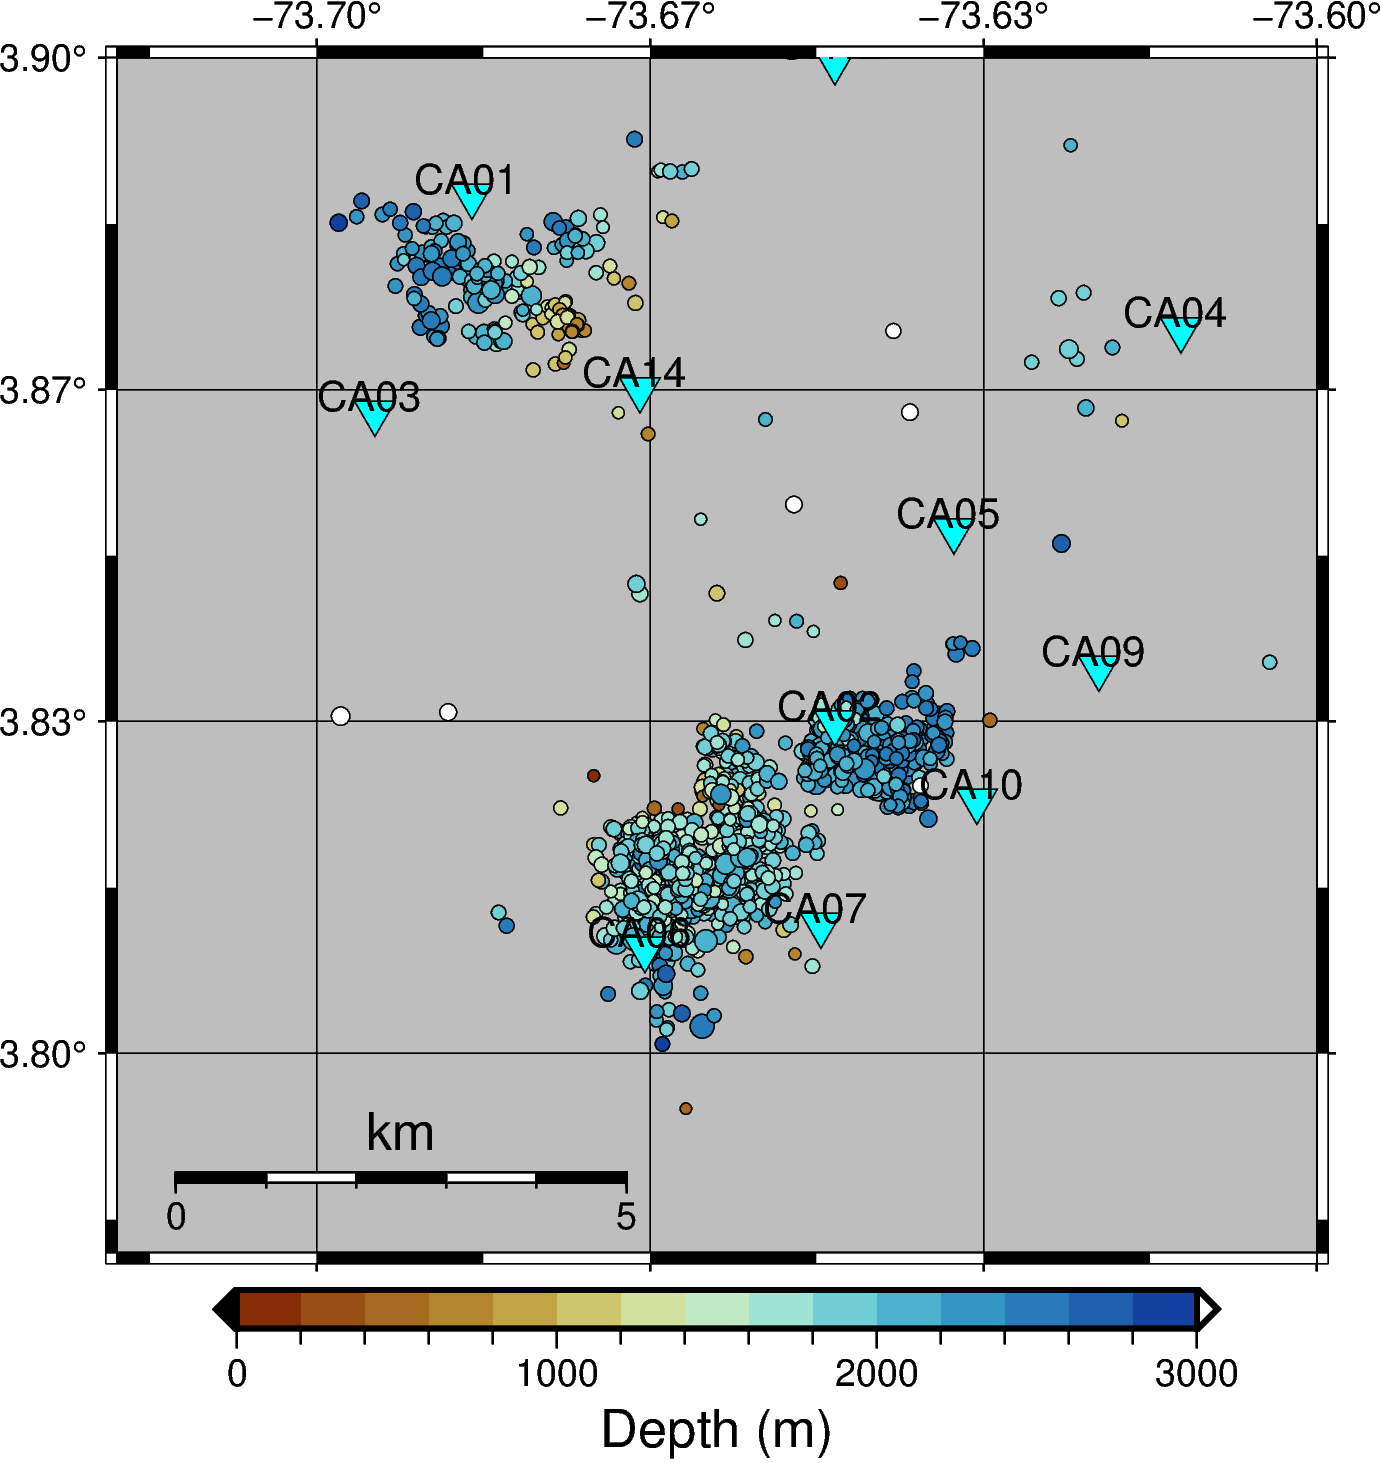

In [14]:
fig,new_catalog = seismic_profile.map(reg,catalogs=catalogs,
                stations = stations,
                cmap_args = {"cmap":'roma', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "overrule_bg":True, #overrule True to color white and black for outliers.
                            "reverse":False, # reverse the colorbar
                            "series":[0, 3e3,200] }, #remove 200 if you want continous colorbar.
                                                    # [] empty to select the minimum and maximum values of the catalog
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar. 
                                "yloc":None, #if they are None, put bottom left as default.
                                "distance":5}, #distance en km
                legend=False
                )
fig.show()
outpath = os.path.join(rep_out,"mymap5.png")
fig.savefig(outpath,dpi=300)

### 1.4 Map with shapes (only polygons at now.)

#### 1.4.1 Read and filter my first shape

reading

In [58]:
field_path = os.path.join(rep_data,"shapes","castilla_chichimene.shp")
field_path  = gpd.read_file(field_path)
field_path 

,FIELD_NAME,COUNTRIES,BASIN_NAME,OPR_CURR,PROD_STAT,HC_TYPE,RES_MAG,REGION_NM,GEN_HC_TYP,ALT_FNAME,...,OILRS_DATT,PROD_ENDTT,PROD_IMDTT,PROD_STDTT,PROD_STOPT,W84_LAT,W84_LON,W84_LAT_DG,W84_LON_DG,geometry
0,Chichimene,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,100-1000 million bo,Latin America,Oil Fields,None,...,February 2013,None,None,January 1986,None,"N 03`56'05.860""","W 073`41'08.383""",3.934961,-74.0,"POLYGON ((-73.64737 3.96723, -73.65798 3.95729..."
1,Castilla,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,100-1000 million bo,Latin America,Oil Fields,None,...,January 2013,None,None,1976,None,"N 03`50'11.724""","W 073`39'56.736""",3.836590,-74.0,"POLYGON ((-73.63298 3.86782, -73.63177 3.86489..."
2,Castilla Norte,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,100-1000 million bo,Latin America,Oil Fields,None,...,February 2013,None,None,1991,None,"N 03`52'21.457""","W 073`37'40.890""",3.872627,-74.0,"POLYGON ((-73.62274 3.92984, -73.61692 3.93086..."
3,Chichimene Suroeste,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,10-100 million bo,Latin America,Oil Fields,None,...,February 2013,None,None,October 2009,None,"N 03`54'25.180""","W 073`43'26.790""",3.906994,-74.0,"POLYGON ((-73.73149 3.92789, -73.73000 3.92430..."
4,Castilla Este,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,1-10 million bo,Latin America,Oil Fields,None,...,February 2013,None,None,January 1991,None,"N 03`51'36.880""","W 073`38'02.100""",3.860244,-74.0,"POLYGON ((-73.63153 3.86241, -73.63079 3.86347..."


reading and filtering

In [11]:
field_path = os.path.join(rep_data,"shapes","castilla_chichimene.shp")
field_path  = gpd.read_file(field_path)
field_path = field_path[field_path["FIELD_NAME"].isin(["Castilla",
                                                        "Castilla Norte",
                                                        "Castilla Este"])]
field_path

,FIELD_NAME,COUNTRIES,BASIN_NAME,OPR_CURR,PROD_STAT,HC_TYPE,RES_MAG,REGION_NM,GEN_HC_TYP,ALT_FNAME,...,OILRS_DATT,PROD_ENDTT,PROD_IMDTT,PROD_STDTT,PROD_STOPT,W84_LAT,W84_LON,W84_LAT_DG,W84_LON_DG,geometry
1,Castilla,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,100-1000 million bo,Latin America,Oil Fields,None,...,January 2013,None,None,1976,None,"N 03`50'11.724""","W 073`39'56.736""",3.836590,-74.0,"POLYGON ((-73.63298 3.86782, -73.63177 3.86489..."
2,Castilla Norte,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,100-1000 million bo,Latin America,Oil Fields,None,...,February 2013,None,None,1991,None,"N 03`52'21.457""","W 073`37'40.890""",3.872627,-74.0,"POLYGON ((-73.62274 3.92984, -73.61692 3.93086..."
4,Castilla Este,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,1-10 million bo,Latin America,Oil Fields,None,...,February 2013,None,None,January 1991,None,"N 03`51'36.880""","W 073`38'02.100""",3.860244,-74.0,"POLYGON ((-73.63153 3.86241, -73.63079 3.86347..."


changing the projection. (The projection of this shape is already EPSG:4326. However, if you have another projection, you must change it to 4326)

In [29]:
field_path.to_crs("EPSG:4326")

,FIELD_NAME,COUNTRIES,BASIN_NAME,OPR_CURR,PROD_STAT,HC_TYPE,RES_MAG,REGION_NM,GEN_HC_TYP,ALT_FNAME,...,OILRS_DATT,PROD_ENDTT,PROD_IMDTT,PROD_STDTT,PROD_STOPT,W84_LAT,W84_LON,W84_LAT_DG,W84_LON_DG,geometry
1,Castilla,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,100-1000 million bo,Latin America,Oil Fields,None,...,January 2013,None,None,1976,None,"N 03`50'11.724""","W 073`39'56.736""",3.836590,-74.0,"POLYGON ((-73.63298 3.86782, -73.63177 3.86489..."
2,Castilla Norte,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,100-1000 million bo,Latin America,Oil Fields,None,...,February 2013,None,None,1991,None,"N 03`52'21.457""","W 073`37'40.890""",3.872627,-74.0,"POLYGON ((-73.62274 3.92984, -73.61692 3.93086..."
4,Castilla Este,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,1-10 million bo,Latin America,Oil Fields,None,...,February 2013,None,None,January 1991,None,"N 03`51'36.880""","W 073`38'02.100""",3.860244,-74.0,"POLYGON ((-73.63153 3.86241, -73.63079 3.86347..."


making my polygon shape object

In [30]:
castilla_field = shape.ShapeObject(gdf=field_path,
                    label='"Castilla field"', # label of the polygons
                    pen="1p,brown"             #color of the polygon                           
                    ) 
castilla_field.data

,FIELD_NAME,COUNTRIES,BASIN_NAME,OPR_CURR,PROD_STAT,HC_TYPE,RES_MAG,REGION_NM,GEN_HC_TYP,ALT_FNAME,...,OILRS_DATT,PROD_ENDTT,PROD_IMDTT,PROD_STDTT,PROD_STOPT,W84_LAT,W84_LON,W84_LAT_DG,W84_LON_DG,geometry
1,Castilla,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,100-1000 million bo,Latin America,Oil Fields,None,...,January 2013,None,None,1976,None,"N 03`50'11.724""","W 073`39'56.736""",3.836590,-74.0,"POLYGON ((-73.63298 3.86782, -73.63177 3.86489..."
2,Castilla Norte,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,100-1000 million bo,Latin America,Oil Fields,None,...,February 2013,None,None,1991,None,"N 03`52'21.457""","W 073`37'40.890""",3.872627,-74.0,"POLYGON ((-73.62274 3.92984, -73.61692 3.93086..."
4,Castilla Este,Colombia,Ariari-Apiay Block (Llanos-Barinas Basin),Ecopetrol SA,Producing,Oil,1-10 million bo,Latin America,Oil Fields,None,...,February 2013,None,None,January 1991,None,"N 03`51'36.880""","W 073`38'02.100""",3.860244,-74.0,"POLYGON ((-73.63153 3.86241, -73.63079 3.86347..."


Map with my first shape.

We have two parameters to locate the shapes:
1. shapes_before_catalog
2. shapes_after_catalog 

As we are not going to plot the catalog in this moment, we can choose anyone.

/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


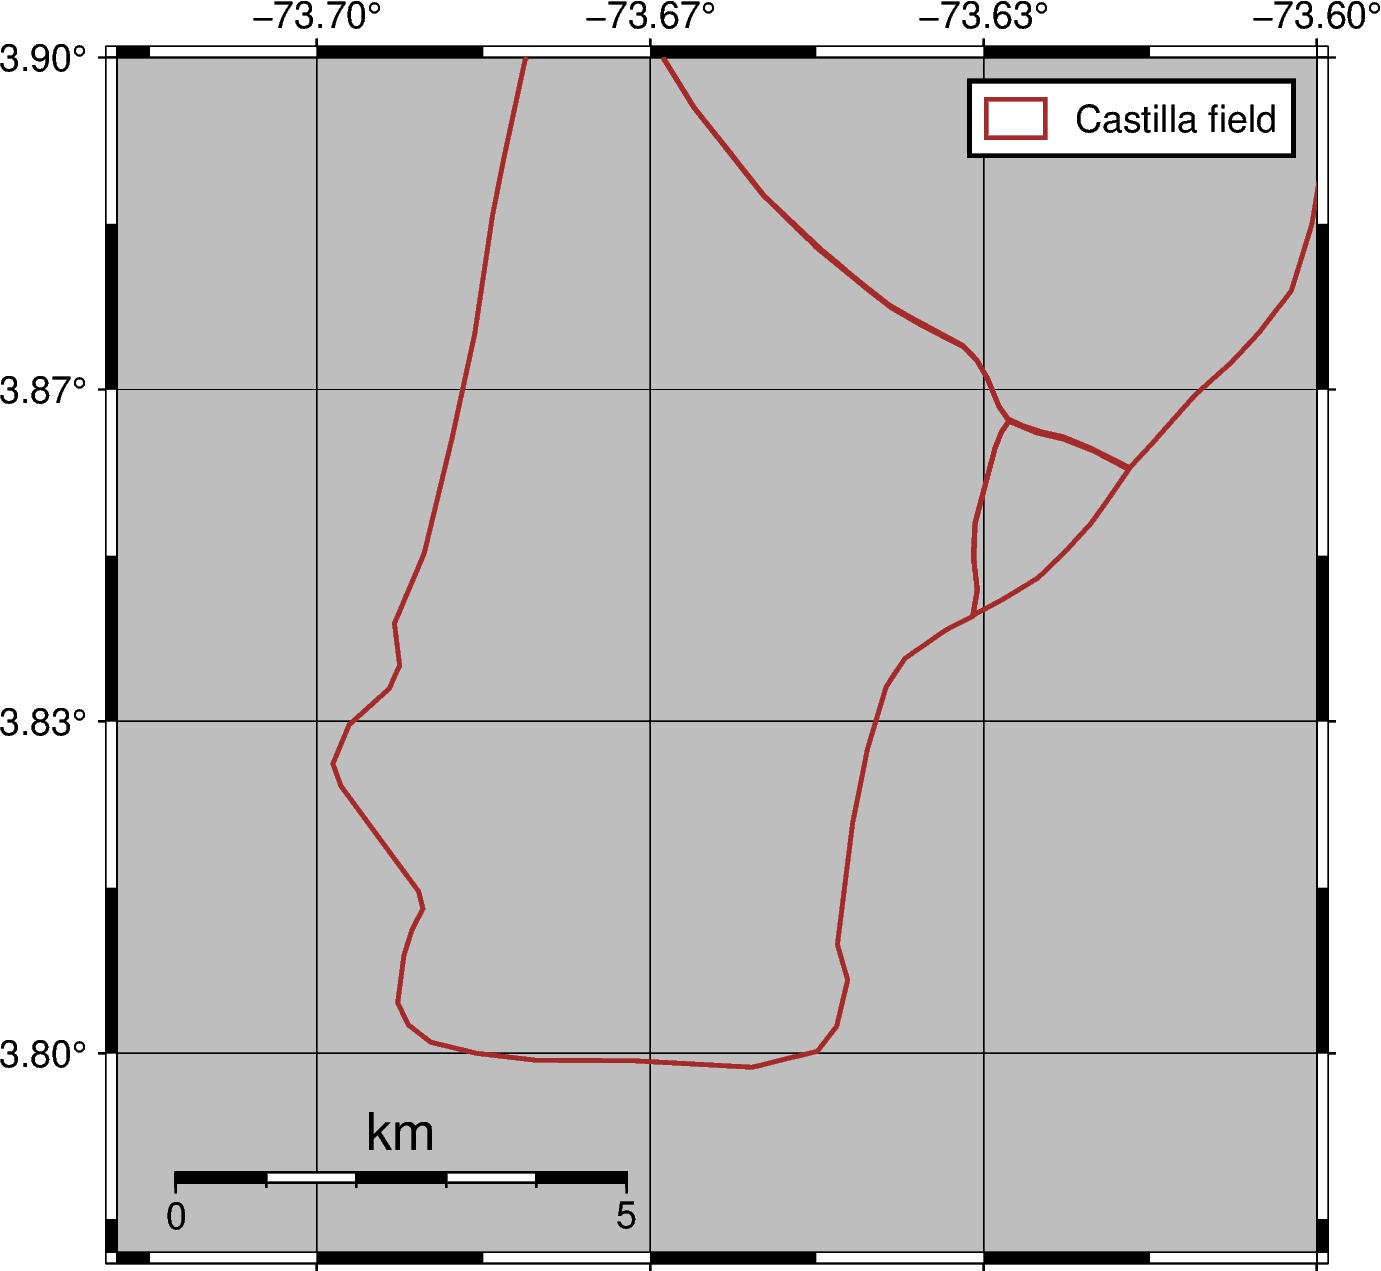

In [23]:
myshapes = [castilla_field] #only one shape at now
fig,nomatter = seismic_profile.map(reg,
                catalogs=None,
                cmap_args = None,
                shapes_before_catalog=myshapes, #list of shapes
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend=True
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_shape1.png")
fig.savefig(outpath,dpi=300)

#### 1.4.2 Several shapes in one folder

In [24]:
wells = "/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/shapes/wells" #folder
clia_wells = get_glob_gdf(wells,"CLIA*",fmt="shp") ## all begin by CLIA in only one geodataframe
clia_wells = clia_wells.to_crs("EPSG:4326")
castilla_clia_wells = shape.ShapeObject(gdf=clia_wells,
                    label='"CLIA wells"',
                    pen="1p,cyan"                                        
                    ) 
castilla_clia_wells.data

,begin,end,name,geometry,shapename
0,1043709.22,1044389.37,CLIA-01,"LINESTRING (-73.68397 3.87156, -73.68390 3.871...",CLIA_1
1,1043570.24,1044392.60,CLIA-02,"LINESTRING (-73.68522 3.87920, -73.68515 3.879...",CLIA_2
2,1045491.73,1045739.26,CLIA-05,"LINESTRING (-73.66792 3.88113, -73.66792 3.881...",CLIA_5
3,1044848.83,1045501.18,CLIA-14,"LINESTRING (-73.67371 3.88357, -73.67364 3.883...",CLIA_14
4,1043939.43,1044400.61,CLIA-04,"LINESTRING (-73.68190 3.87851, -73.68178 3.878...",CLIA_4


/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


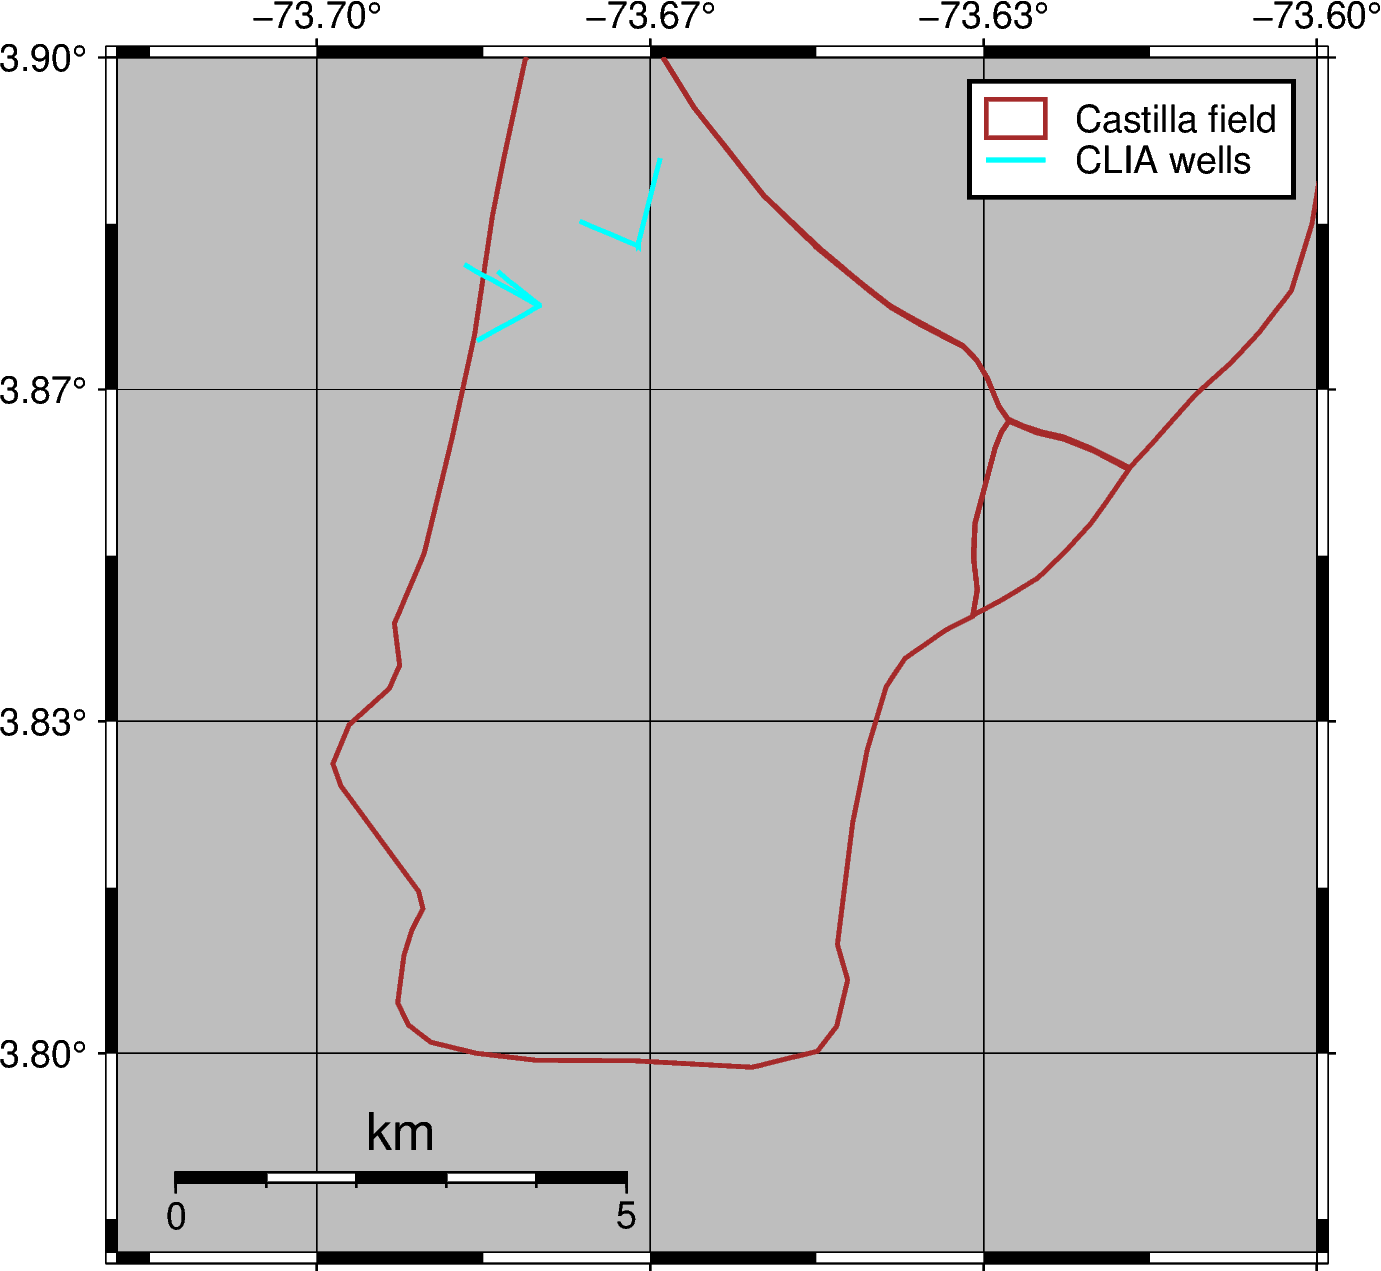

In [25]:
myshapes = [castilla_field,castilla_clia_wells] 
fig,nomatter = seismic_profile.map(reg,
                catalogs=None,
                cmap_args = None,
                shapes_before_catalog=myshapes, #list of shapes
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend=True
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_shape2.png")
fig.savefig(outpath,dpi=300)

#### 1.4.3 Shapes + catalog

shapes before plotting the catalog

In [26]:
field_path = os.path.join(rep_data,"shapes","castilla_chichimene.shp")
field_path  = gpd.read_file(field_path)
field_path = field_path[field_path["FIELD_NAME"].isin(["Castilla",
                                                        "Castilla Norte",
                                                        "Castilla Este"])]
castilla_field = shape.ShapeObject(gdf=field_path,
                    label='"Castilla field"',
                    pen="1p,brown"                                        
                    ) 

block_path = os.path.join(rep_data,"shapes","cubarral.shp")
block_path  = gpd.read_file(block_path)
castilla_block = shape.ShapeObject(gdf=block_path,
                    label='"Cubarral block"',
                    pen="1p,black"                                        
                    ) 

shapes_before_catalog = [castilla_field,castilla_block]
shapes_before_catalog

shapes after plotting the catalog

In [27]:
wells = os.path.join(rep_data,"shapes","wells")

clia_wells = get_glob_gdf(wells,"CLIA*",fmt="shp")
clia_wells = clia_wells.to_crs("EPSG:4326")
castilla_clia_wells = shape.ShapeObject(gdf=clia_wells,
                    label='"CLIA wells"',
                    pen="1p,red"                                        
                    ) 
                    
disposal_wells = get_glob_gdf(wells,"Pozos_Disposal*",fmt="shp")
castilla_disposal_wells = shape.ShapeObject(gdf=disposal_wells,
                    label='"CRA wells"',
                    pen="1p,cyan"                                        
                    ) 
shapes_after_catalog = [castilla_clia_wells,castilla_disposal_wells ]
shapes_after_catalog

catalog

In [28]:
cat_csv = os.path.join(rep_data,"earthquakes","castilla_20190515_20220421_by_pad.csv")
events = uf.transform_to_fmt_catalog(cat_csv,
        columns={"Origin tim":"origin_time",
                "Latitude (":"latitude",
                "Longitude":"longitude",
                "Depth (m)":"depth",
                "Mag. (Mw)":"magnitude"})
catalogs = [{"data":events[events["Type"]=="Cubarral"],
           "color": "lightblue", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"Castilla events"', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":lambda x: 0.1 * np.sqrt(1.5 ** (x*1.5)), # equation for the size
           "style" :"cc", #circle in cm
           "cmap":True, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"black"} #color of the border
            ]

shapes+catalogs

/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:120: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate

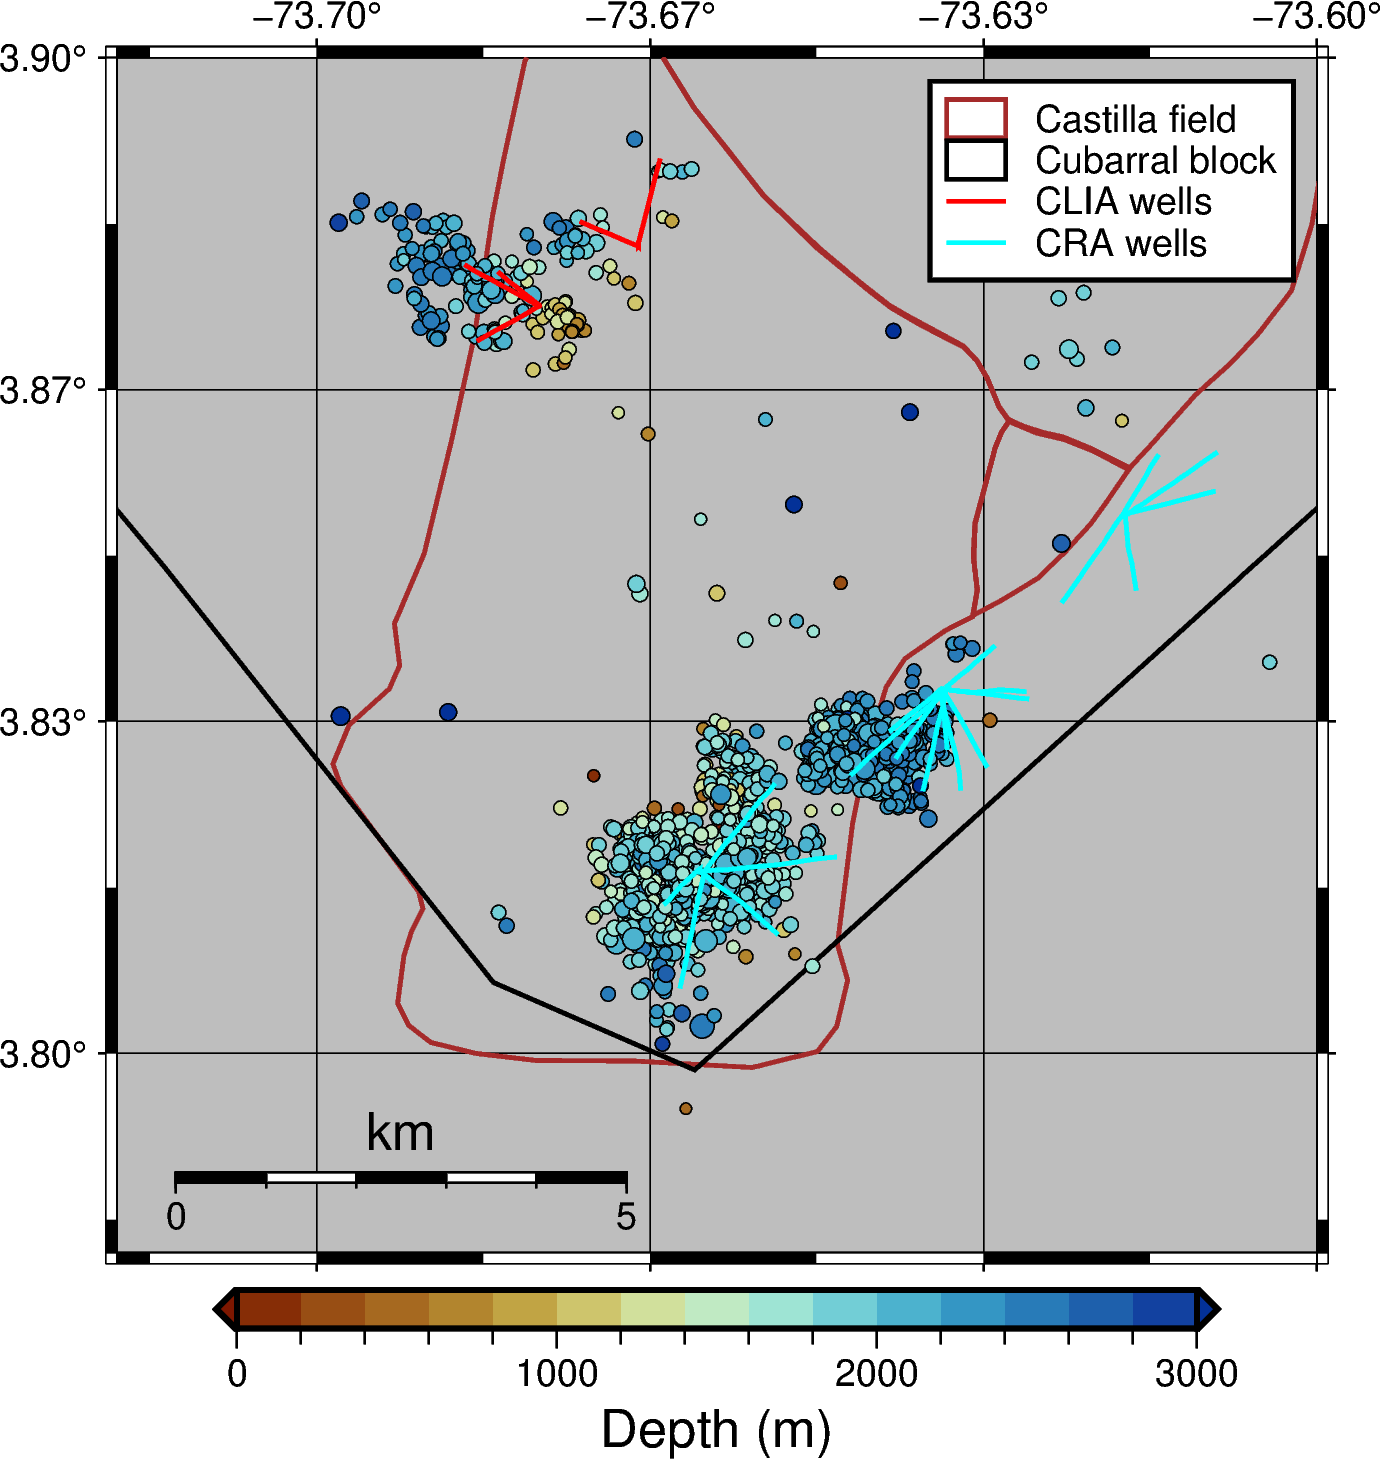

In [29]:
fig,nomatter = seismic_profile.map(reg,catalogs=catalogs,
                cmap_args = {"cmap":'roma', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "reverse":False, # reverse the colorbar
                            "series":[0, 3e3,200] }, #remove 200 if you want continous colorbar.
                                                    # [] empty to select the minimum and maximum values of the catalog
                
                shapes_before_catalog=shapes_before_catalog,
                shapes_after_catalog=shapes_after_catalog,
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend=True
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_shape3.png")
fig.savefig(outpath,dpi=300)

### 1.5 Map with Focal mechanisms

#### 1.5.1 Reading the focal mechanism data

In [30]:
fm_csv = os.path.join(rep_data,"mf","MF_quifa_201301_202203.csv")
events = pd.read_csv(fm_csv)
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               14 non-null     object 
 1   Origin time        14 non-null     object 
 2   Easting (m)        14 non-null     int64  
 3   Northing (m)       14 non-null     int64  
 4   Depth (m)          14 non-null     int64  
 5   Mag. (Mw)          14 non-null     float64
 6   Stress drop (Pa)   14 non-null     float64
 7   Source radius (m)  14 non-null     float64
 8   Avg. Slip (m)      14 non-null     float64
 9   Fc S (Hz)          14 non-null     float64
 10  # of def. sta      14 non-null     int64  
 11  Quality            14 non-null     object 
 12  Strike n1 (deg)    14 non-null     float64
 13  Dip n1 (deg)       14 non-null     float64
 14  Rake n1 (deg)      14 non-null     float64
 15  Strike n2 (deg)    14 non-null     float64
 16  Dip n2 (deg)       14 non-nu

In order to use seismic_profiles scripts, you must change your seismic MF catalog format. We use origin_time,latitude,longitude,depth,magnitude,strike_n1,dip_n1,dip_n2,rake_n1,rake_n2,strike_n1 and strike_n2 columns. 

Here is a util function for this purpose. It renames those specific columns.

In [31]:
fm_csv = "/home/emmanuel/G-Ecopetrol/opt/Castilla_faults_wellbores/data/mf/MF_quifa_201301_202203.csv"
fm_events = uf.transform_to_fmt_catalog(fm_csv,
                        columns={"Origin time":"origin_time",
                        "Latitude (deg)":"latitude",
                        "Longitude (deg)":"longitude",
                        "Depth (m)":"depth",
                        "Mag.":"magnitude",
                        "Mag. (Mw)":"magnitude",
                        "Strike n1 (deg)":"strike_n1",
                        "Dip n1 (deg)":"dip_n1",
                        "Dip n2 (deg)":"dip_n2",
                        "Rake n1 (deg)":"rake_n1",
                        "Rake n2 (deg)":"rake_n2",
                        "Strike n1 (deg)":"strike_n1",
                        "Strike n2 (deg)":"strike_n2",
                        "Dip n2 (deg)":"dip_n2",
                        
                        })
fm_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Type               14 non-null     object        
 1   origin_time        14 non-null     datetime64[ns]
 2   Easting (m)        14 non-null     int64         
 3   Northing (m)       14 non-null     int64         
 4   depth              14 non-null     int64         
 5   magnitude          14 non-null     float64       
 6   Stress drop (Pa)   14 non-null     float64       
 7   Source radius (m)  14 non-null     float64       
 8   Avg. Slip (m)      14 non-null     float64       
 9   Fc S (Hz)          14 non-null     float64       
 10  # of def. sta      14 non-null     int64         
 11  Quality            14 non-null     object        
 12  strike_n1          14 non-null     float64       
 13  dip_n1             14 non-null     float64       
 14  rake_n1     

#### 1.5.2. Make your first map with FM

Make the FM seismic catalogs. This is a list of dictionaries containing the figure information. Here we only plot one FM seismic catalog.

In [32]:
fms= [ {"data":fm_events,
        "color":"red", #Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
        "scale_for_m5":1, #Adjusts the scaling of the radius of the beachball, 
                        #which is proportional to the magnitude. Scale defines the size for magnitude = 5.
                        # In this case, M5 es equal to 1cm
        "main_n":2,  # you can choose tha nodal plane n1 or n2 
        "cmap":False} ]

my first map with mf 

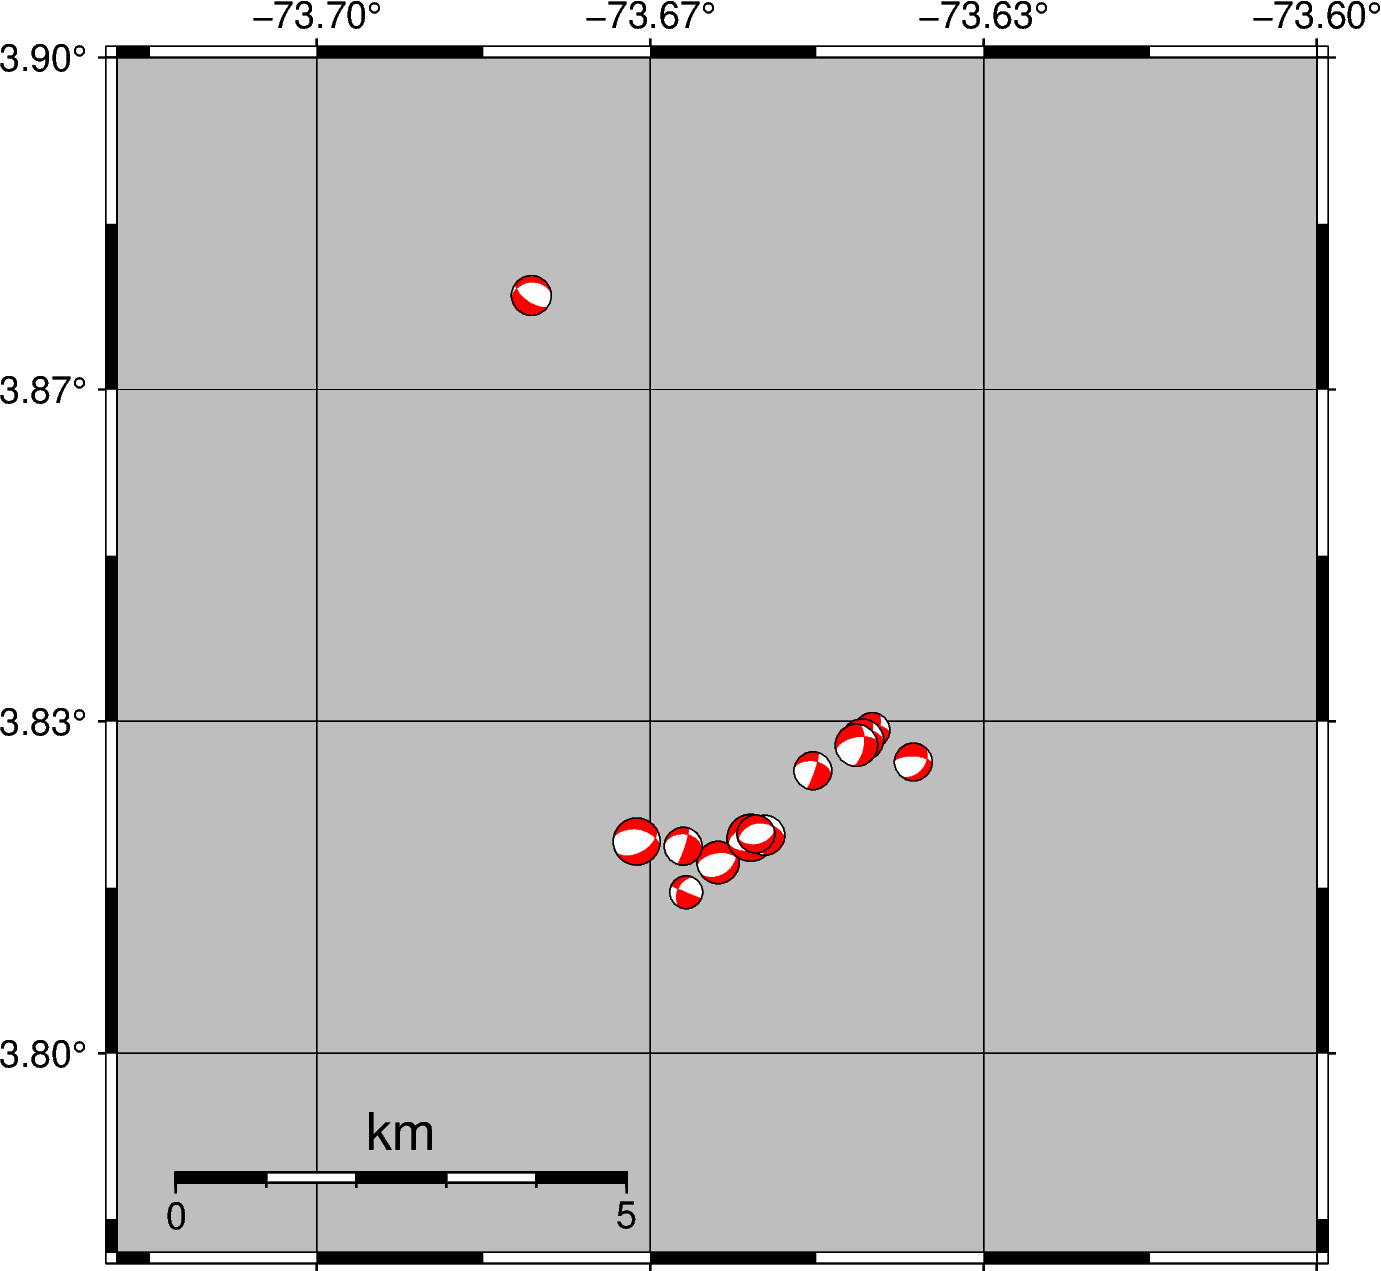

In [33]:
fig,no_matter = seismic_profile.map(reg,catalogs=None,
                fms=fms,
                cmap_args = None,
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend=False
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_fm1.png")
fig.savefig(outpath,dpi=300)

other map

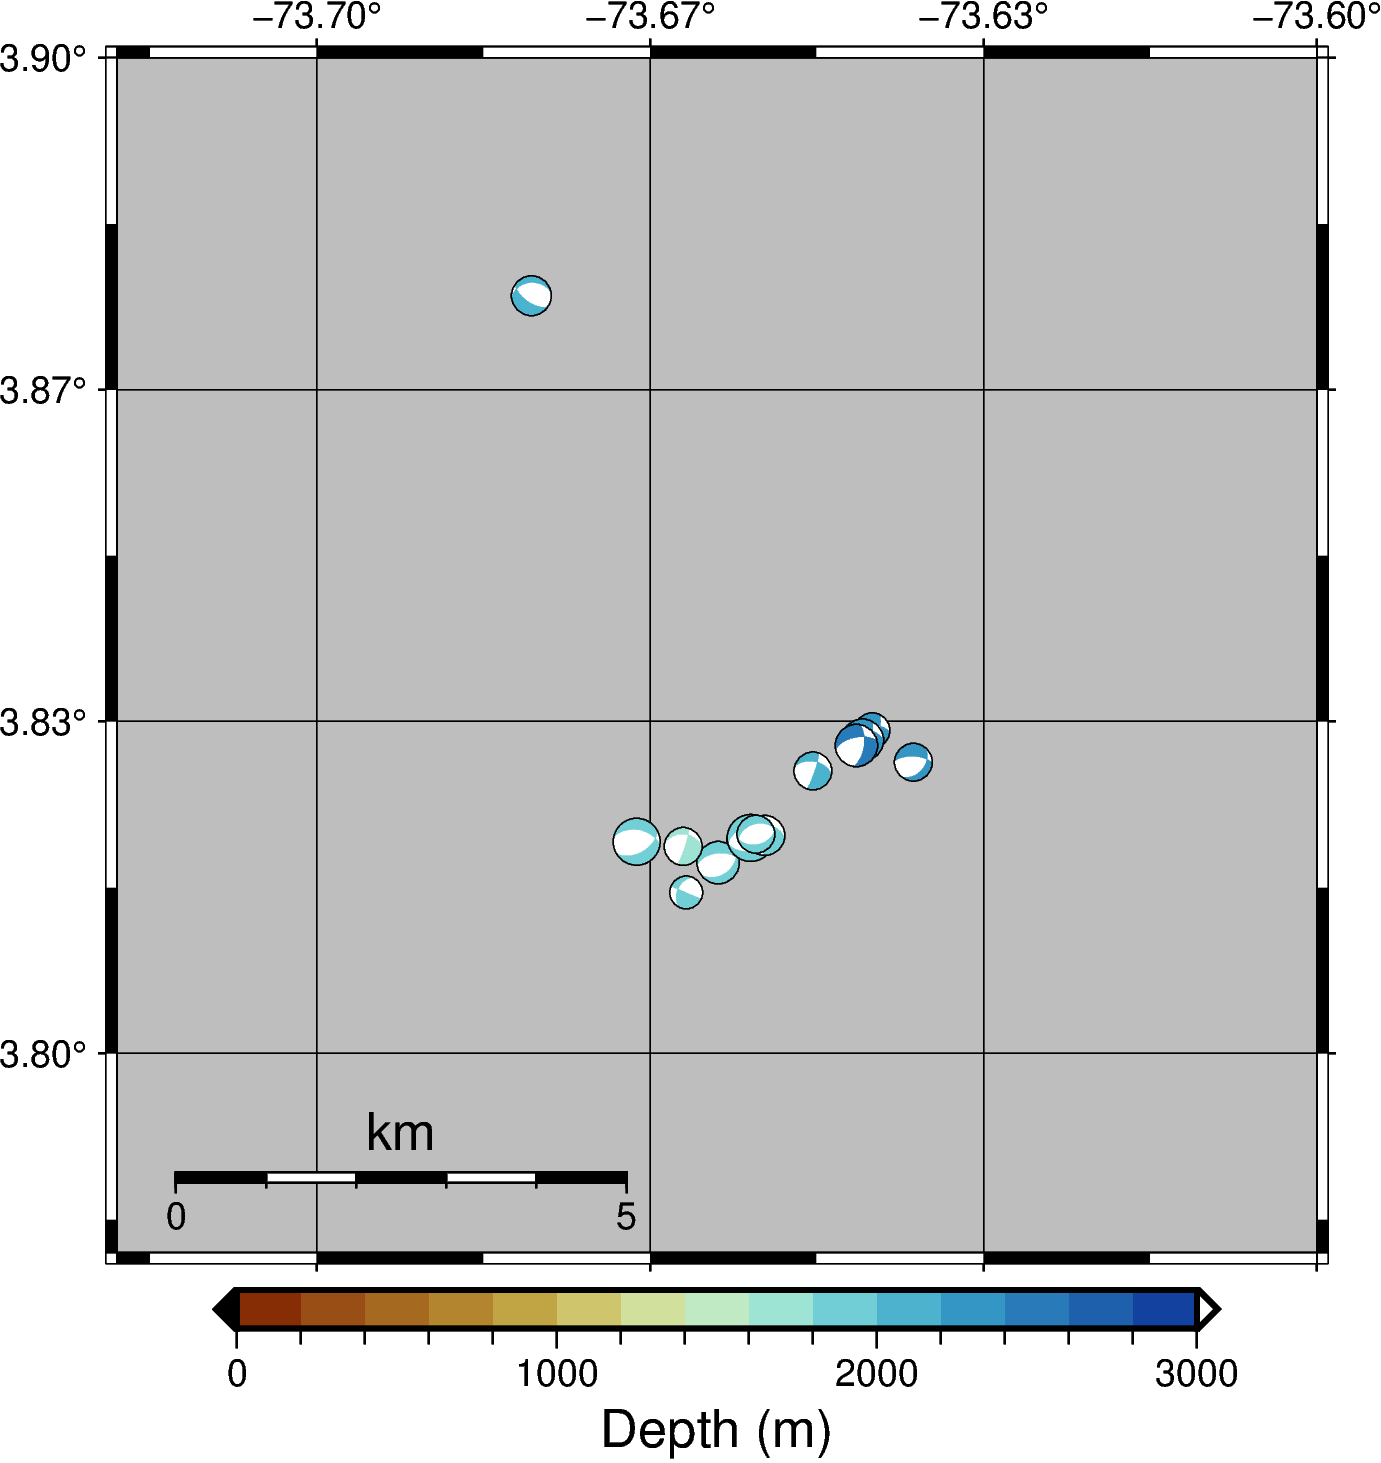

In [34]:
fms2= [ {"data":fm_events,
        "color":"red", #Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
        "scale_for_m5":1, #Adjusts the scaling of the radius of the beachball, 
                        #which is proportional to the magnitude. Scale defines the size for magnitude = 5.
                        # In this case, M5 es equal to 1cm
        "main_n":2,  # you can choose tha nodal plane n1 or n2 
        "cmap":True} ]
fig,nomatter = seismic_profile.map(reg,catalogs=None,
                fms=fms2,
                cmap_args = {"cmap":'roma', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "overrule_bg":True, #overrule True to color white and black the outliers.
                            "reverse":False, # reverse the colorbar
                            "series":[0, 3e3,200] }, #remove 200 if you want continous colorbar.
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend=False
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_fm2.png")
fig.savefig(outpath,dpi=300)

#### 1.5.3 Catalog+Shape+FM

catalog

In [35]:
cat_csv = os.path.join(rep_data,"earthquakes","castilla_20190515_20220421_by_pad.csv")
events = uf.transform_to_fmt_catalog(cat_csv,
        columns={"Origin tim":"origin_time",
                "Latitude (":"latitude",
                "Longitude":"longitude",
                "Depth (m)":"depth",
                "Mag. (Mw)":"magnitude"})
                
catalogs = [{"data":events[events["Type"]=="Cubarral"],
           "color": "yellow", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"Castilla events"', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":None, # equation for the size
           "style" :"c0.1c", #circle in cm
           "cmap":False, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"black"} #color of the border
            ]

shapes

In [36]:
##before catalog
field_path = os.path.join(rep_data,"shapes","castilla_chichimene.shp")
field_path  = gpd.read_file(field_path)
field_path = field_path[field_path["FIELD_NAME"].isin(["Castilla",
                                                        "Castilla Norte",
                                                        "Castilla Este"])]
castilla_field = shape.ShapeObject(gdf=field_path,
                    label='"Castilla field"',
                    pen="1p,brown"                                        
                    ) 

block_path = os.path.join(rep_data,"shapes","cubarral.shp")
block_path  = gpd.read_file(block_path)
castilla_block = shape.ShapeObject(gdf=block_path,
                    label='"Cubarral block"',
                    pen="1p,black"                                        
                    ) 

shapes_before_catalog = [castilla_field,castilla_block]

##after catalog
wells = os.path.join(rep_data,"shapes","wells")

clia_wells = get_glob_gdf(wells,"CLIA*",fmt="shp")
clia_wells = clia_wells.to_crs("EPSG:4326")
castilla_clia_wells = shape.ShapeObject(gdf=clia_wells,
                    label='"CLIA wells"',
                    pen="1p,red"                                        
                    ) 
                    
disposal_wells = get_glob_gdf(wells,"Pozos_Disposal*",fmt="shp")
castilla_disposal_wells = shape.ShapeObject(gdf=disposal_wells,
                    label='"CRA wells"',
                    pen="1p,cyan"                                        
                    ) 
shapes_after_catalog = [castilla_clia_wells,castilla_disposal_wells ]

FM

In [37]:
fm_csv = "/home/emmanuel/G-Ecopetrol/opt/Castilla_faults_wellbores/data/mf/MF_quifa_201301_202203.csv"
fm_events = uf.transform_to_fmt_catalog(fm_csv,
                        columns={"Origin time":"origin_time",
                        "Latitude (deg)":"latitude",
                        "Longitude (deg)":"longitude",
                        "Depth (m)":"depth",
                        "Mag.":"magnitude",
                        "Mag. (Mw)":"magnitude",
                        "Strike n1 (deg)":"strike_n1",
                        "Dip n1 (deg)":"dip_n1",
                        "Dip n2 (deg)":"dip_n2",
                        "Rake n1 (deg)":"rake_n1",
                        "Rake n2 (deg)":"rake_n2",
                        "Strike n1 (deg)":"strike_n1",
                        "Strike n2 (deg)":"strike_n2",
                        "Dip n2 (deg)":"dip_n2",
                        
                        })
fms2= [ {"data":fm_events,
        "color":"red", #Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
        "scale_for_m5":1, #Adjusts the scaling of the radius of the beachball, 
                        #which is proportional to the magnitude. Scale defines the size for magnitude = 5.
                        # In this case, M5 es equal to 1cm
        "main_n":1,  # you can choose tha nodal plane n1 or n2 
        "cmap":True} ]

catalog+shape+FM

/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:134: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate

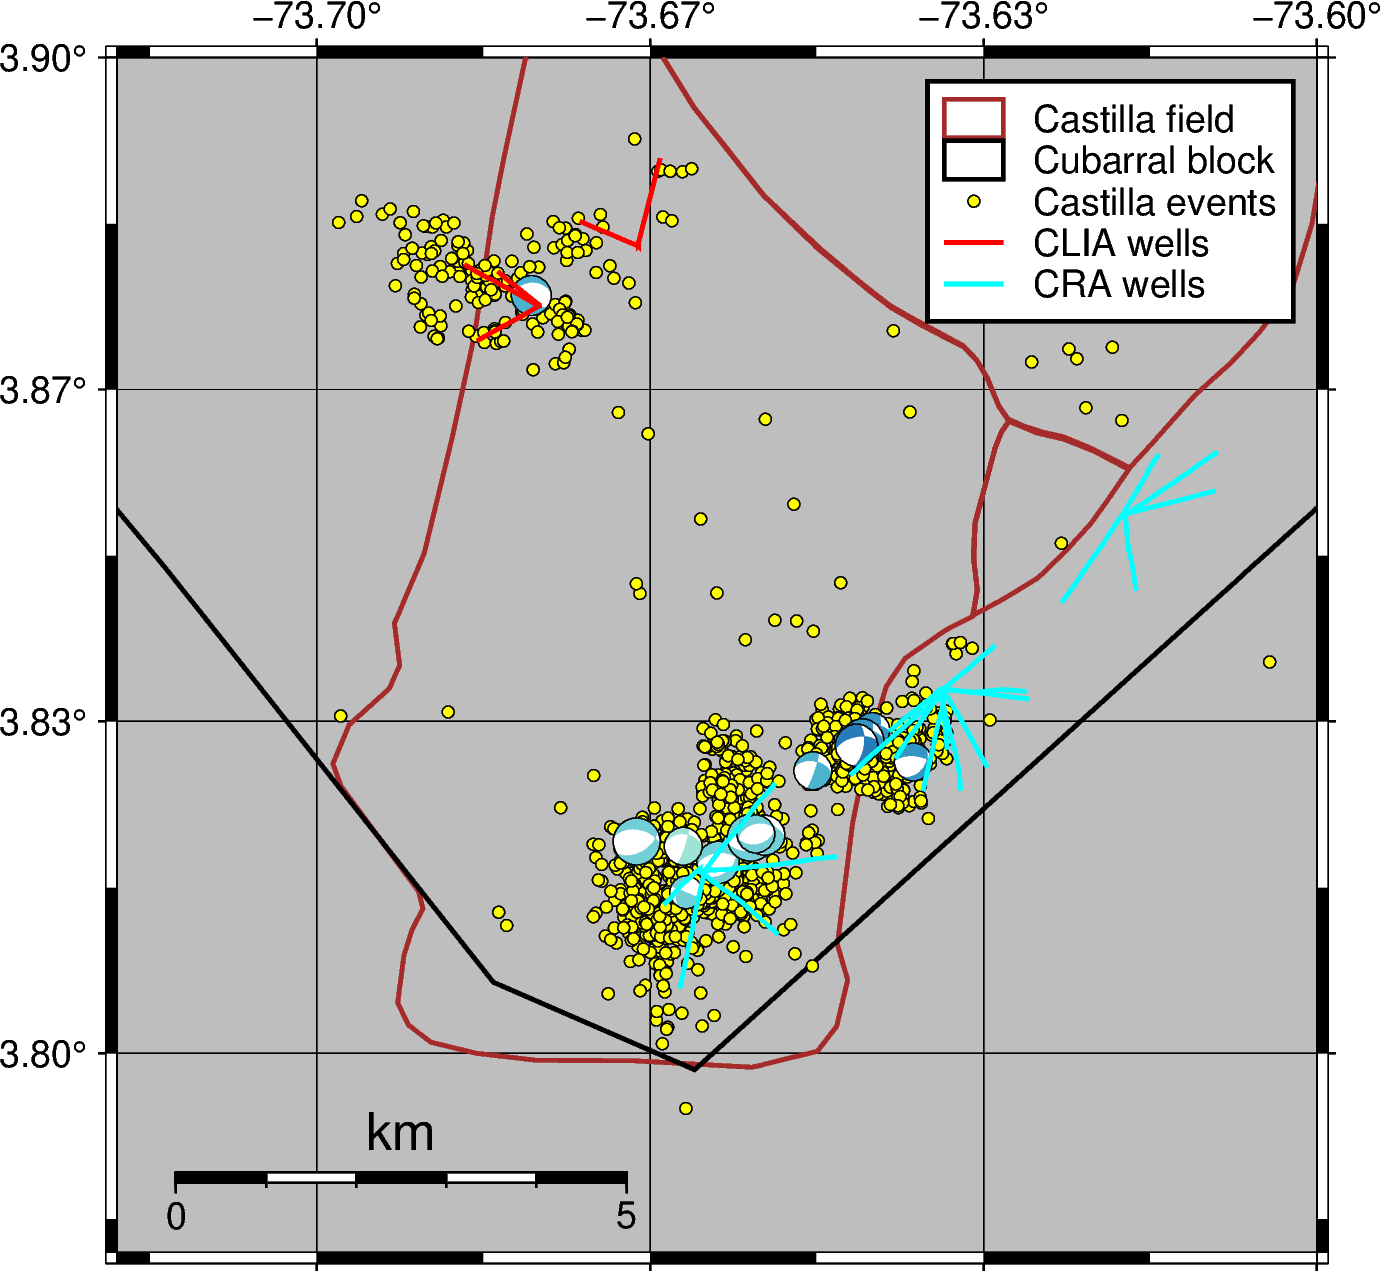

In [38]:
fig,nomatter = seismic_profile.map(reg,catalogs=catalogs,
                fms=fms2,
                cmap_args = {"cmap":'roma', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "reverse":False, # reverse the colorbar
                            "series":[0, 3e3,200] }, #remove 200 if you want continous colorbar.
                                                    # [] empty to select the minimum and maximum values of the catalog
                
                shapes_before_catalog=shapes_before_catalog,
                shapes_after_catalog=shapes_after_catalog,
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend=True
                )
fig.show()

other map catalog+shape+FM

/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:120: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate

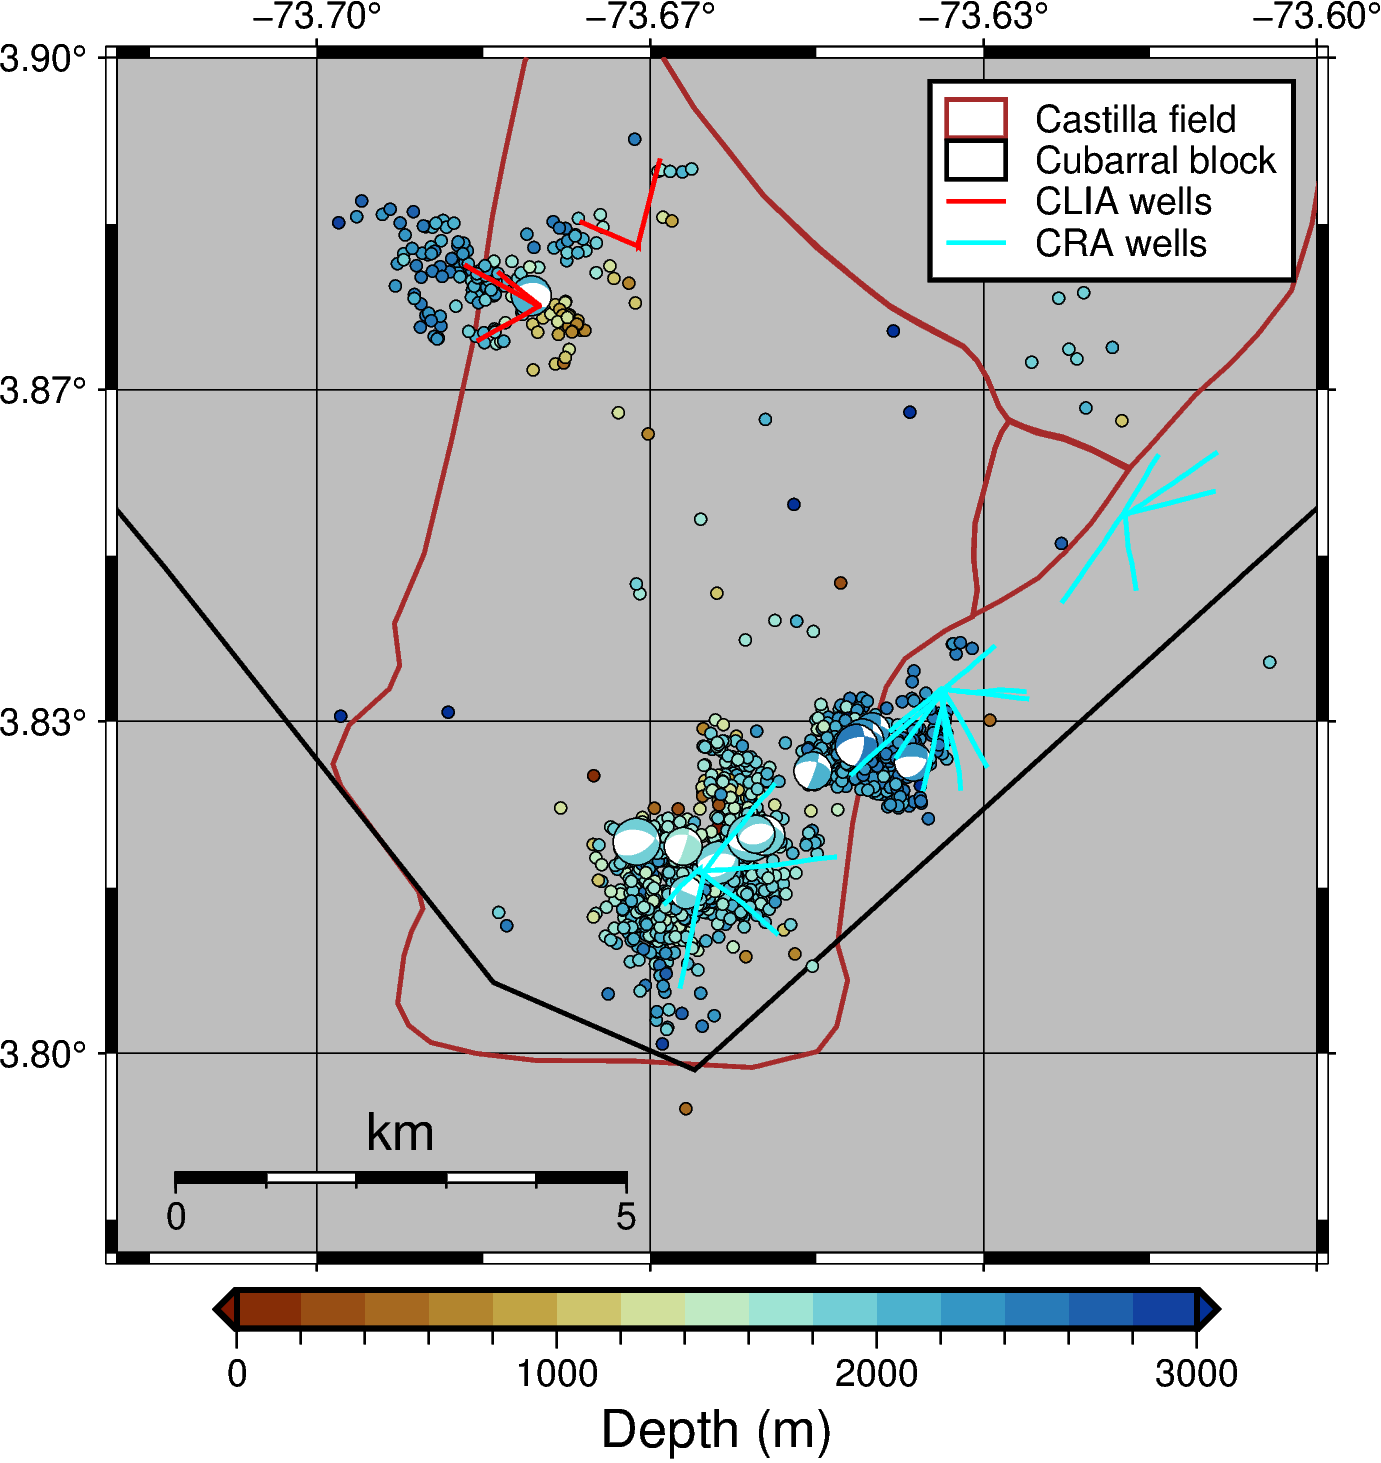

In [39]:
cat_csv = os.path.join(rep_data,"earthquakes","castilla_20190515_20220421_by_pad.csv")
events = uf.transform_to_fmt_catalog(cat_csv,
        columns={"Origin tim":"origin_time",
                "Latitude (":"latitude",
                "Longitude":"longitude",
                "Depth (m)":"depth",
                "Mag. (Mw)":"magnitude"})
                
catalogs = [{"data":events[events["Type"]=="Cubarral"],
           "color": "yellow", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"Castilla events"', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":None, # equation for the size
           "style" :"c0.1c", #circle in cm
           "cmap":True, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"black"} #color of the border
            ]

fig,nomatter = seismic_profile.map(reg,catalogs=catalogs,
                fms=fms2,
                cmap_args = {"cmap":'roma', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "reverse":False, # reverse the colorbar
                            "series":[0, 3e3,200] }, #remove 200 if you want continous colorbar.
                                                    # [] empty to select the minimum and maximum values of the catalog
                
                shapes_before_catalog=shapes_before_catalog,
                shapes_after_catalog=shapes_after_catalog,
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend=True
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_fm3.png")
fig.savefig(outpath,dpi=300)

### 1.6 Map with wells mechanic state (Important for profiles)

#### 1.6.1 Understanding the well mechanic state format

- If you have the mechanic state of well, you will be able to plot how is the inclination and azimuth of the well.

- At now, we only are going to see the mechaninc state of the well. Afterwards, in the seismic profiles, we will see the injection data.

- The mechanic state must be an Excel file, each sheet corresponds to each well information.

- You must have at least the next information: "Lon (°)","Lat (°)","Z (m)", "MD (ft)","TVD (ft)"

In [40]:
wells = {"mech_sta_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/survey_proc2.xlsx",
        "injection_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/CASTILLA_ft_ini.dat",
        "color_mech_sta":[256,256,100], #rgb, No considered if cmap=True
        "cmap":True}

df = pd.read_excel(wells["mech_sta_path"],sheet_name="CLIA01")
df

,MD (ft),Inc (°),Azi (°),TVD (ft),N (ft),E (ft),N_coord (m),E_coord (m),Lon (°),Lat (°),Z (m)
0,0,0.00,0.00,0.00,0.00,0.00,920260.34,1044386.94,-73.677869,3.875004,-435.245256
1,280,0.50,85.66,280.00,0.09,1.22,920260.37,1044387.31,-73.677866,3.875005,-349.901256
2,379,0.81,97.05,378.99,0.04,2.34,920260.35,1044387.65,-73.677863,3.875004,-319.729104
3,474,0.81,130.38,473.98,-0.48,3.52,920260.19,1044388.01,-73.677859,3.875003,-290.776152
4,568,0.65,103.91,567.97,-1.04,4.55,920260.02,1044388.32,-73.677857,3.875001,-262.128000
...,...,...,...,...,...,...,...,...,...,...,...
86,8352,27.50,239.82,7834.05,-1166.67,-2078.98,919904.74,1043753.27,-73.683576,3.871791,1952.573184
87,8447,28.17,239.75,7918.05,-1189.00,-2117.31,919897.93,1043741.58,-73.683681,3.871730,1978.176384
88,8542,28.83,239.84,8001.54,-1211.80,-2156.48,919890.98,1043729.64,-73.683788,3.871667,2003.624136
89,8637,29.55,239.81,8084.48,-1235.09,-2196.54,919883.88,1043717.43,-73.683898,3.871603,2028.904248


#### 1.6.2 First map with the inclination and azimuth information

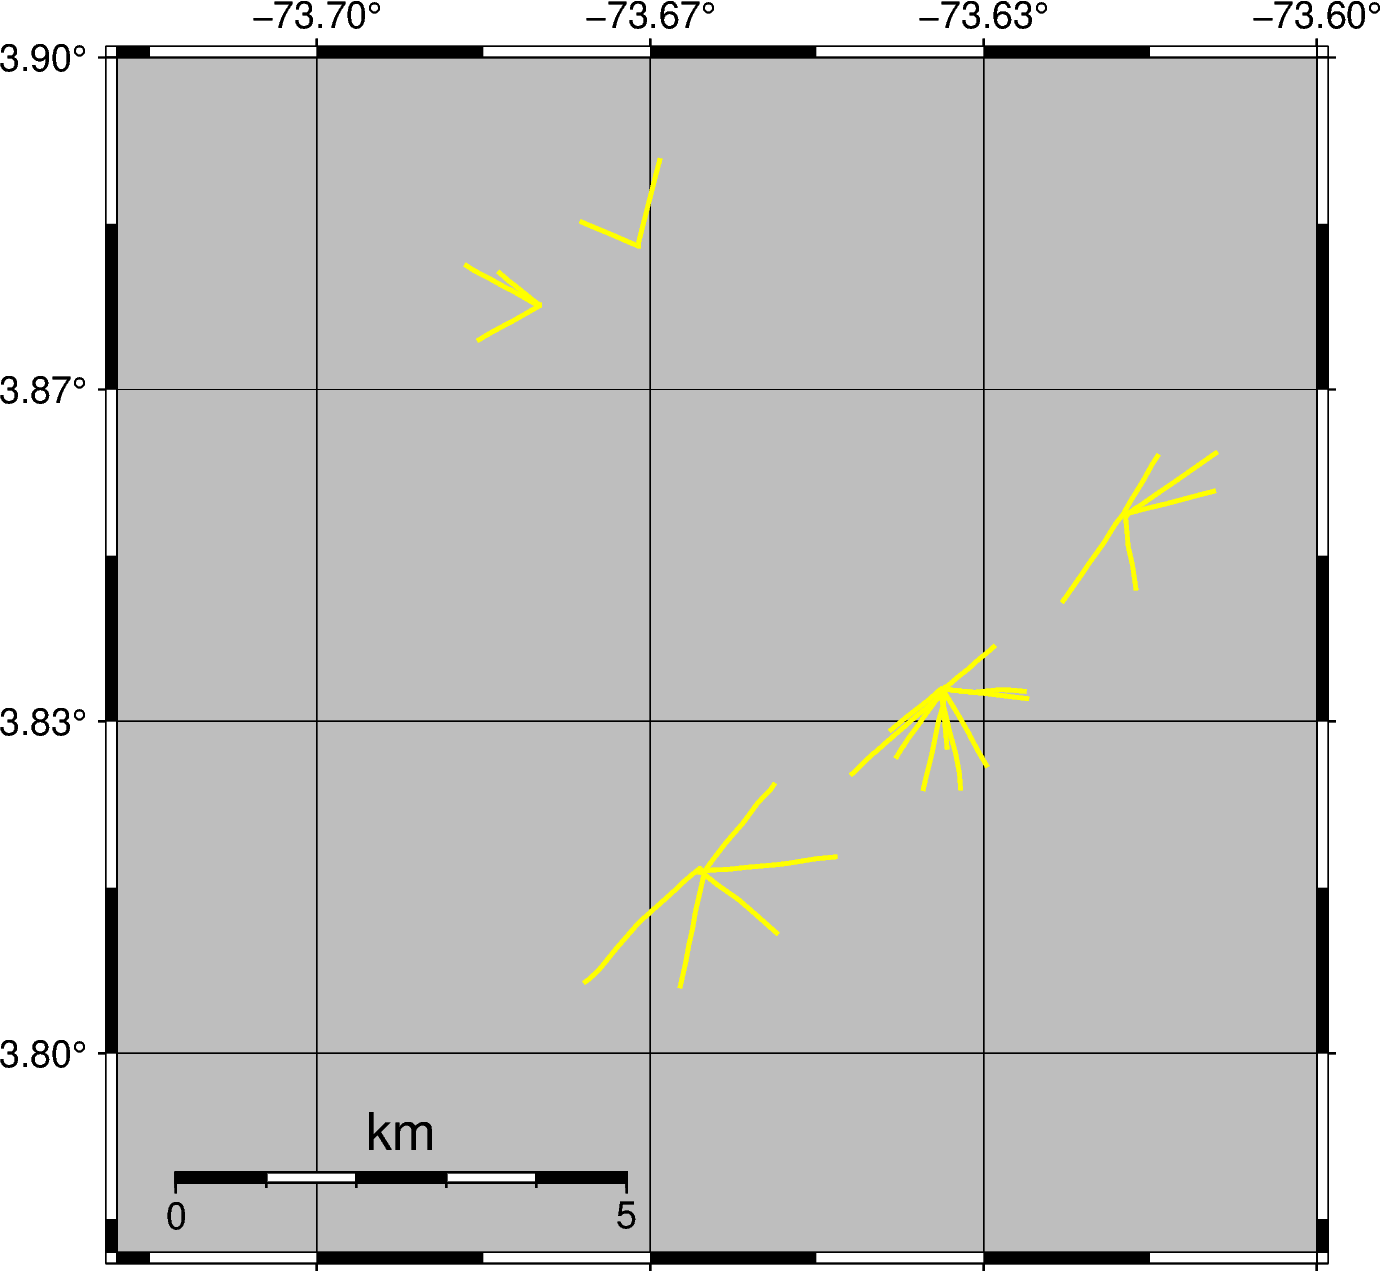

In [41]:
wells = {"mech_sta_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/survey_proc2.xlsx",
        "color_mech_sta":"yellow", # No considered if cmap=True
        "cmap":False,
        "injection_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/CASTILLA_ft_ini.dat"}
fig,nomatter = seismic_profile.map(reg,catalogs=None,
                fms=None,
                wells = wells,
                cmap_args = {"cmap":'roma', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "overrule_bg":False, #overrule True to color white and black the outliers.
                            "reverse":False, # reverse the colorbar
                            "series":[0, 3e3,200] }, #remove 200 if you want continous colorbar.
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend_args = {"xloc":-73.58, #xloc,yloc are the x-y map coordinates to locate the legend.
                                "yloc":3.79}, # only if legend is True
                legend=False
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_well1.png")
fig.savefig(outpath,dpi=300)

other map

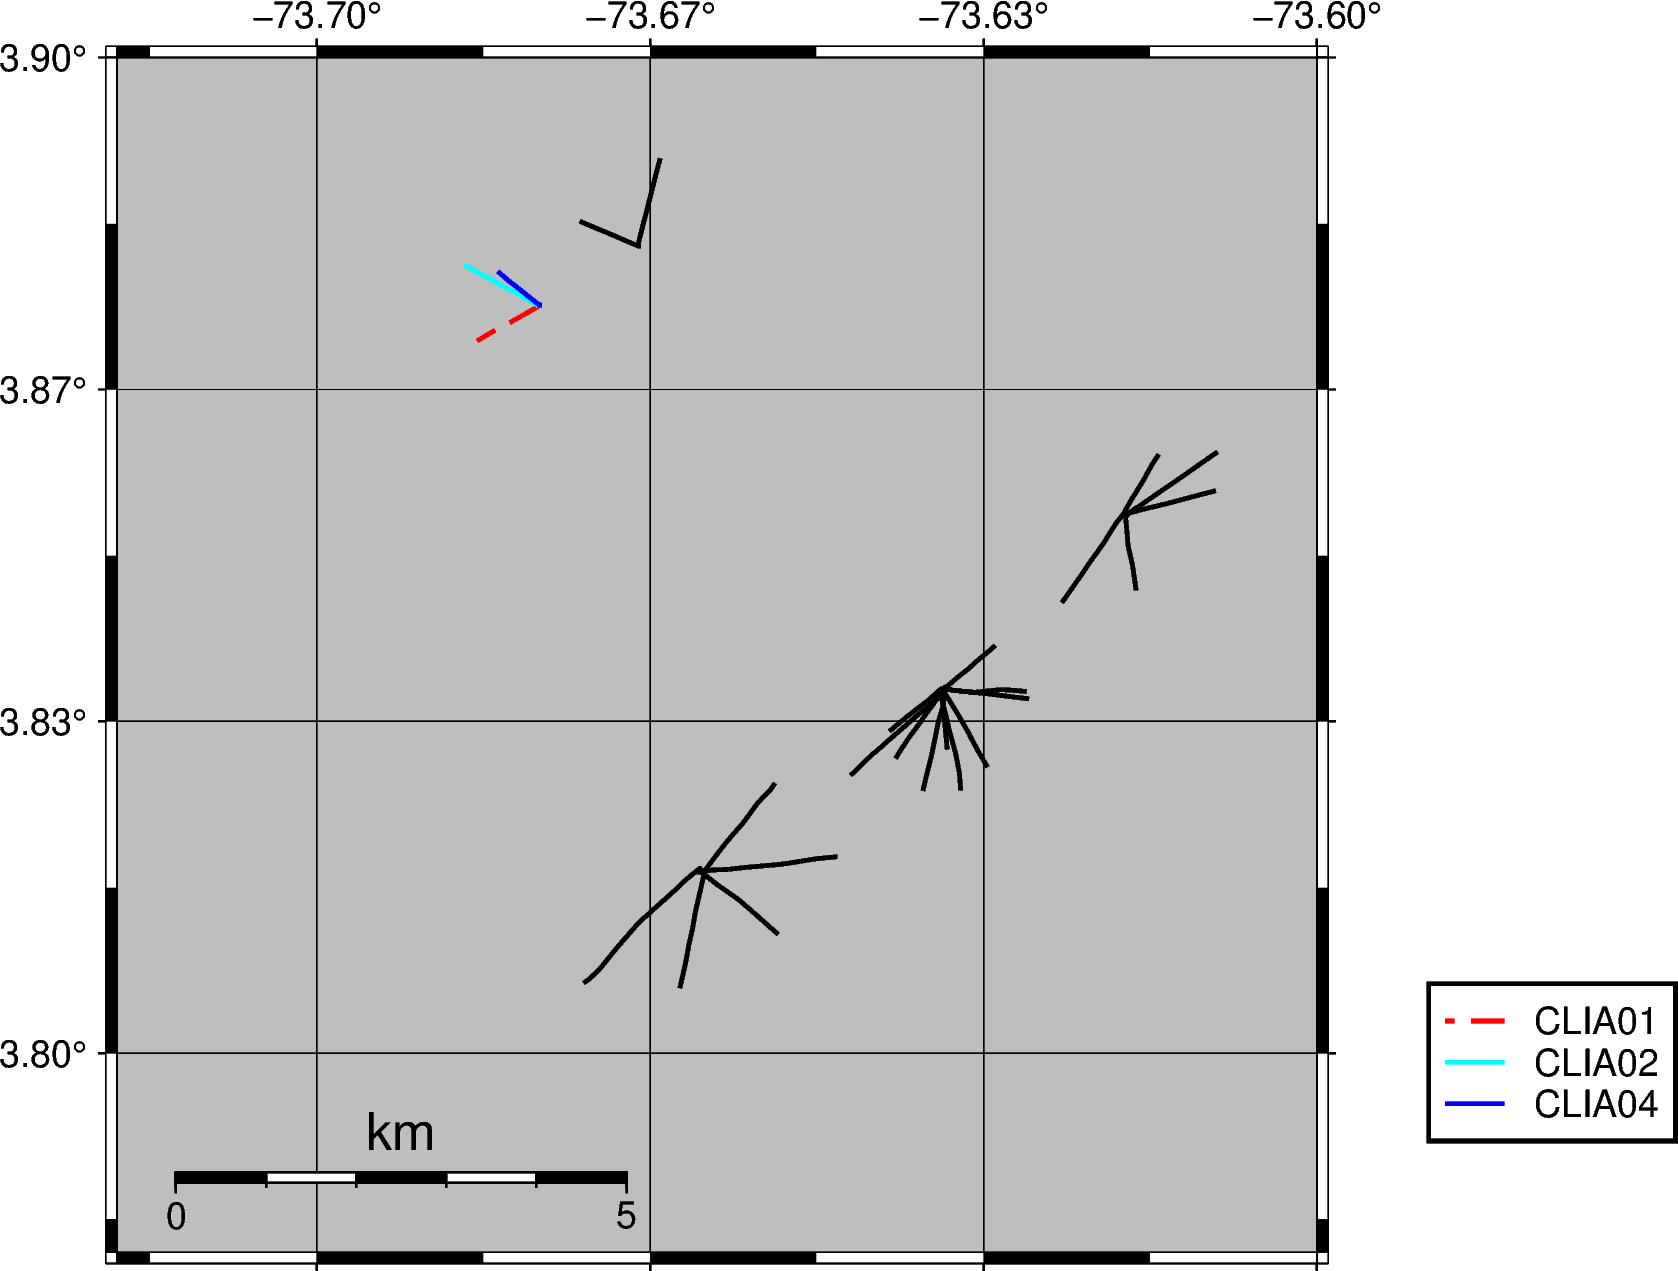

In [42]:
wells = {"mech_sta_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/survey_proc2.xlsx",
        "color_mech_sta":{"CLIA01":"red,-",
                            "CLIA02":"cyan",
                            "CLIA04":"blue"
                            }, # No considered if cmap=True
        "cmap":False,
        "injection_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/CASTILLA_ft_ini.dat"}
fig,nomatter = seismic_profile.map(reg,catalogs=None,
                fms=None,
                wells = wells,
                cmap_args = {"cmap":'roma', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "overrule_bg":False, #overrule True to color white and black the outliers.
                            "reverse":False, # reverse the colorbar
                            "series":[0, 3e3,200] }, #remove 200 if you want continous colorbar.
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend_args = {"xloc":-73.59, #xloc,yloc are the x-y map coordinates to locate the legend.
                                "yloc":3.79}, # only if legend is True
                legend=True
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_well2.png")
fig.savefig(outpath,dpi=300)

Other map

plot [ERROR]: Your -W syntax is obsolete; see program usage.
plot [WARNING]: 0.0001p+ not a valid number and may not be decoded properly.
plot [ERROR]: Your -W syntax is obsolete; see program usage.
plot [WARNING]: 0.0001p+ not a valid number and may not be decoded properly.
plot [ERROR]: Your -W syntax is obsolete; see program usage.
plot [WARNING]: 0.0001p+ not a valid number and may not be decoded properly.
plot [ERROR]: Your -W syntax is obsolete; see program usage.
plot [WARNING]: 0.0001p+ not a valid number and may not be decoded properly.
plot [ERROR]: Your -W syntax is obsolete; see program usage.
plot [WARNING]: 0.0001p+ not a valid number and may not be decoded properly.
plot [ERROR]: Your -W syntax is obsolete; see program usage.
plot [WARNING]: 0.0001p+ not a valid number and may not be decoded properly.
plot [ERROR]: Your -W syntax is obsolete; see program usage.
plot [WARNING]: 0.0001p+ not a valid number and may not be decoded properly.
plot [ERROR]: Your -W syntax is ob

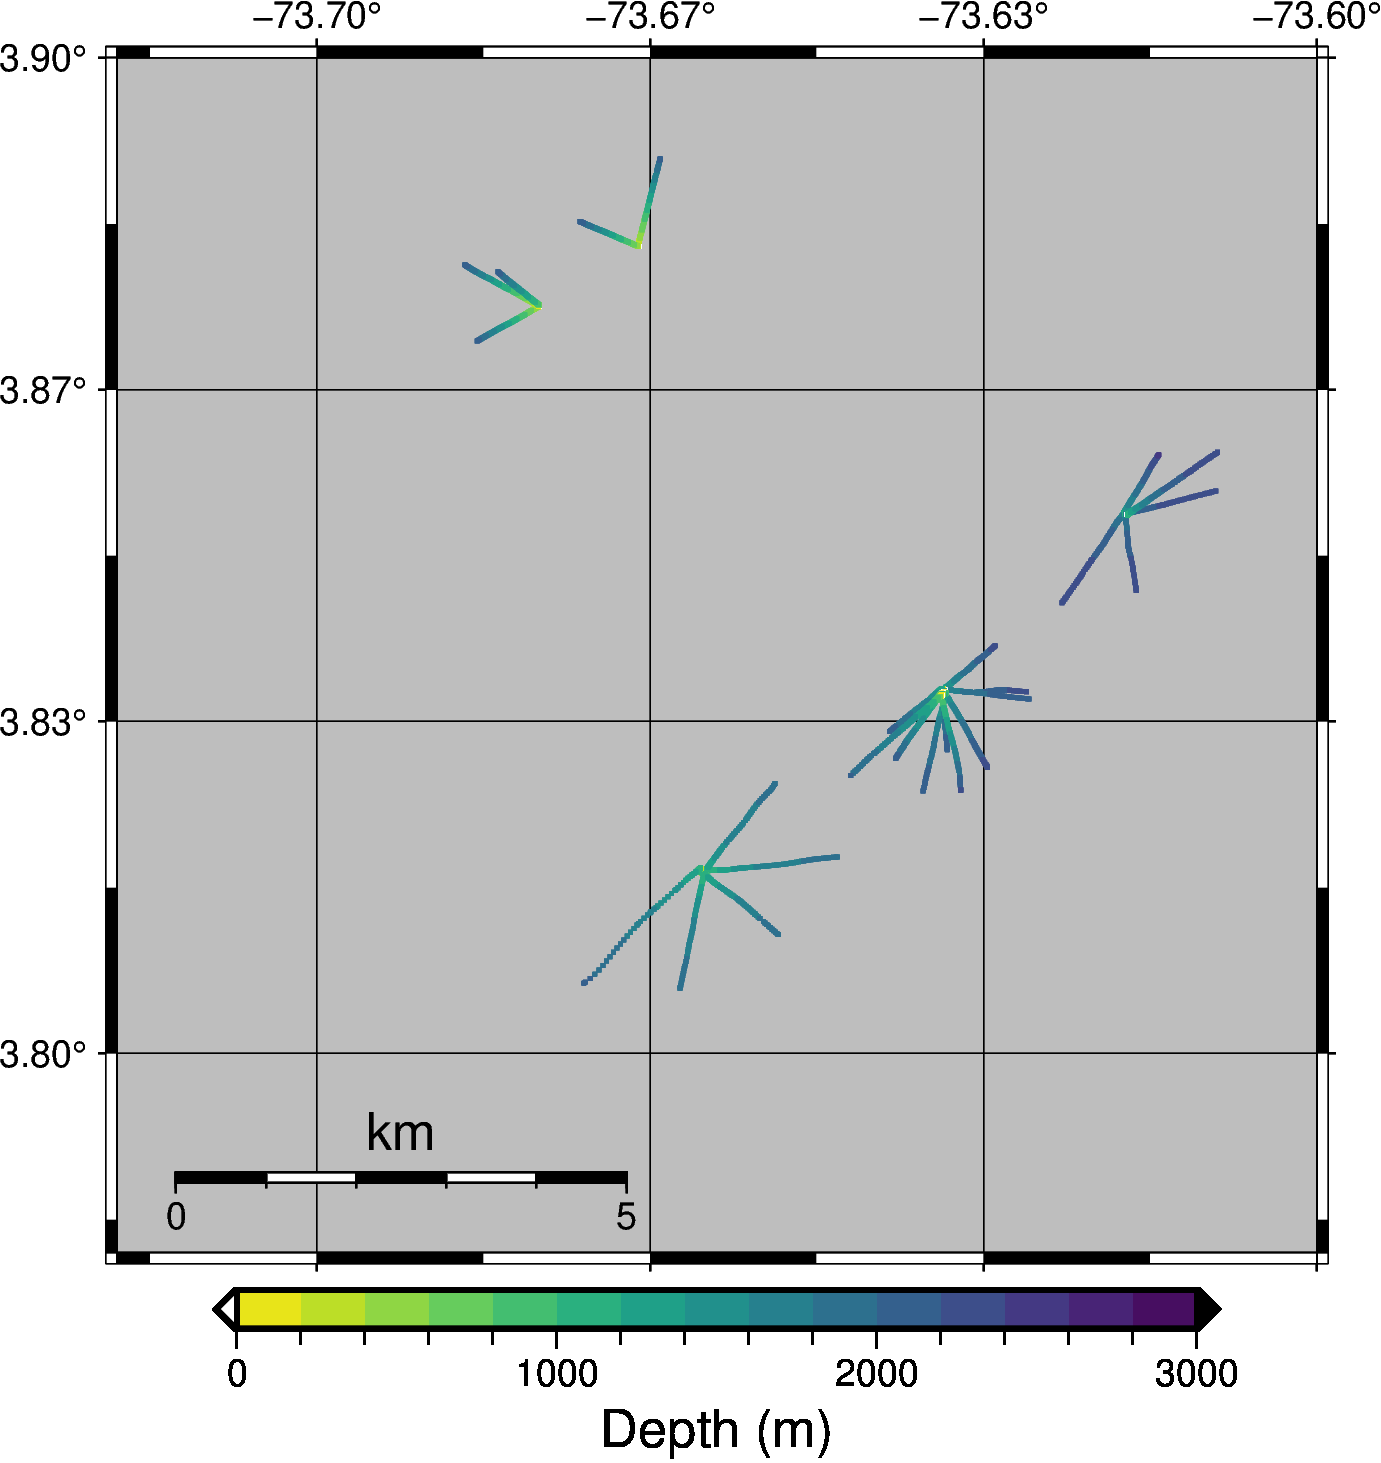

In [43]:
wells = {"mech_sta_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/survey_proc2.xlsx",
        "color_mech_sta":None, # No considered if cmap=True
        "cmap":True,
        "injection_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/CASTILLA_ft_ini.dat"}
fig,nomatter = seismic_profile.map(reg,catalogs=None,
                fms=None,
                wells = wells,
                cmap_args = {"cmap":'viridis', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "overrule_bg":False, #overrule True to color white and black the outliers.
                            "reverse":True, # reverse the colorbar
                            "series":[0, 3e3,200] }, #remove 200 if you want continous colorbar.
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend_args = {"xloc":-73.59, #xloc,yloc are the x-y map coordinates to locate the legend.
                                "yloc":3.79}, # only if legend is True
                legend=False
                )
                
fig.show()
outpath = os.path.join(rep_out,"mymap_well3.png")
fig.savefig(outpath,dpi=300)

#### 1.6.3 Catalog + shape+ FM + Well
catalog

In [44]:
cat_csv = os.path.join(rep_data,"earthquakes","castilla_20190515_20220421_by_pad.csv")
events = uf.transform_to_fmt_catalog(cat_csv,
        columns={"Origin tim":"origin_time",
                "Latitude (":"latitude",
                "Longitude":"longitude",
                "Depth (m)":"depth",
                "Mag. (Mw)":"magnitude"})
                
catalogs = [{"data":events[events["Type"]=="Cubarral"],
           "color": "green", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"Castilla events"', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":None, # equation for the size
           "style" :"c0.1c", #circle in cm
           "cmap":False, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"black"} #color of the border
            ]

shapes

In [45]:
##before catalog
field_path = os.path.join(rep_data,"shapes","castilla_chichimene.shp")
field_path  = gpd.read_file(field_path)
field_path = field_path[field_path["FIELD_NAME"].isin(["Castilla",
                                                        "Castilla Norte",
                                                        "Castilla Este"])]
castilla_field = shape.ShapeObject(gdf=field_path,
                    label='"Castilla field"',
                    pen="1p,brown"                                        
                    ) 

block_path = os.path.join(rep_data,"shapes","cubarral.shp")
block_path  = gpd.read_file(block_path)
castilla_block = shape.ShapeObject(gdf=block_path,
                    label='"Cubarral block"',
                    pen="1p,black"                                        
                    ) 

shapes_before_catalog = [castilla_field,castilla_block]

FM

In [46]:
fm_csv = "/home/emmanuel/G-Ecopetrol/opt/Castilla_faults_wellbores/data/mf/MF_quifa_201301_202203.csv"
fm_events = uf.transform_to_fmt_catalog(fm_csv,
                        columns={"Origin time":"origin_time",
                        "Latitude (deg)":"latitude",
                        "Longitude (deg)":"longitude",
                        "Depth (m)":"depth",
                        "Mag.":"magnitude",
                        "Mag. (Mw)":"magnitude",
                        "Strike n1 (deg)":"strike_n1",
                        "Dip n1 (deg)":"dip_n1",
                        "Dip n2 (deg)":"dip_n2",
                        "Rake n1 (deg)":"rake_n1",
                        "Rake n2 (deg)":"rake_n2",
                        "Strike n1 (deg)":"strike_n1",
                        "Strike n2 (deg)":"strike_n2",
                        "Dip n2 (deg)":"dip_n2",
                        
                        })
fms2= [ {"data":fm_events,
        "color":"blue", #Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
        "scale_for_m5":1, #Adjusts the scaling of the radius of the beachball, 
                        #which is proportional to the magnitude. Scale defines the size for magnitude = 5.
                        # In this case, M5 es equal to 1cm
        "main_n":1,  # you can choose tha nodal plane n1 or n2 
        "cmap":False} ]

well

/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:134: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(
plot [ERROR]: Your -W syntax is obsolete; see program usage.
plot [WARNING]: 0.0001p+ not a valid number and may not be decoded properly.
plot [ERROR]: Your -W syntax is obsolete; see program usage.
plot [WARNING]: 0.0001p+ not a val

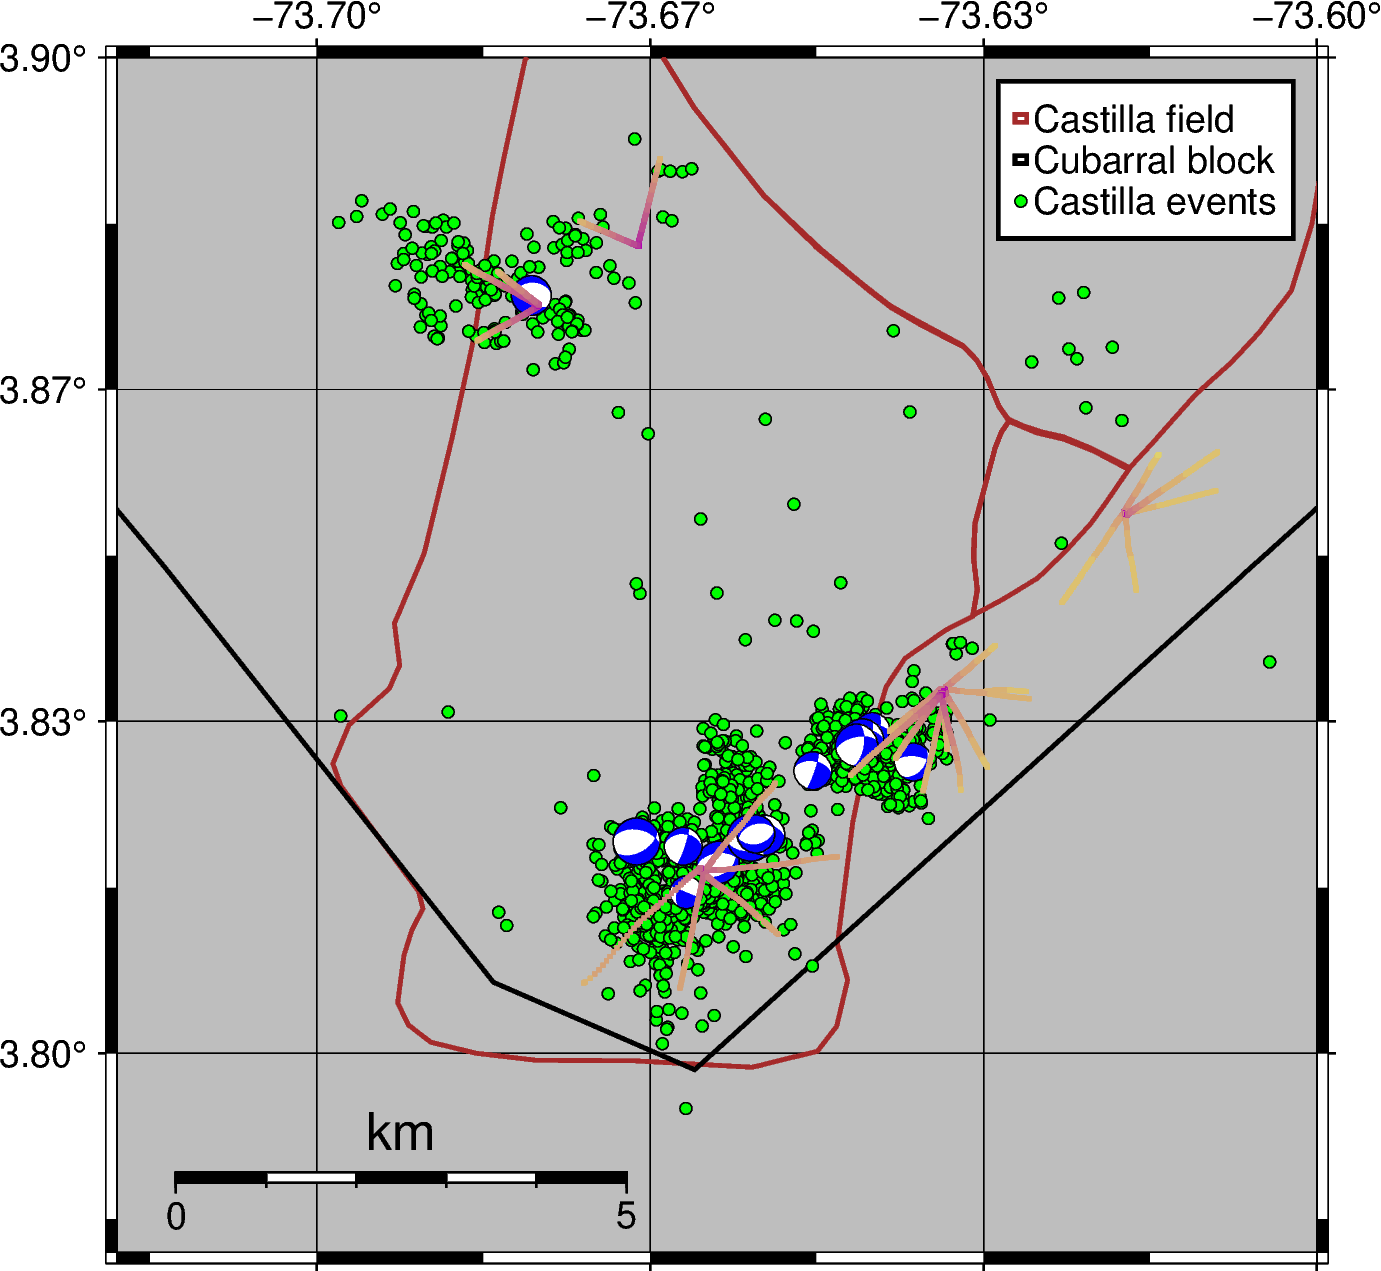

In [47]:
wells = {"mech_sta_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/survey_proc2.xlsx",
        "color_mech_sta":None, # No considered if cmap=True
        "cmap":True,
        "injection_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/CASTILLA_ft_ini.dat"}
fig,nomatter = seismic_profile.map(reg,catalogs=catalogs,
                fms=fms2,
                cmap_args = {"cmap":'buda', #name of the colorbar. see gmt colorbars
                            "color_target":"depth", #Here, colorbar refers to the depth column of the catalog. 
                                                    #You can use origin_time column as well
                            "label":"Depth (m)", #label of the colorbar
                            "reverse":False, # reverse the colorbar
                            "series":[0, 3e3,200] }, #remove 200 if you want continous colorbar.
                                                    # [] empty to select the minimum and maximum values of the catalog
                
                shapes_before_catalog=shapes_before_catalog,
                wells = wells,
                map_scale_args = {"xloc":None, #xloc,yloc are the x-y map coordinates to locate the scale bar.
                                "yloc":None,
                                "distance":5}, #distance en km
                legend=True
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_well4.png")
fig.savefig(outpath,dpi=300)

## 2. Profile

#### 2.1 Define your map parameters (seen previously)

region

In [15]:
lats = 3.78;latn = 3.90;lonw = -73.72;lone = -73.60 #castilla
reg = [lonw , lone, lats, latn ]

catalog

In [16]:
cat_csv = os.path.join(rep_data,"earthquakes","castilla_20190515_20220421_by_pad.csv")
events = uf.transform_to_fmt_catalog(cat_csv,
        columns={"Origin tim":"origin_time",
                "Latitude (":"latitude",
                "Longitude":"longitude",
                "Depth (m)":"depth",
                "Mag. (Mw)":"magnitude"})
                
catalogs = [{"data":events[events["Type"]=="Cubarral"],
           "color": "green", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"Castilla events"', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":lambda x: 0.1 * np.sqrt(1.5 ** (x*1.5)), # equation for the size
           "style" :"cc", #circle in cm
           "cmap":True, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"black"} #color of the border
            ]

shapes

In [17]:
##before catalog
field_path = os.path.join(rep_data,"shapes","castilla_chichimene.shp")
field_path  = gpd.read_file(field_path)
field_path = field_path[field_path["FIELD_NAME"].isin(["Castilla",
                                                        "Castilla Norte",
                                                        "Castilla Este"])]
castilla_field = shape.ShapeObject(gdf=field_path,
                    label='"Castilla field"',
                    pen="1p,brown"                                        
                    ) 

block_path = os.path.join(rep_data,"shapes","cubarral.shp")
block_path  = gpd.read_file(block_path)
castilla_block = shape.ShapeObject(gdf=block_path,
                    label='"Cubarral block"',
                    pen="1p,black"                                        
                    ) 

shapes_before_catalog = [castilla_field,castilla_block]

#### 2.2 Define your profile parameters 

In [18]:
profiles = [
        {"name":("A","A'"),      
        "coords":((-73.67,3.81),(-73.652942,3.81)), 
        "width":(-0.25,0.25), #left and right width
        "colorline":"magenta", #only for map figure
        "color": "blue", # only for profile figure.
                        #color of the events in the profile. Only if cmap is False
        "size":lambda x: 0.1 * np.sqrt(1.5 ** (x*1.5)), # only for profile figure.
        "style" :"cc",# only for profile figure.
        "pen":"black", # only for profile figure. 
        "cmap":True, # only for profile figure. # cmap controlled by cbar_profile_args
        "cbar_profile_args" : {"cmap":'viridis', 
                                "color_target":"depth",
                                "label":"Depth (m)",
                                "reverse":False,
                                "series":[0, 3e3] } # only for profile figure. # cbar profile args
        },

        {"name":("B","B'"),      
        "coords":((-73.696144,3.886038),(-73.674735,3.870880)),
        "width":(-1,1),
        "colorline":"magenta",
        "color": None,
        "size":lambda x: 0.1 * np.sqrt(1.5 ** (x*1.5)),
        "style" :"cc",
        "pen":None,
        "cmap":True,
        "cbar_profile_args" :{"cmap":'roma',
                                "color_target":"origin_time",
                                "label":"Time",
                                "overrule_bg":True,
                                "reverse":False,
                                "series":[dt.datetime(2020,1,1), 
                                        dt.datetime(2022,1,10)] }
        },

        {"name":("C","C'"),      
        "coords":((-73.6614118,3.8181902),(-73.651240,3.830452)),
        "width":(-0.15,0.15),
        "colorline":"magenta",
        "color": None,
        "size":lambda x: 0.1 * np.sqrt(1.5 ** (x*1.5)),
        "style" :"cc",
        "pen":None,
        "cmap":True,
        "cbar_profile_args" : {"cmap":'roma',
                                "color_target":"depth",
                                "label":"Depth (m)",
                                "overrule_bg":True,
                                "reverse":False,
                                "series":[0,3e3,200] }
        },

        ]

#### 2.3 Plot your map with the profiles

/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:122: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


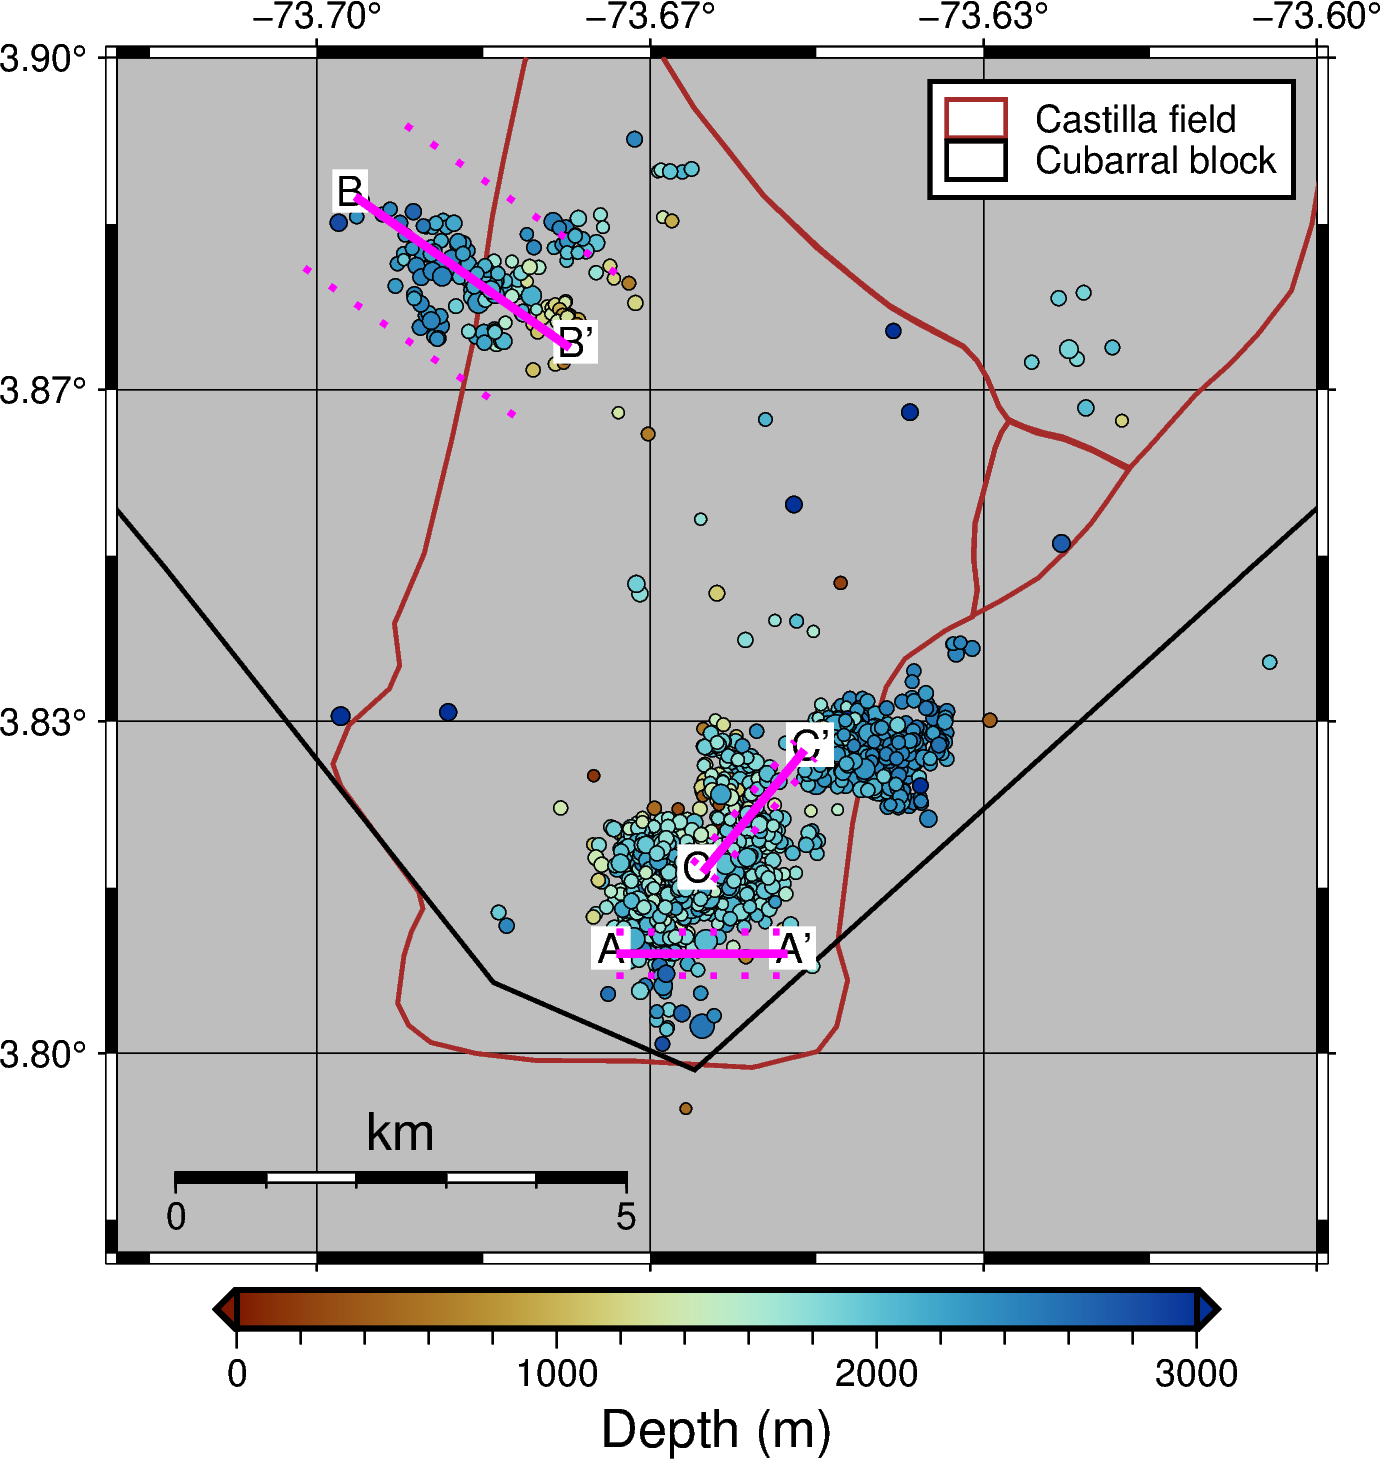

In [19]:
fig, nomatter = seismic_profile.map(reg,catalogs=catalogs,
                profiles = profiles,
                fms=None,
                wells=None,
                cmap_args = {"cmap":'roma', 
                                "label":"Depth (m)", #label of the colorbar
                                "color_target":"depth",
                                "reverse":False,
                                "series":[0, 3e3] },
                shapes_before_catalog=shapes_before_catalog,
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_profile1.png")
fig.savefig(outpath,dpi=300)

project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-yamapd8u.csv
project [INFORMATION]: 1900 read, 64 used
project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-yk7p4yu8.csv
project [INFORMATION]: 1900 read, 202 used
project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-e7ngmcjn.csv
project [INFORMATION]: 1900 read, 426 used


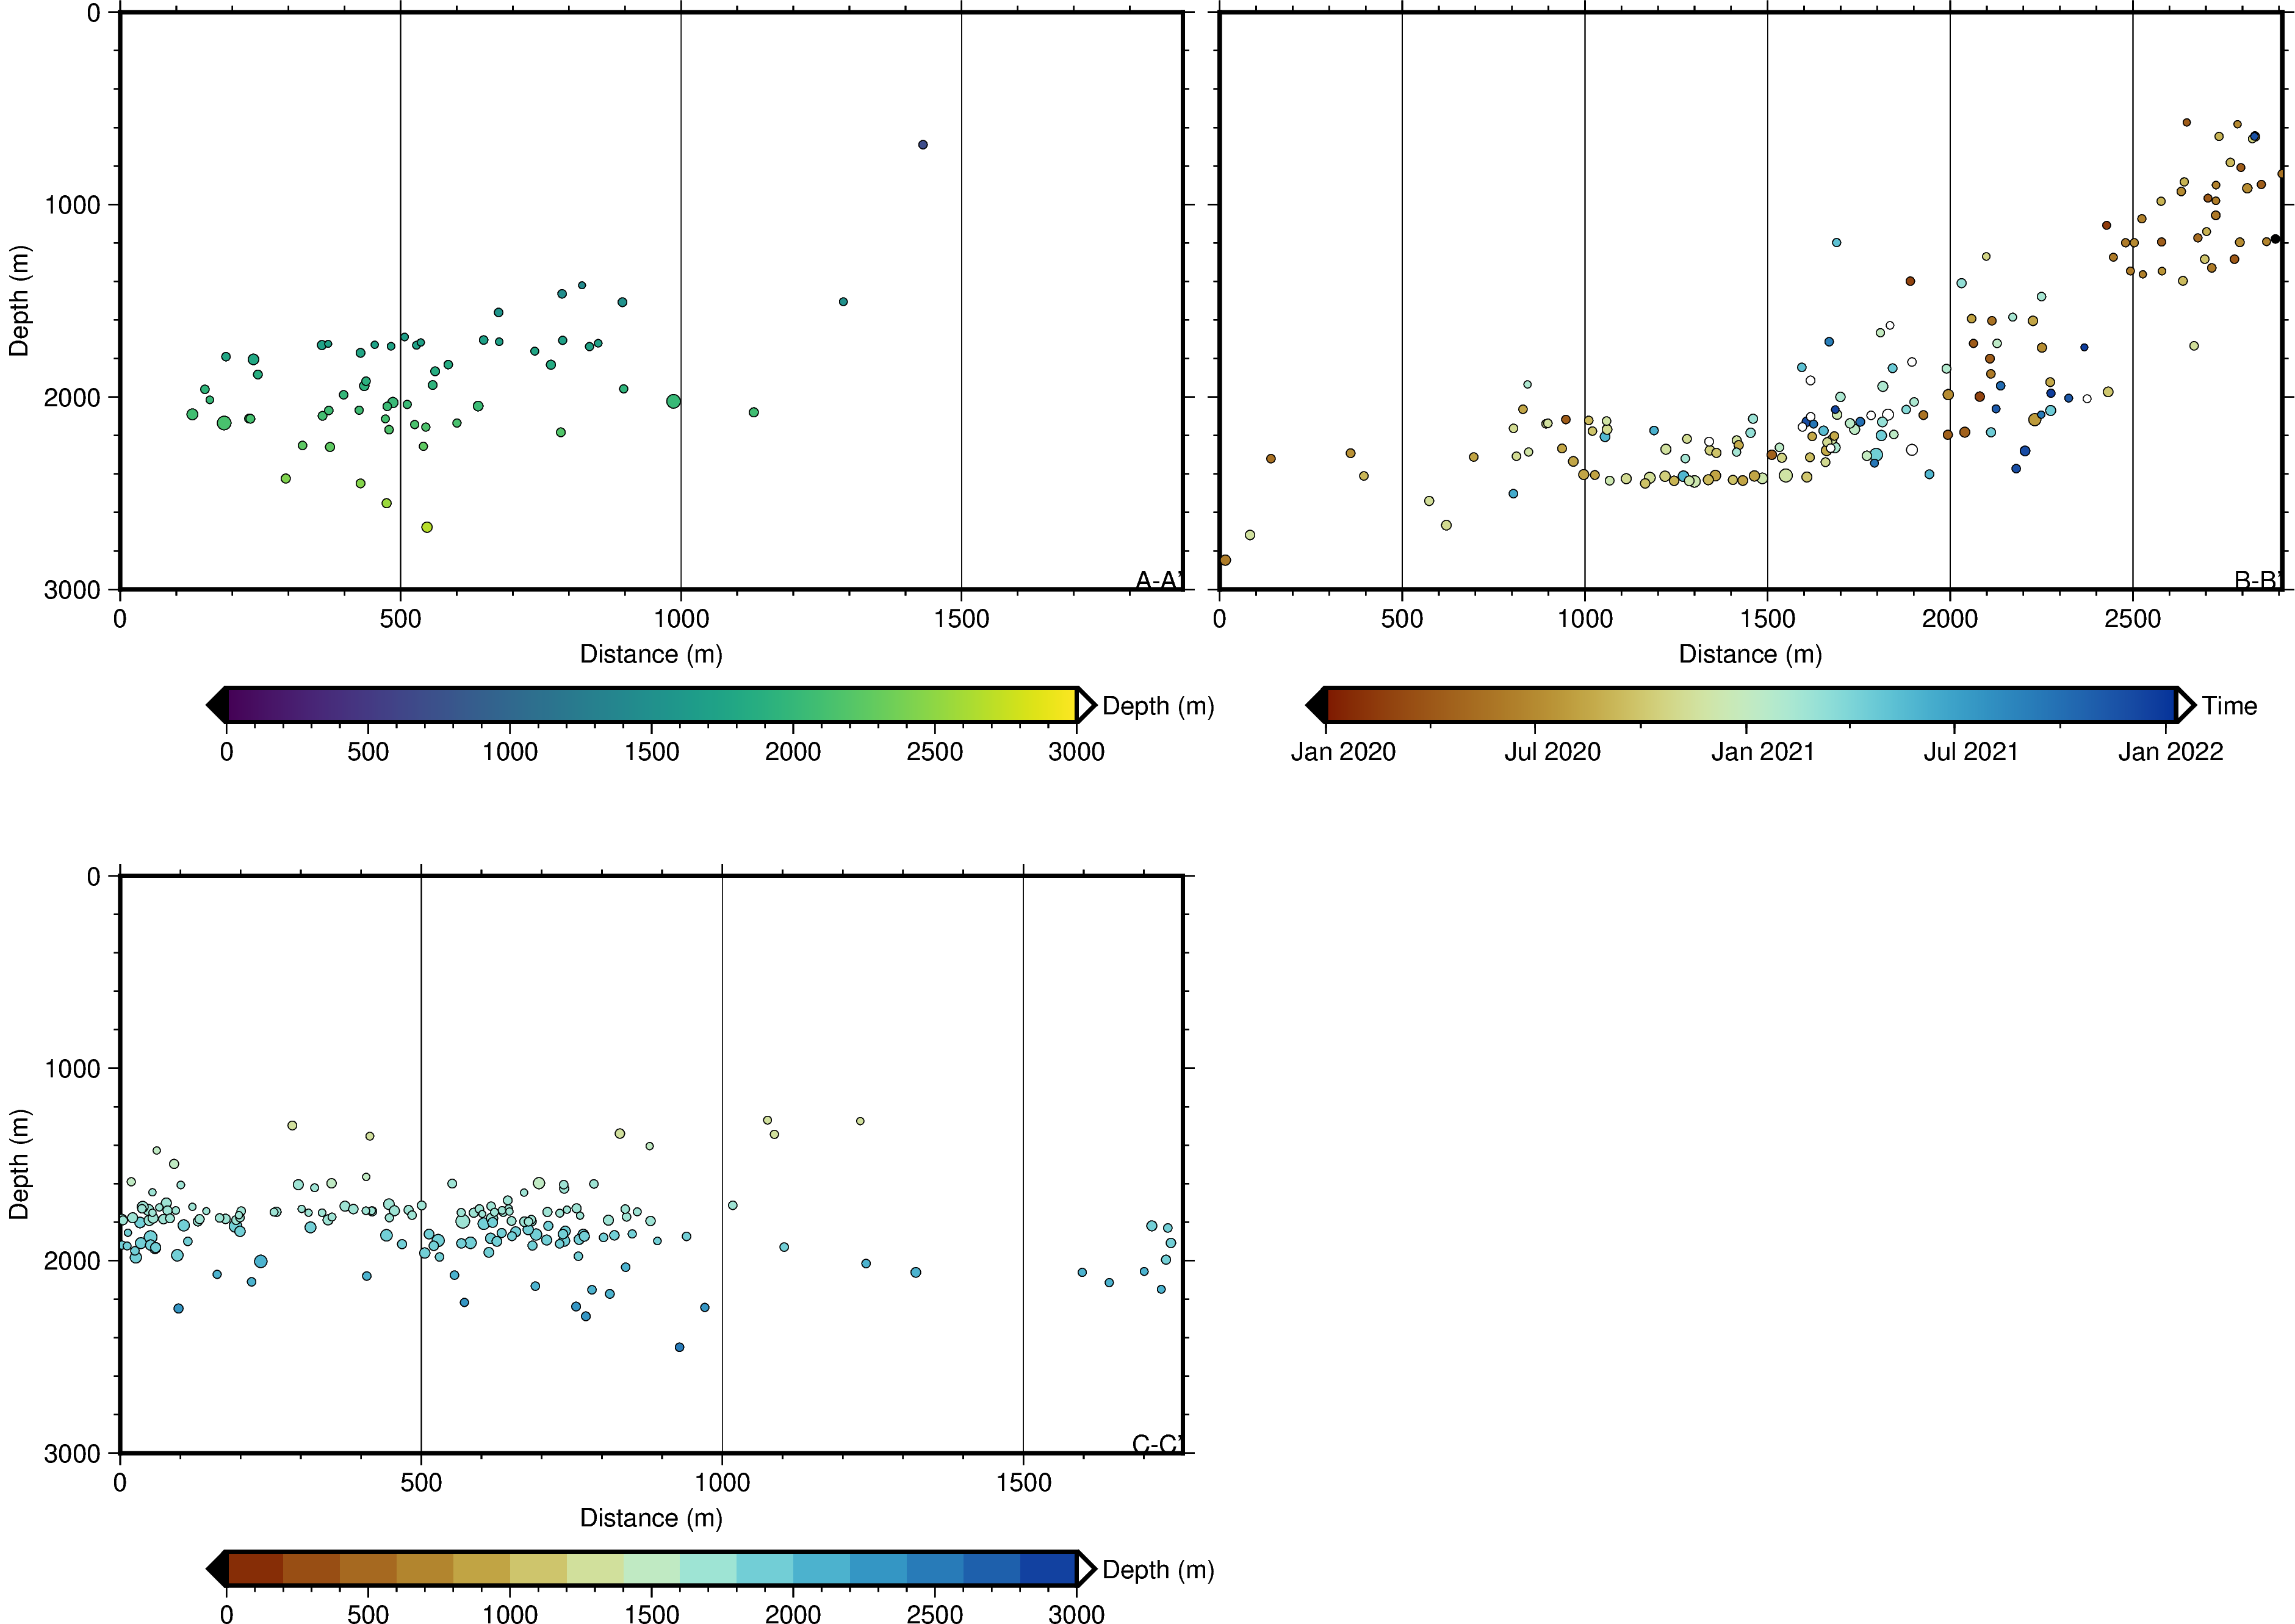

In [20]:
prof_fig = seismic_profile.profile_plots(region=reg,
                catalogs=catalogs,
                profiles= profiles,
                fms=None,
                wells=None,
                depth=[0,3e3],
                figsize = ("30c", "20c"),
                depth_unit="m",
                save=True)
prof_fig.show()
outpath = os.path.join(rep_out,"mymap_profile1_cross.png")
prof_fig.savefig(outpath,dpi=300)

#### 2.4 Profile with wells and FM

see injection format

In [8]:
wells = {"mech_sta_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/survey_proc2.xlsx",
        "color_mech_sta":{"CLIA01":"red","CRA05":"violet","CRA04":"orange"}, # Always considered in profile. No considered in map if cmap=True. 
        "cmap":False,
        "injection_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/CASTILLA_ft_ini.dat"}
df = pd.read_csv(wells["injection_path"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wellbore    40 non-null     object 
 1   name        40 non-null     object 
 2   min         40 non-null     float64
 3   max         40 non-null     float64
 4   depth_type  40 non-null     object 
 5   date        40 non-null     object 
 6   elevation   40 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.3+ KB


fms

In [9]:
fm_csv = "/home/emmanuel/G-Ecopetrol/opt/Castilla_faults_wellbores/data/mf/MF_quifa_201301_202203.csv"
fm_events = uf.transform_to_fmt_catalog(fm_csv,
                        columns={"Origin time":"origin_time",
                        "Latitude (deg)":"latitude",
                        "Longitude (deg)":"longitude",
                        "Depth (m)":"depth",
                        "Mag.":"magnitude",
                        "Mag. (Mw)":"magnitude",
                        "Strike n1 (deg)":"strike_n1",
                        "Dip n1 (deg)":"dip_n1",
                        "Dip n2 (deg)":"dip_n2",
                        "Rake n1 (deg)":"rake_n1",
                        "Rake n2 (deg)":"rake_n2",
                        "Strike n1 (deg)":"strike_n1",
                        "Strike n2 (deg)":"strike_n2",
                        "Dip n2 (deg)":"dip_n2",
                        
                        })
fms2= [ {"data":fm_events,
        "color":"blue", #Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
        "scale_for_m5":1, #Adjusts the scaling of the radius of the beachball, 
                        #which is proportional to the magnitude. Scale defines the size for magnitude = 5.
                        # In this case, M5 es equal to 1cm
        "main_n":1,  # you can choose tha nodal plane n1 or n2 
        "cmap":False} ]

/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:120: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


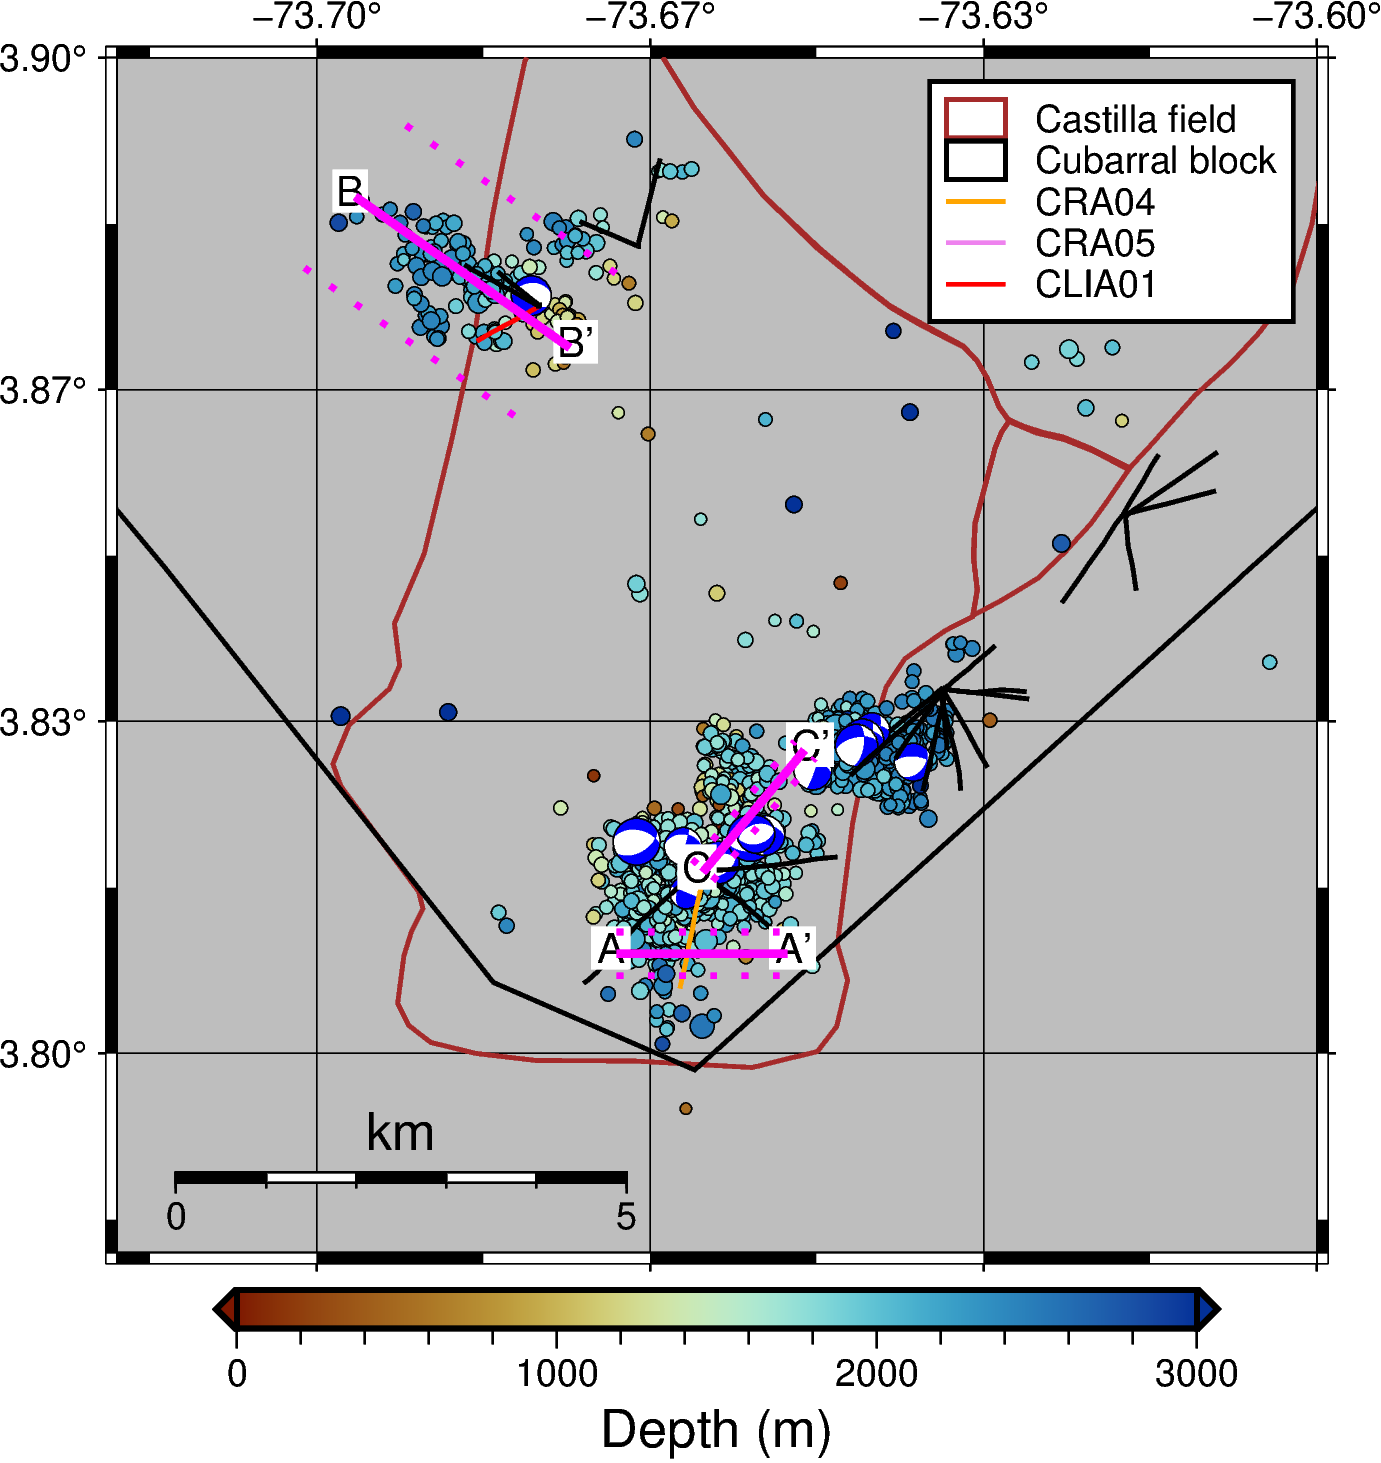

In [56]:
fig, nomatter = seismic_profile.map(reg,catalogs=catalogs,
                profiles = profiles,
                fms=fms2,
                wells=wells,
                cmap_args = {"cmap":'roma', 
                                "label":"Depth (m)", #label of the colorbar
                                "color_target":"depth",
                                "reverse":False,
                                "series":[0, 3e3] },
                shapes_before_catalog=shapes_before_catalog,
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_profile2.png")
fig.savefig(outpath,dpi=300)

project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-dnnr7nvu.csv
project [INFORMATION]: 1900 read, 64 used
project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-bs09bgpb.csv
project [INFORMATION]: 103 read, 0 used
project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-kis8ti7c.csv
project [INFORMATION]: 100 read, 19 used
project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-gyxlvbij.csv
project [INFORMATION]: 100 read, 0 used
project [INFORMAT

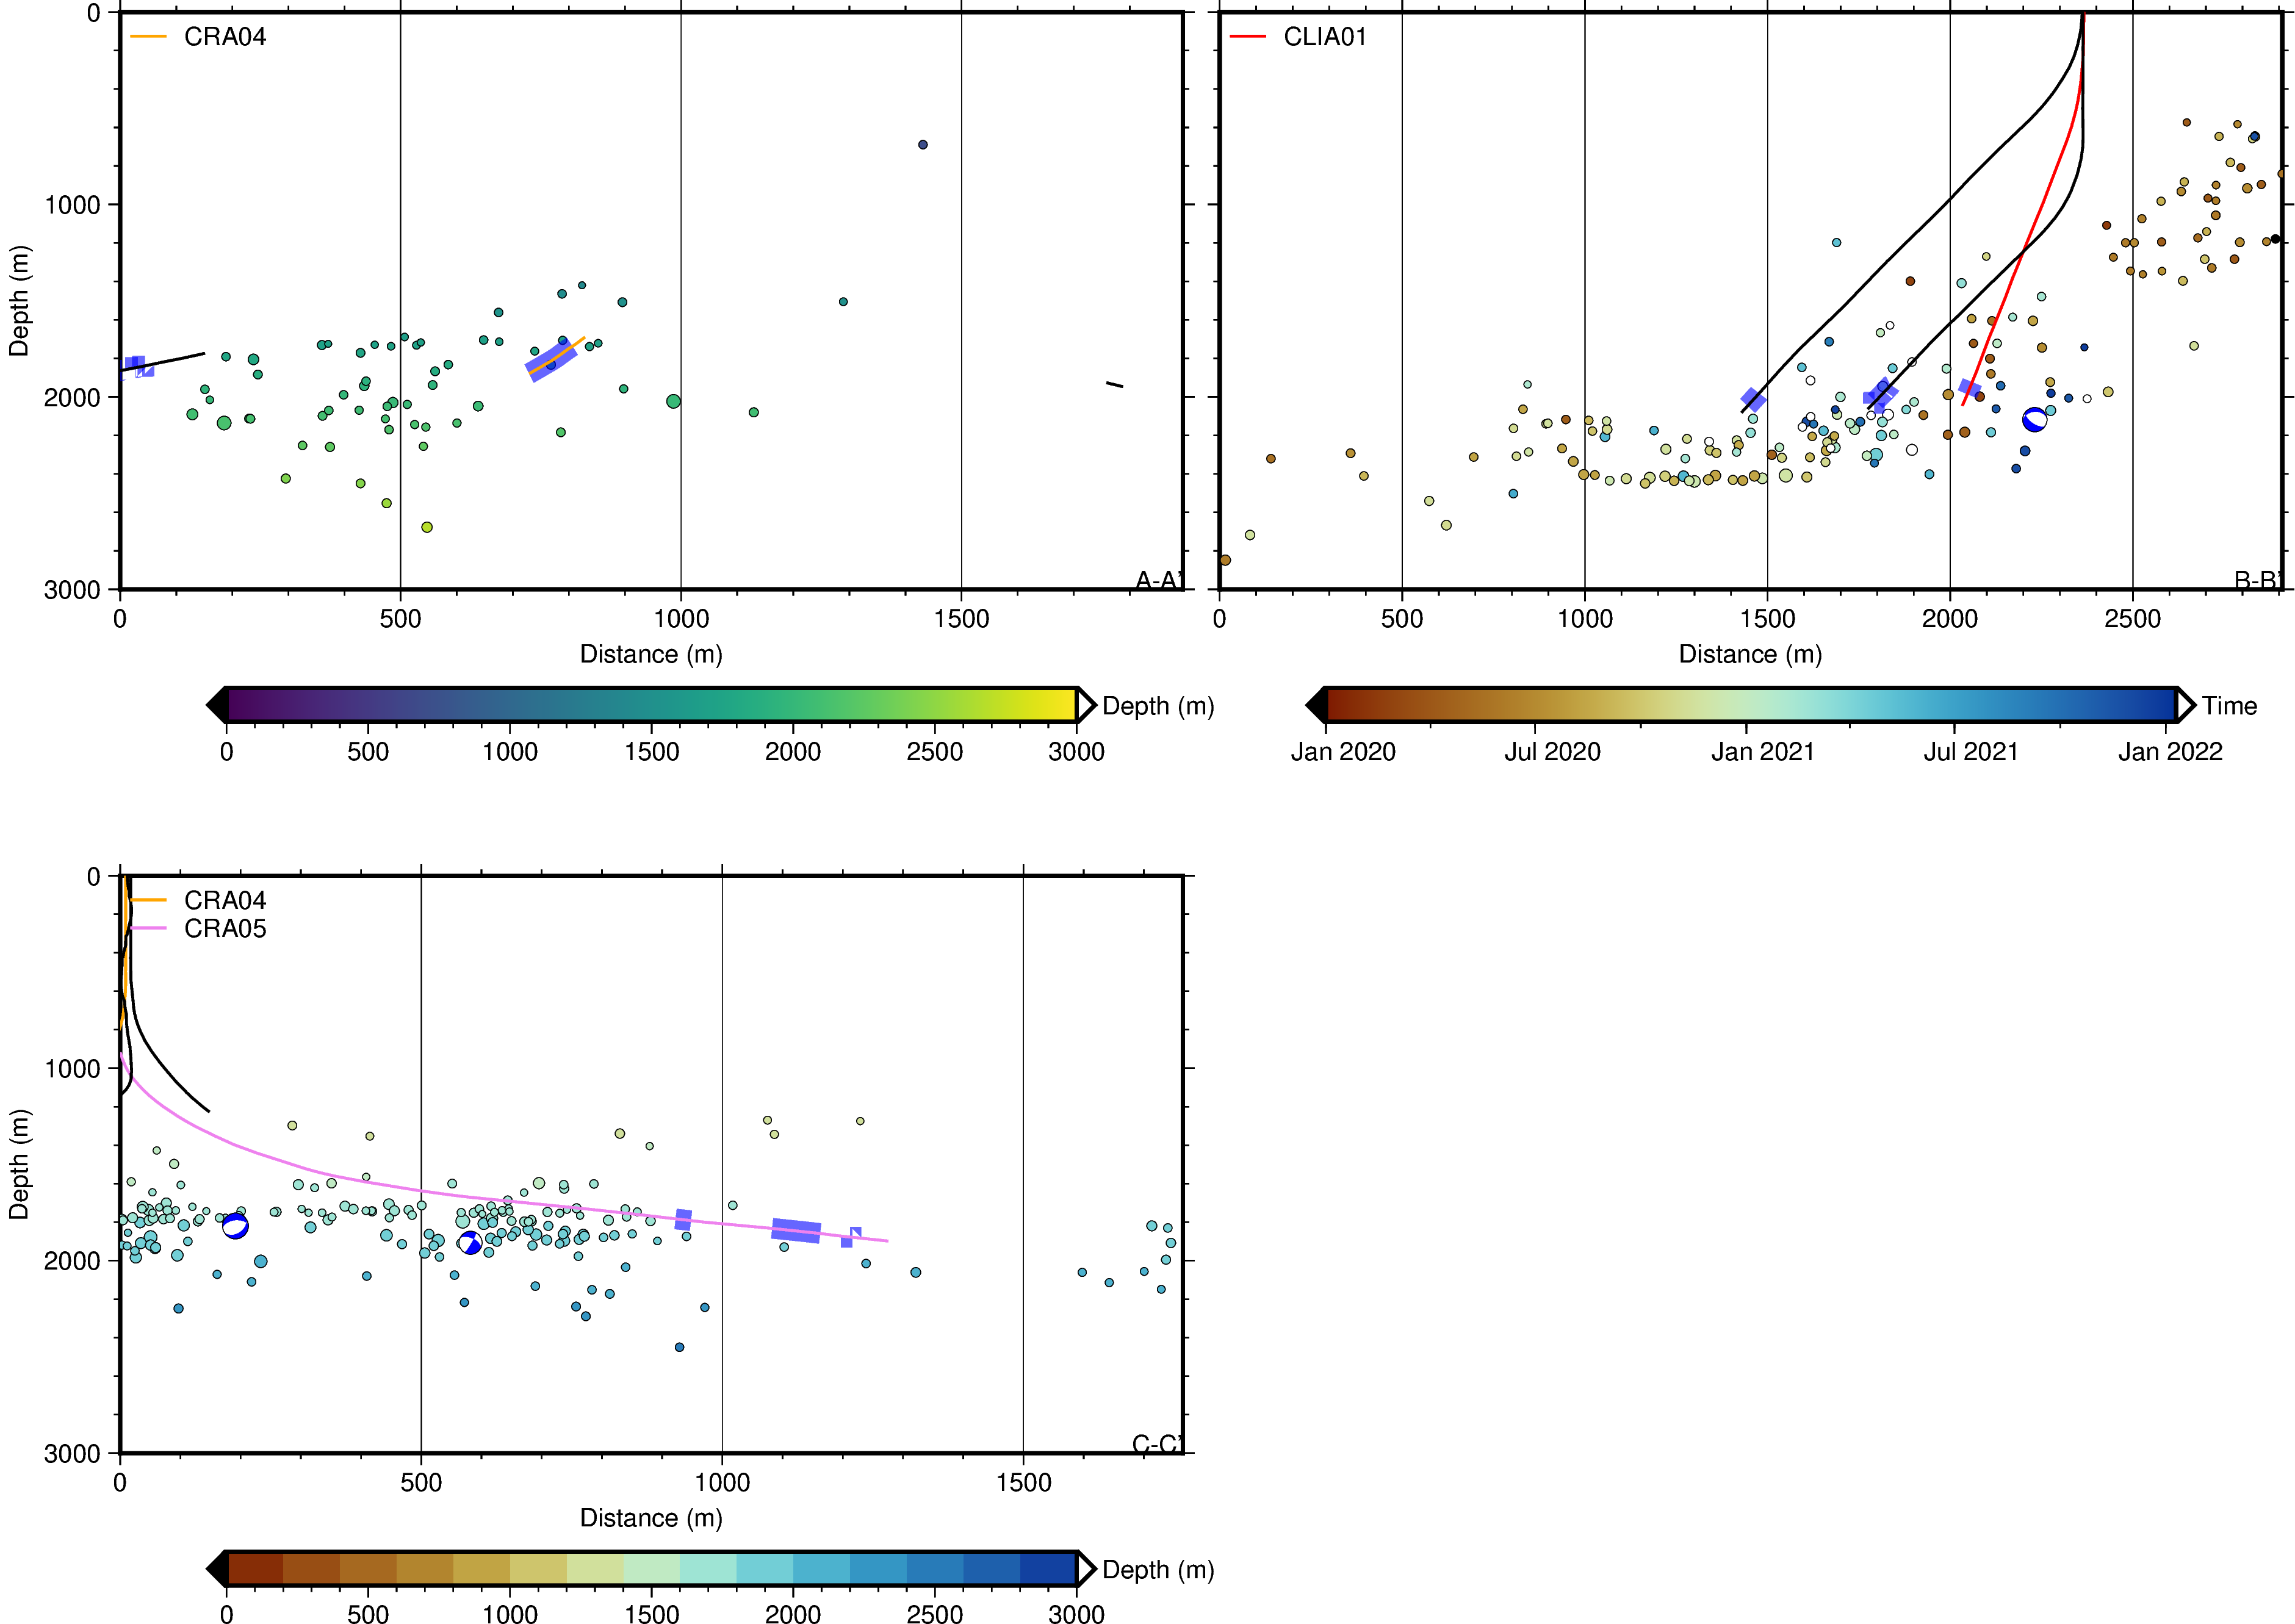

In [59]:
prof_fig = seismic_profile.profile_plots(region=reg,
                catalogs=catalogs,
                profiles= profiles,
                fms=fms2,
                wells=wells,
                depth=[0,3e3],
                figsize = ("30c", "20c"),
                depth_unit="m",
                save=True)
prof_fig.show()
outpath = os.path.join(rep_out,"mymap_profile2_cross.png")
prof_fig.savefig(outpath,dpi=300)

### 2.5. Several Profiles

looking for cross profiles. Based on initial and end points, make n  perpendicular segments (90 degrees).

if you want, change the profile parameters oin each segment

In [3]:
coords = ((-73.685857,3.870372),(-73.674690,3.876694))
n = 5
theta = 90
cross_profiles = utils.get_cross_profiles(coords,n,theta)
cross_profiles

[{'name': ('a', "a'"),
  'coords': ((-73.687153475204639, 3.8726620567241823),
   (-73.684560524795359, 3.868081943275818)),
  'width': (-0.1779672216976266, 0.1779672216976266),
  'colorline': 'magenta',
  'color': None,
  'size': None,
  'style': None,
  'pen': None,
  'cmap': True,
  'cbar_profile_args': {'cmap': 'roma',
   'color_target': 'depth',
   'label': 'Depth(m)',
   'overrule_bg': True,
   'reverse': False,
   'series': [0, 3000.0]}},
 {'name': ('b', "b'"),
  'coords': ((-73.684361725204639, 3.8742425567241821),
   (-73.681768774795358, 3.8696624432758178)),
  'width': (-0.1779672216976266, 0.1779672216976266),
  'colorline': 'magenta',
  'color': None,
  'size': None,
  'style': None,
  'pen': None,
  'cmap': True,
  'cbar_profile_args': {'cmap': 'roma',
   'color_target': 'depth',
   'label': 'Depth(m)',
   'overrule_bg': True,
   'reverse': False,
   'series': [0, 3000.0]}},
 {'name': ('c', "c'"),
  'coords': ((-73.681569975204638, 3.8758230567241823),
   (-73.6789770247

/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/seismic_profile.py:120: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(


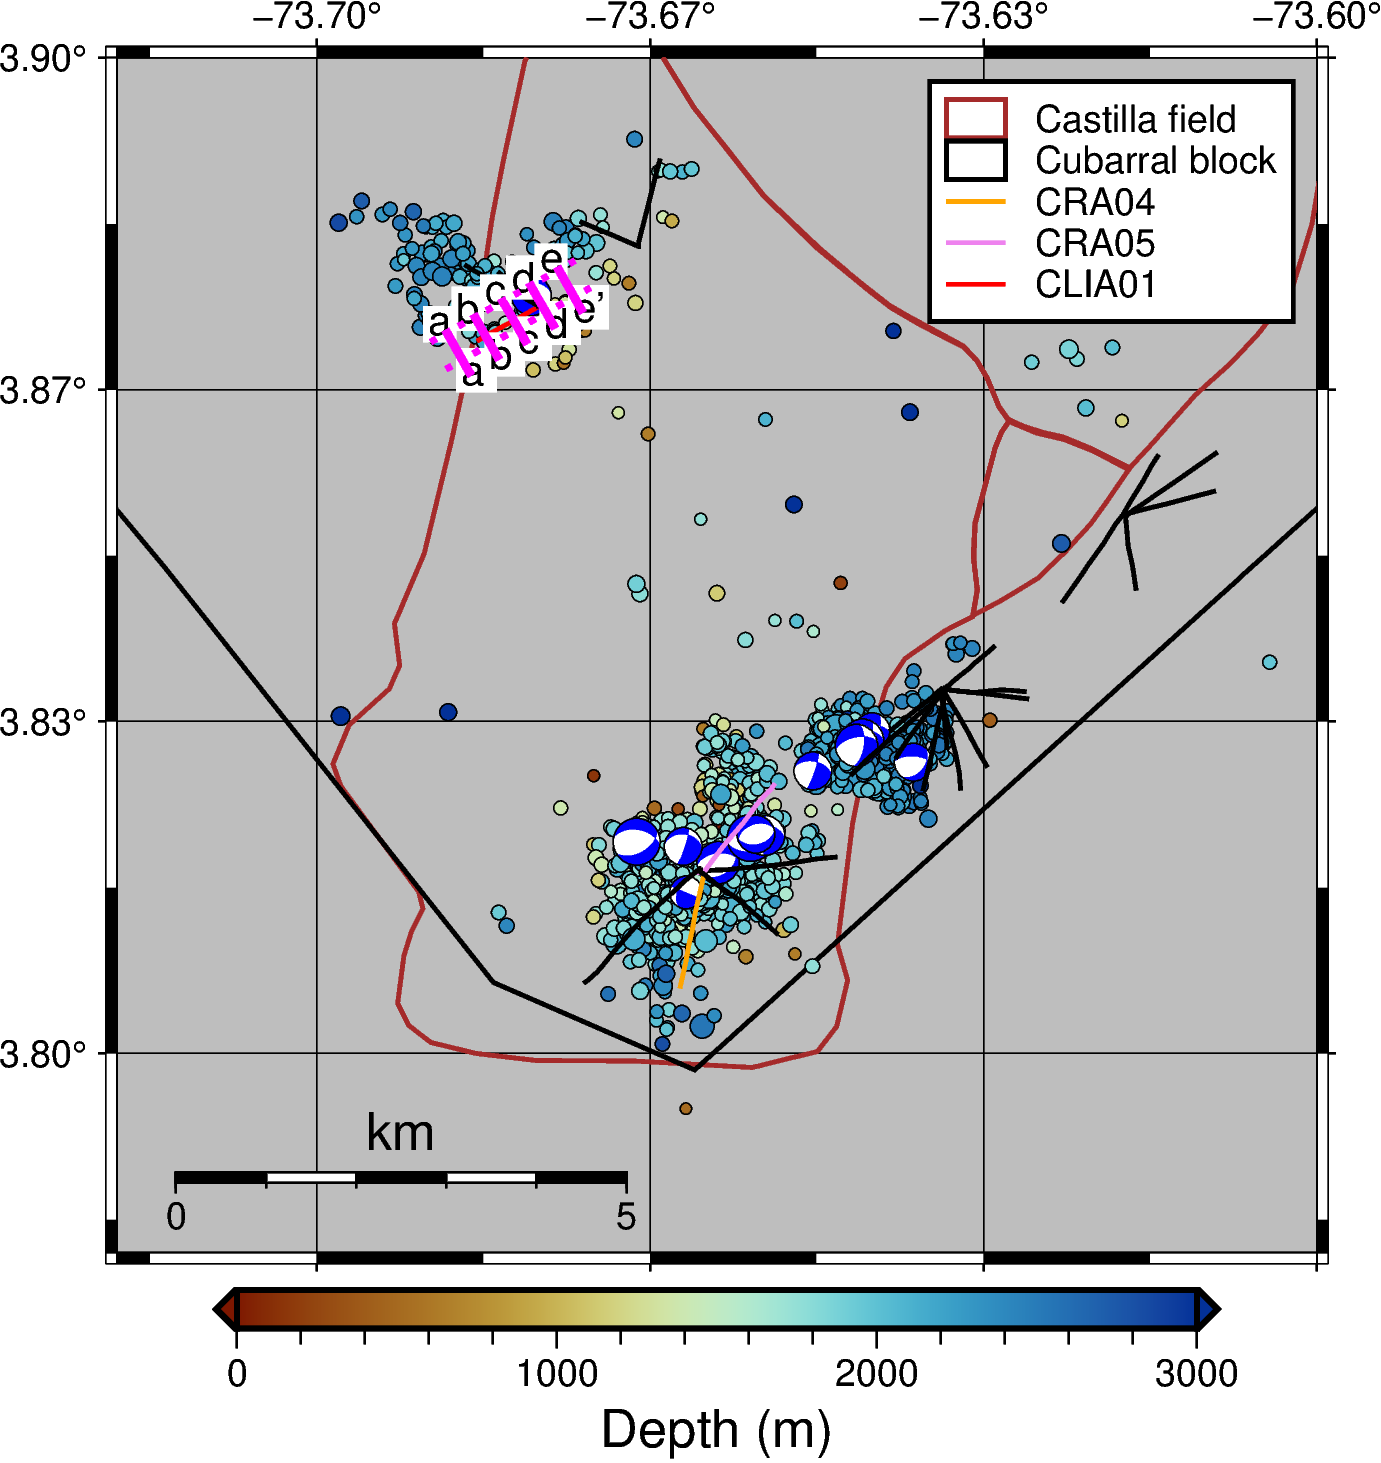

In [10]:
fig, nomatter = seismic_profile.map(reg,catalogs=catalogs,
                profiles = cross_profiles,
                fms=fms2,
                wells=wells,
                cmap_args = {"cmap":'roma', 
                                "label":"Depth (m)", #label of the colorbar
                                "color_target":"depth",
                                "reverse":False,
                                "series":[0, 3e3] },
                shapes_before_catalog=shapes_before_catalog,
                )
fig.show()
outpath = os.path.join(rep_out,"mymap_profile3.png")
fig.savefig(outpath,dpi=300)

project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-n3zzziz0.csv
project [INFORMATION]: 1900 read, 201 used
project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-p_p09uyn.csv
project [INFORMATION]: 103 read, 17 used
project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-_pa_m7y2.csv
project [INFORMATION]: 100 read, 0 used
project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-y229avno.csv
project [INFORMATION]: 100 read, 14 used
project [INFORM

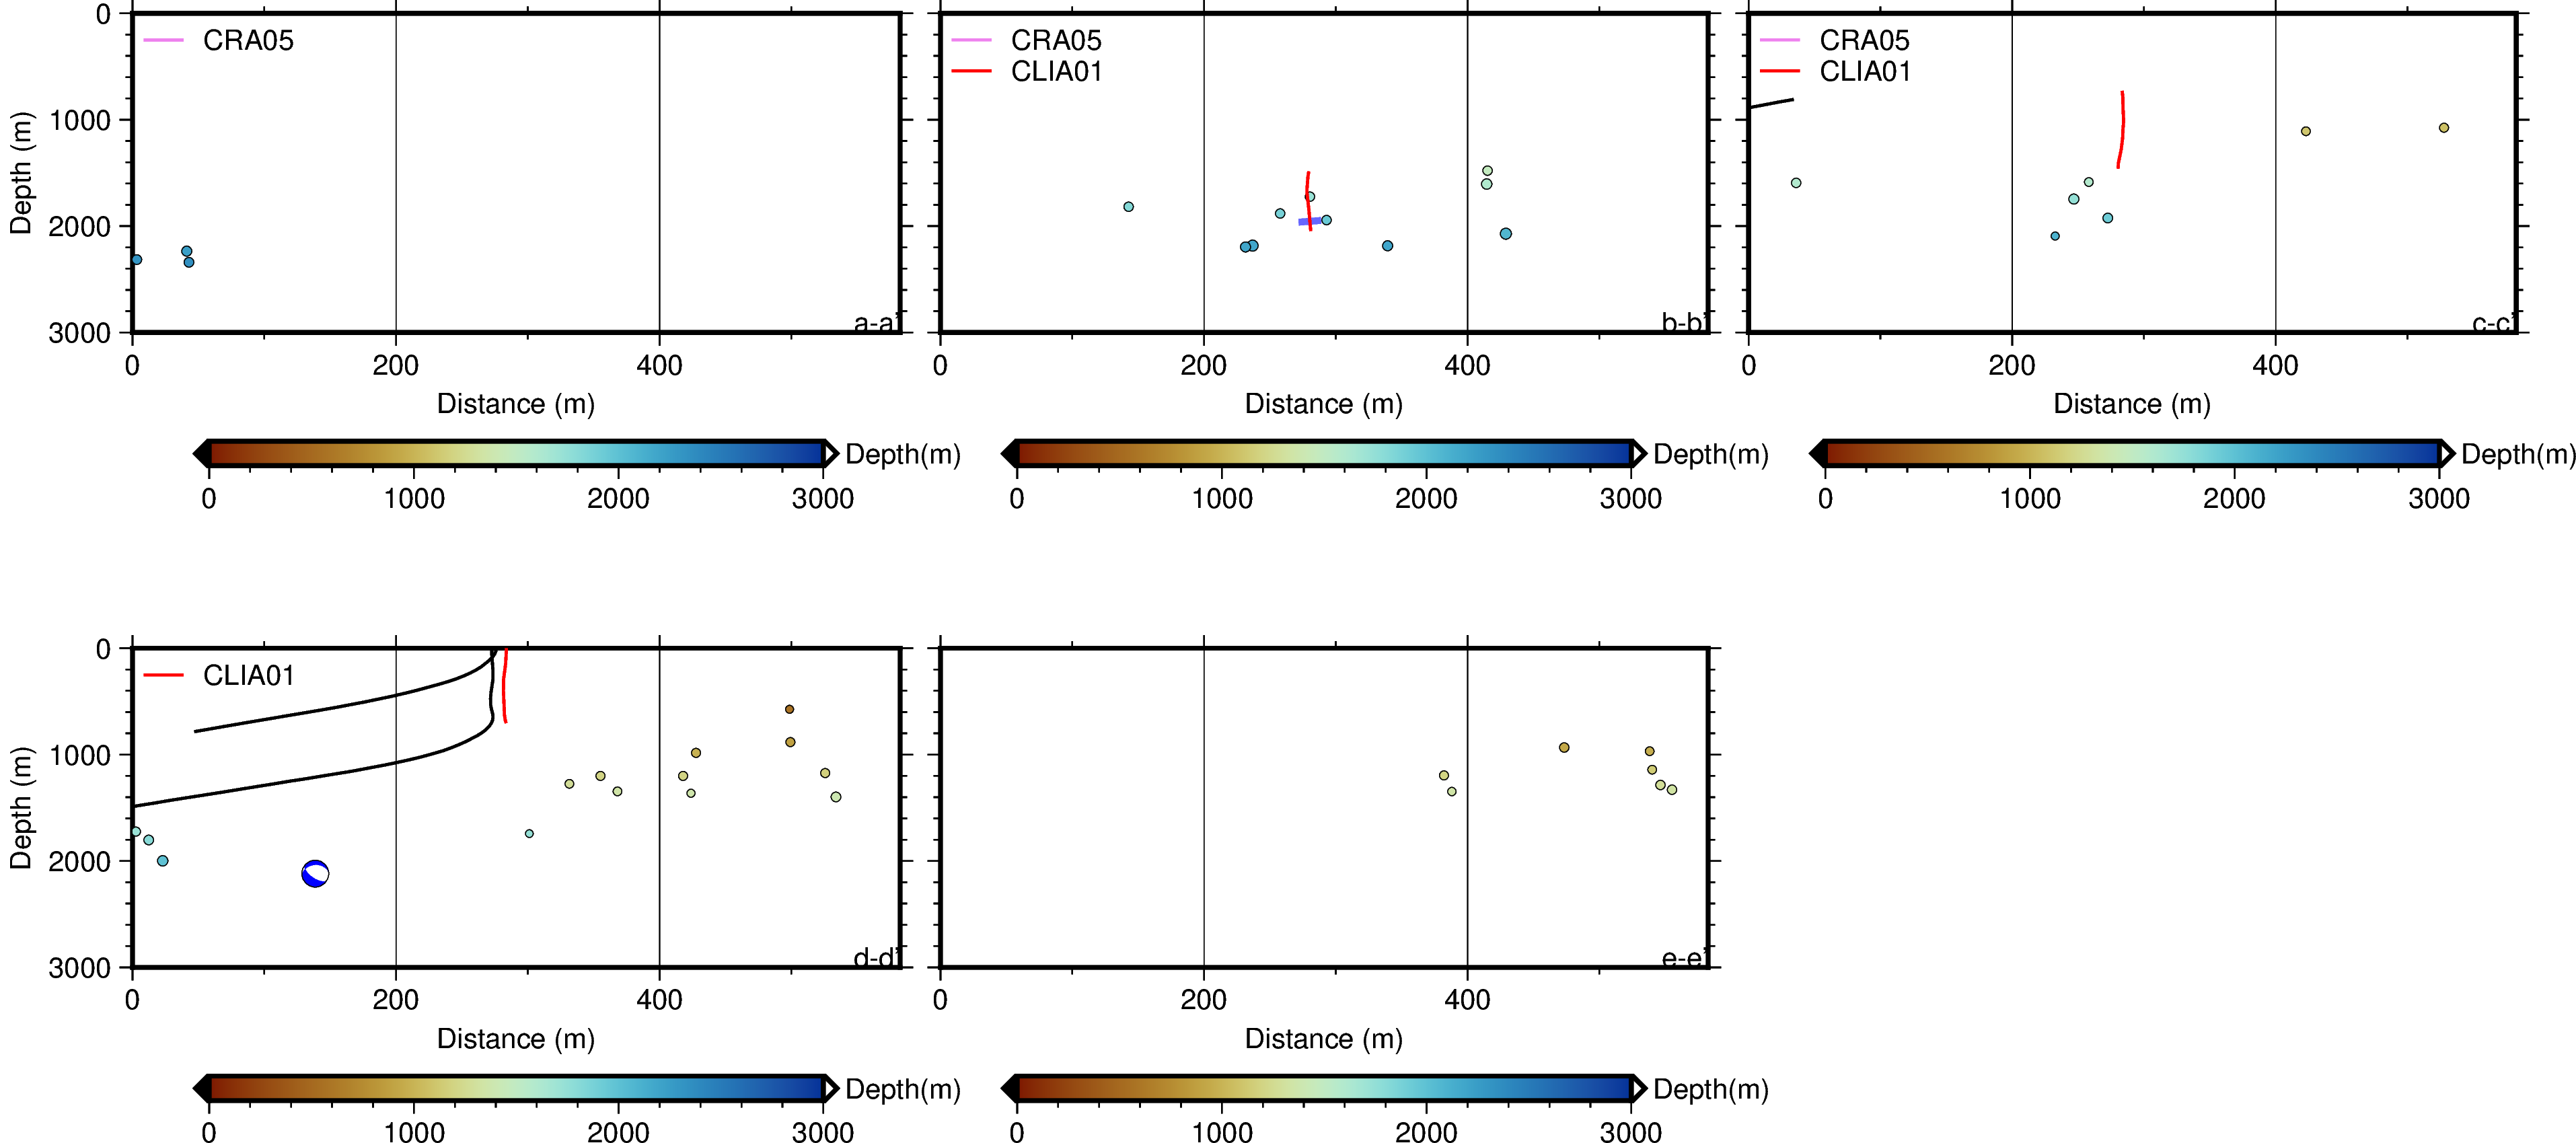

In [11]:
prof_fig = seismic_profile.profile_plots(region=reg,
                catalogs=catalogs,
                profiles= cross_profiles,
                fms=fms2,
                wells=wells,
                depth=[0,3e3],
                figsize = ("30c", "20c"),
                depth_unit="m",
                save=True)
prof_fig.show()
outpath = os.path.join(rep_out,"mymap_profile3_cross.png")
prof_fig.savefig(outpath,dpi=300)

## 3. XY Profile

catalog

In [3]:
cat_csv = os.path.join(rep_data,"earthquakes","castilla_20190515_20220421_by_pad.csv")
events = uf.transform_to_fmt_catalog(cat_csv,
        columns={"Origin tim":"origin_time",
                "Latitude (":"latitude",
                "Longitude":"longitude",
                "Depth (m)":"depth",
                "Mag. (Mw)":"magnitude"})
                
catalogs = [{"data":events[events["Type"]=="Cubarral"],
           "color": "green", # Color is not cosidered cause' cmap is True. To consider it, please change cmap to false
           "label":'"Castilla events"', #Label is not plotted if size or color is variable. Therefore, cmap must be False, and size must be None. 
                                        #Considering if size is None, then style must be c0.5c (circle with 0.5 cm, change 0.5 for your own size)
                                        # Put " " inside ' ' if your text have a whitespace. 
           "size":lambda x: 0.1 * np.sqrt(1.5 ** (x*1.5)), # equation for the size
           "style" :"cc", #circle in cm
           "cmap":True, # Use Colorbar (the specifications of the colorbar are located the main function called seismic_profile.map-> cmap_args)
           "pen":"black"} #color of the border
            ]

shapes

In [4]:
##before catalog
field_path = os.path.join(rep_data,"shapes","castilla_chichimene.shp")
field_path  = gpd.read_file(field_path)
field_path = field_path[field_path["FIELD_NAME"].isin(["Castilla",
                                                        "Castilla Norte",
                                                        "Castilla Este"])]
castilla_field = shape.ShapeObject(gdf=field_path,
                    label='"Castilla field"',
                    pen="1p,brown"                                        
                    ) 

block_path = os.path.join(rep_data,"shapes","cubarral.shp")
block_path  = gpd.read_file(block_path)
castilla_block = shape.ShapeObject(gdf=block_path,
                    label='"Cubarral block"',
                    pen="1p,black"                                        
                    ) 

shapes_before_catalog = [castilla_field,castilla_block]

wells

In [9]:
wells = {"mech_sta_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/survey_proc2.xlsx",
        "color_mech_sta":{"CLIA01":"red"}, # Always considered in profile. No considered in map if cmap=True. 
        "cmap":False,
        "injection_path":"/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/data/seismic_profile_example/wells/CASTILLA_ft_ini.dat"}

In [10]:
from Sismologia_Ecopetrol.map import xy_seismic_profile as xy_sp

profile = {
        "color": "gray",
        "size":None,
        "style" :None,
        "pen":"black",
        "cmap":True,
        "cbar_profile_args" : {"cmap":'roma', 
                                "color_target":"depth",
                                "label":"Depth (m)",
                                "reverse":False,
                                "series":[0, 3e3] }
        }

Here, we specify lats and lonw coordinates. We found latn and lone properly in order to have a square.

For instance, search the coordinates at 45 degrees of azimuth and 4e3 meters of distance

In [11]:
import pyproj

lats = 3.865461;lonw = -73.699049
lone,latn,backAzimuth = (pyproj.Geod(ellps='WGS84').fwd(lonw,lats,
                                                        45,4e3)) ## 45 degrees, 4e3 meters
reg = [lonw , lone, lats, latn ]

/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/anaconda3/envs/seisplotlib/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/emmanuel/Ecopetrol/Sismologia_Ecopetrol/Sismologia_Ecopetrol/map/xy_seismic_profile.py:119: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(
project [INFORMATION]: Processing input table data
project [INFORMATION]: Reading Data Table from Input memory location via vector
project [INFORMATION]: Writing Data Table to file /tmp/pygmt-qnryjmai.csv
project [INFORMATION]: 17

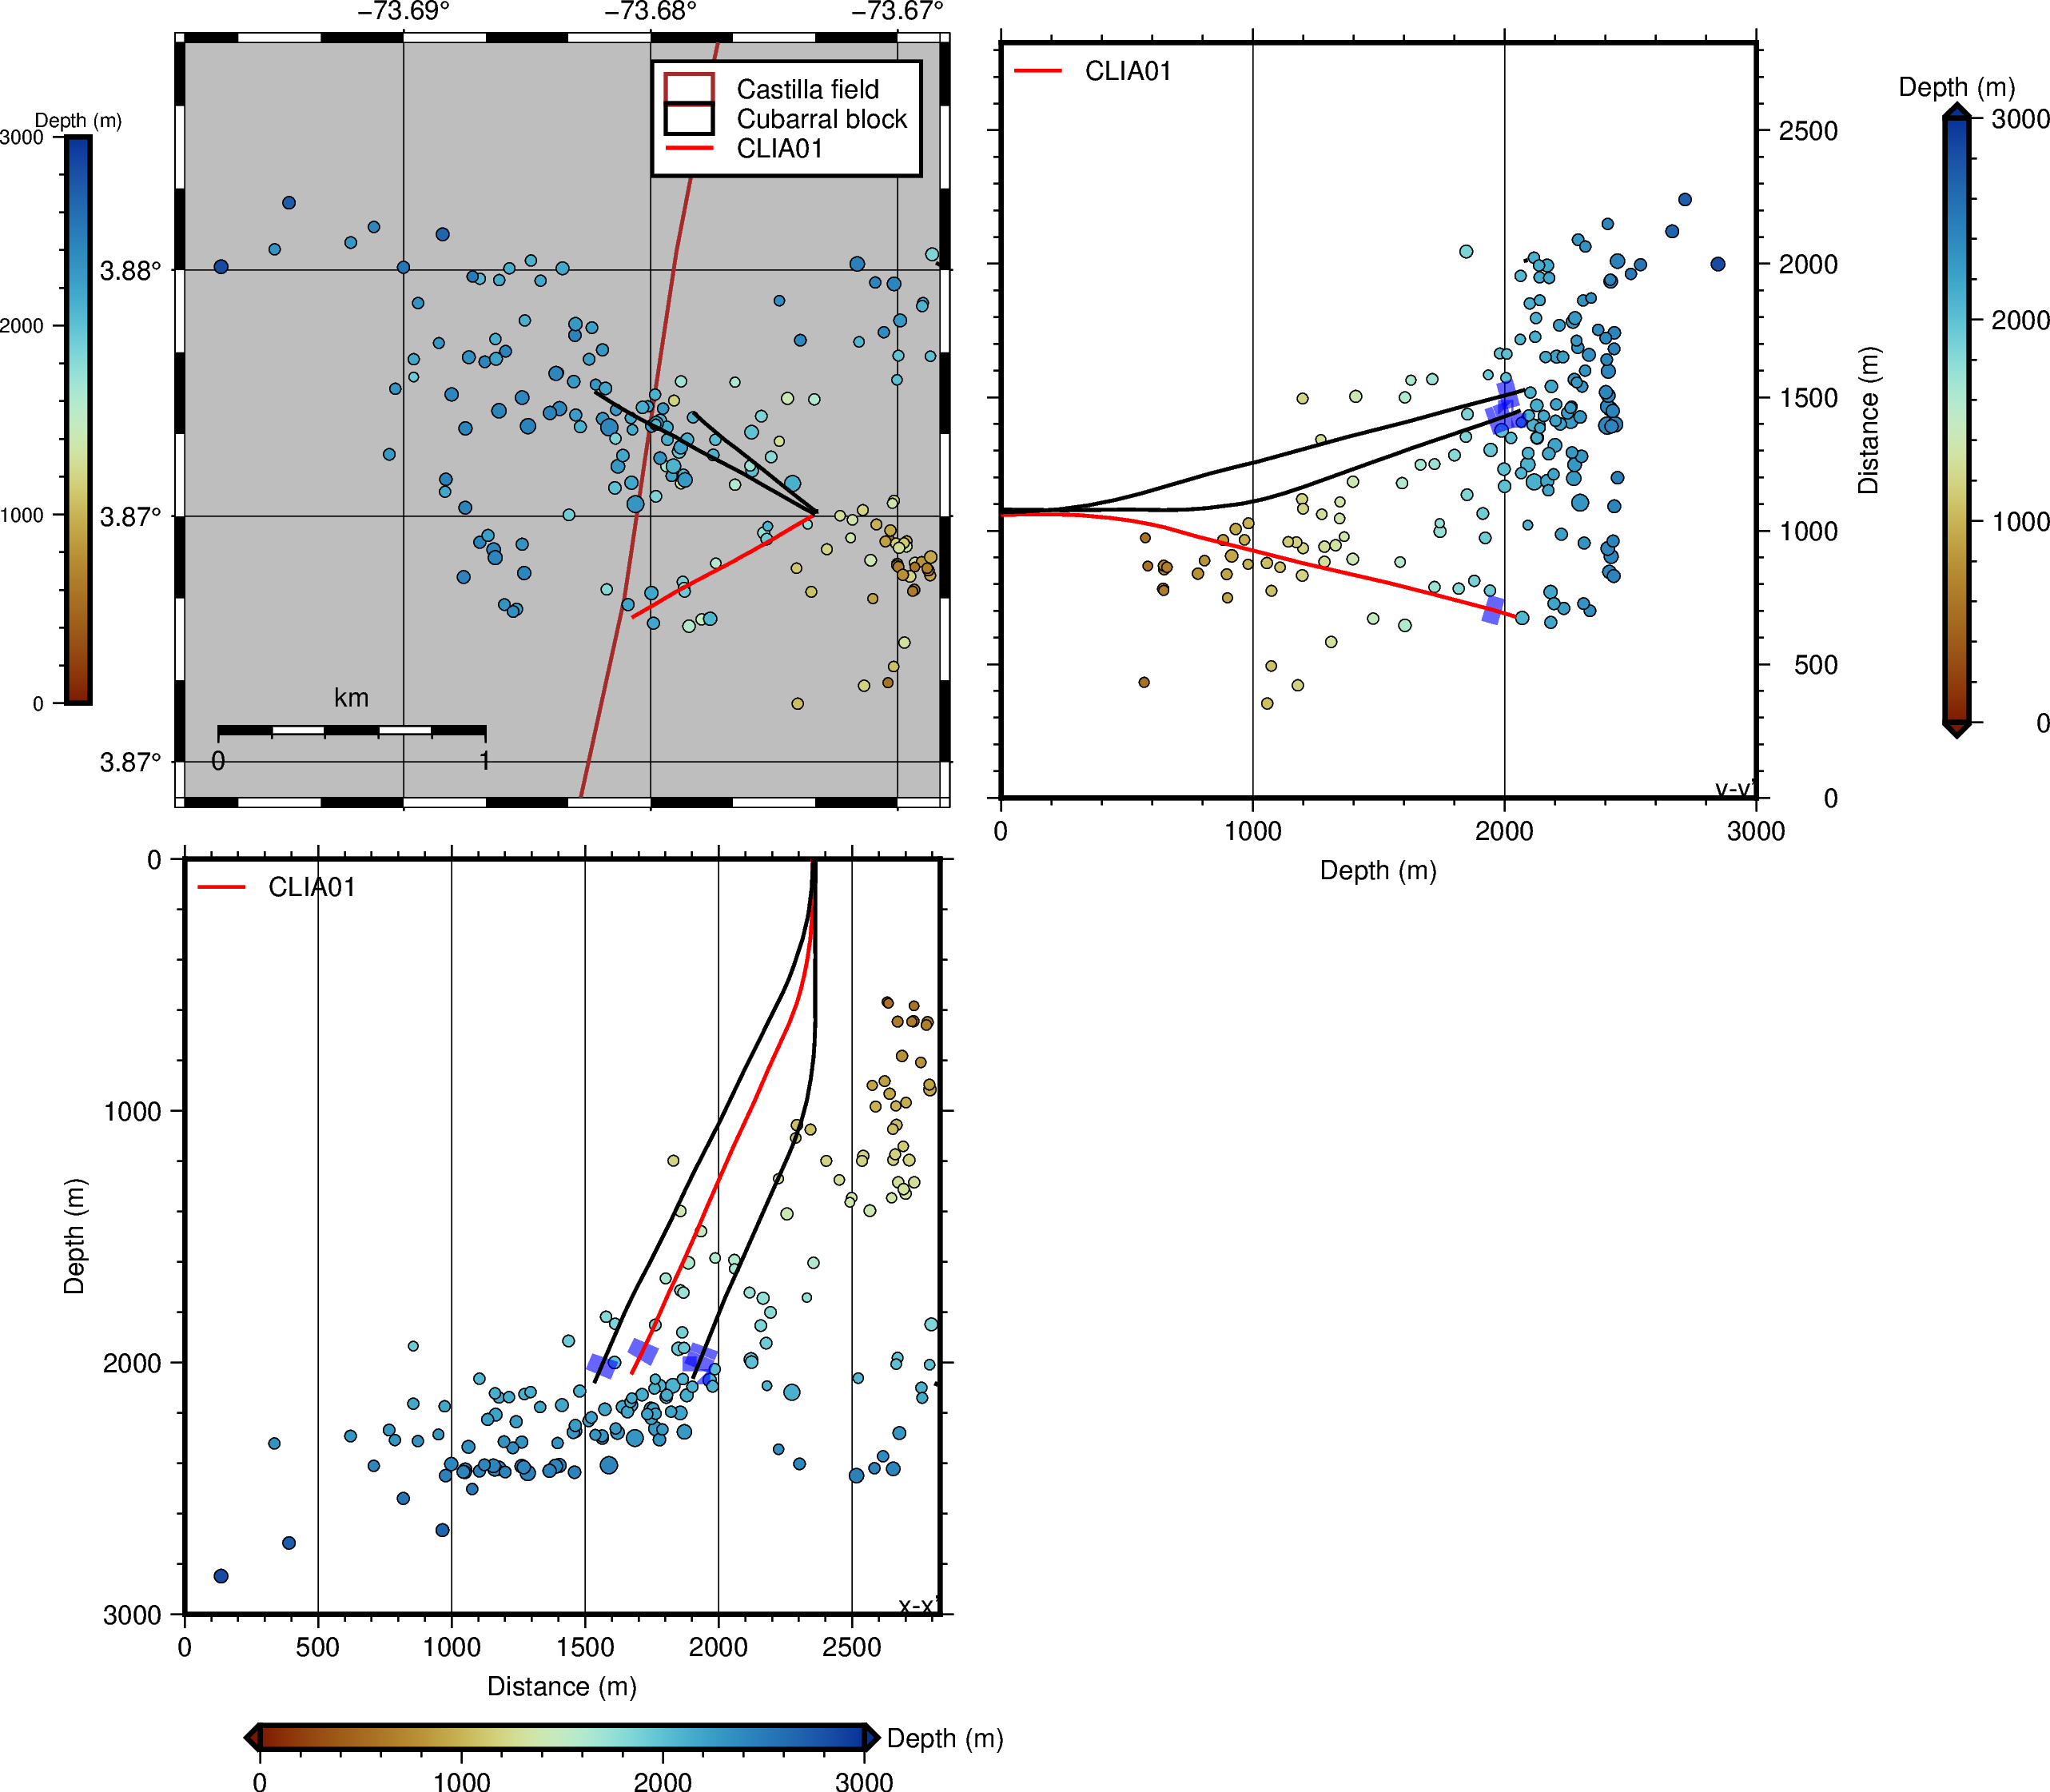

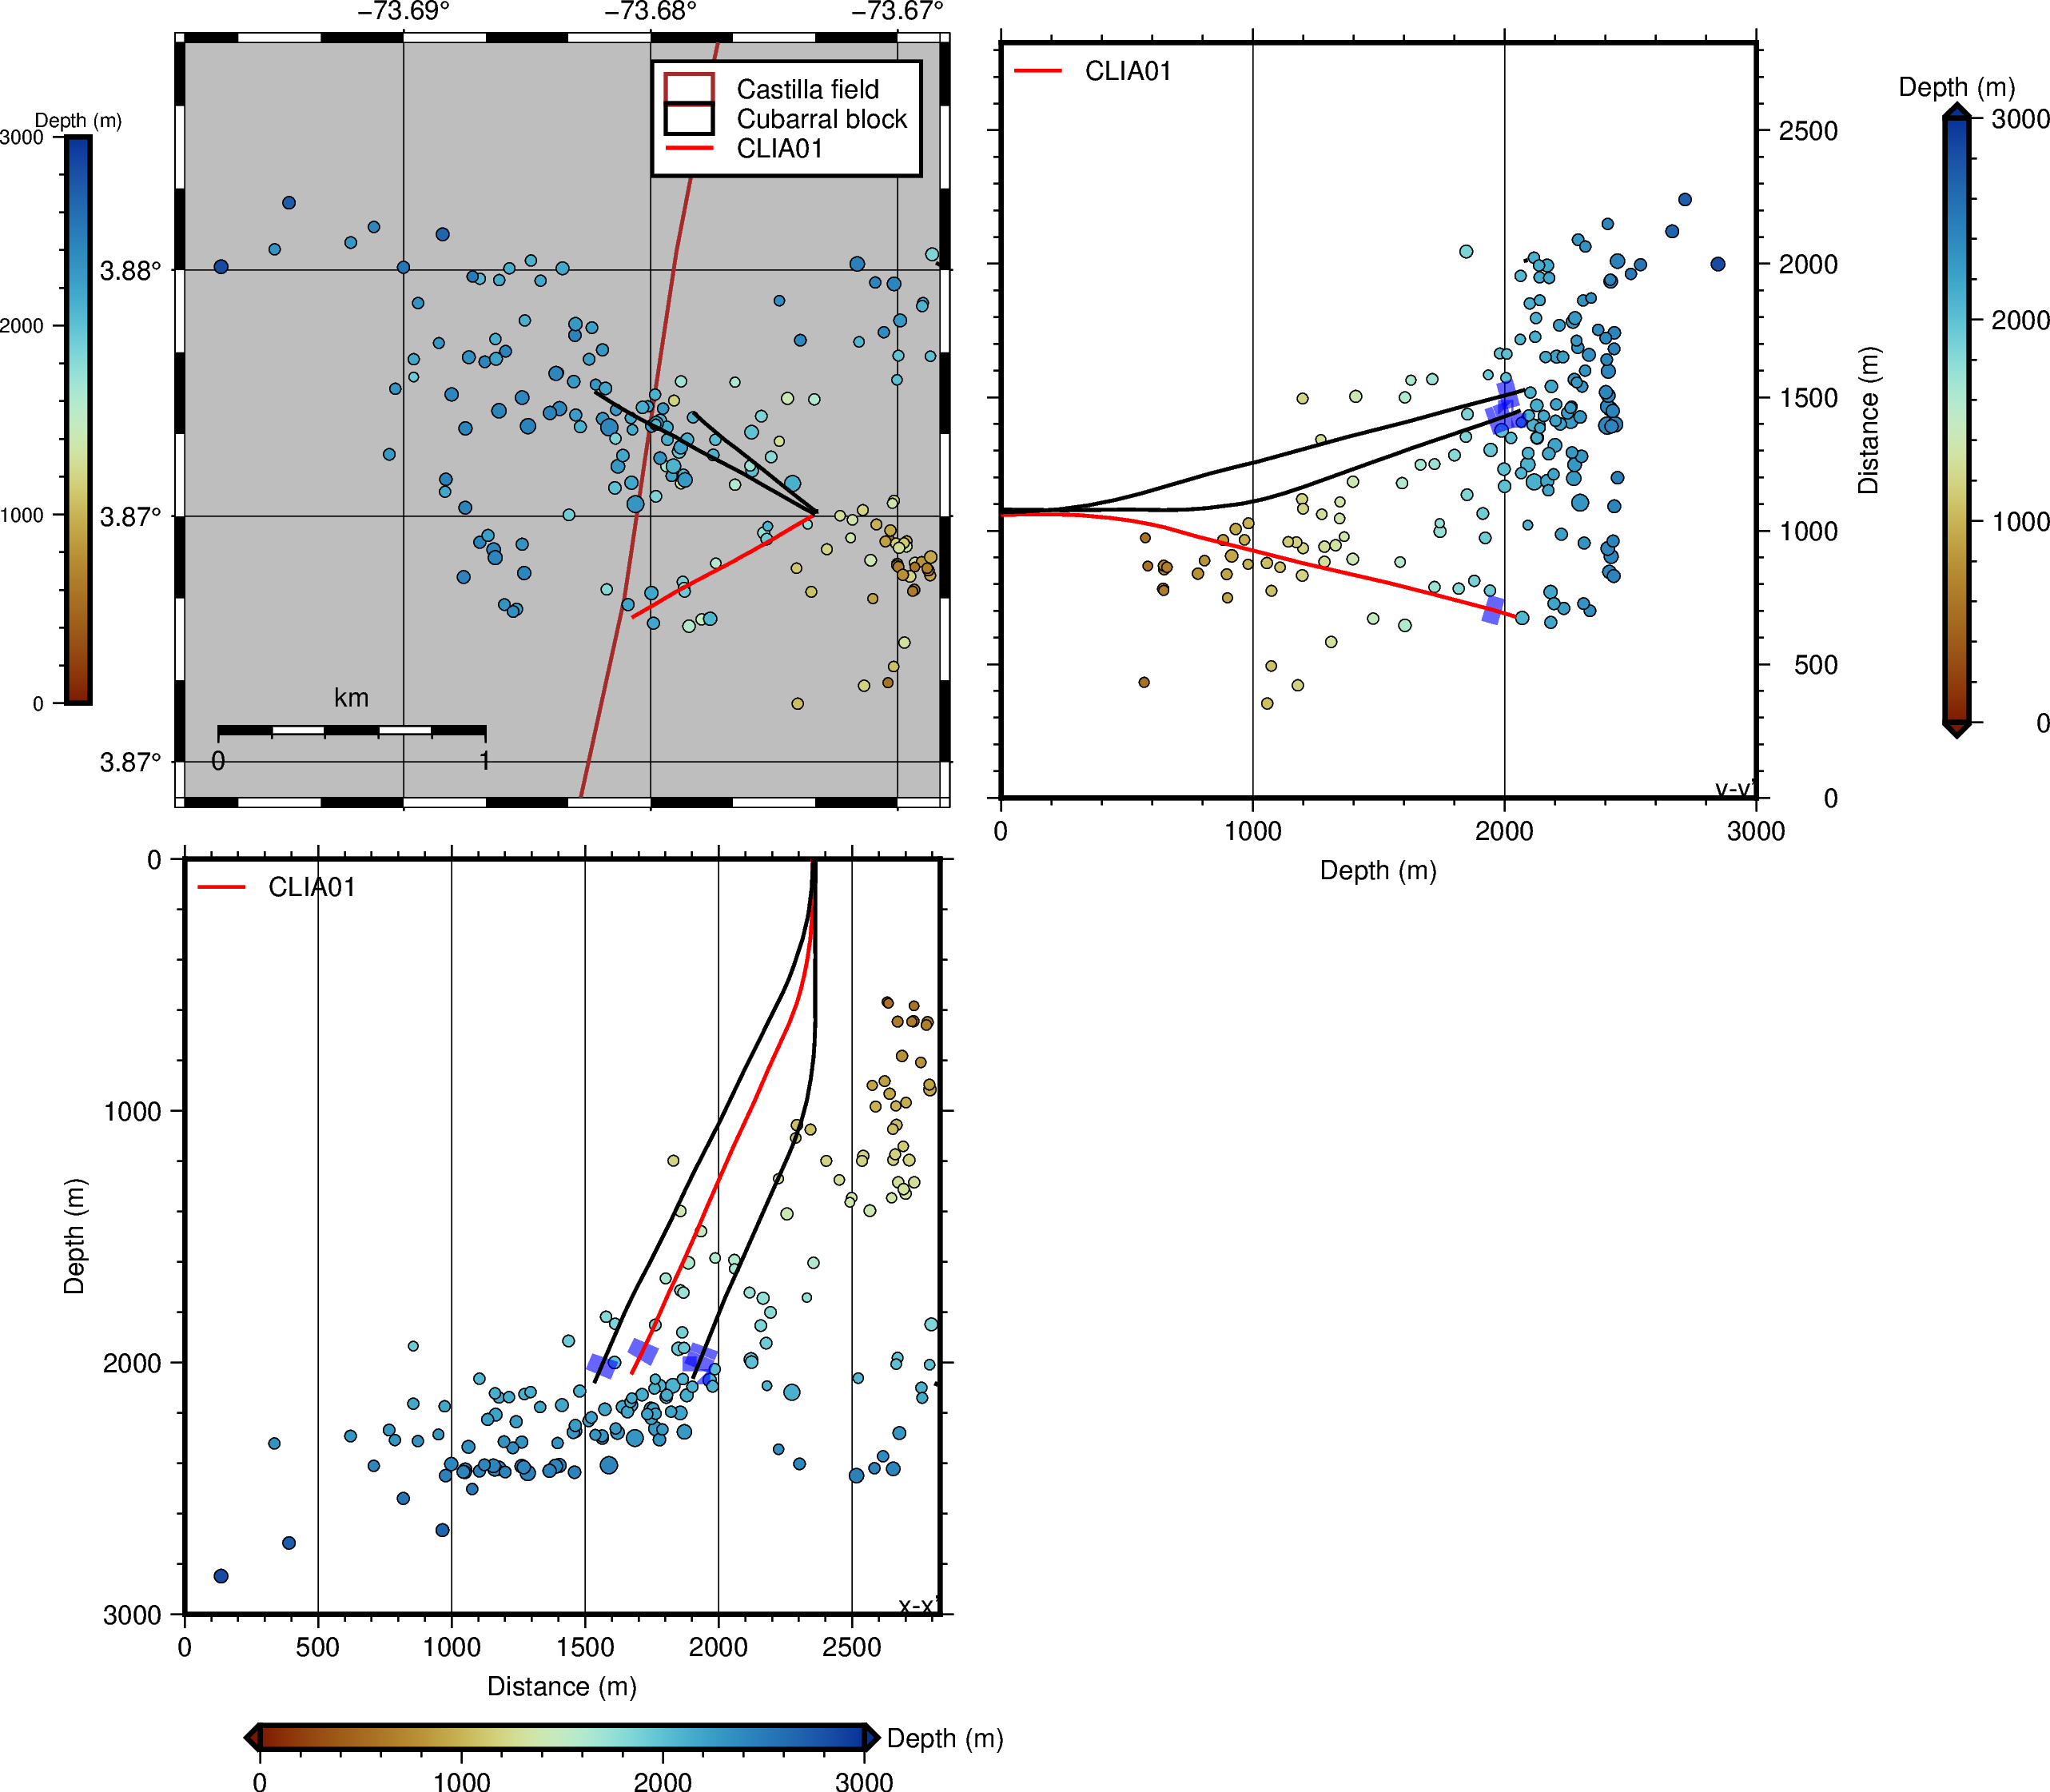

In [12]:
fig = xy_sp.xy_map_and_profile(reg,catalogs=catalogs,
                profile = profile,
                fms=[],
                cmap_args = {"cmap":'roma', #https://github.com/GenericMappingTools/gmt/blob/master/share/cpt/roma.cpt
                                "label":"Depth (m)",
                                "color_target":"depth",
                                "reverse":False,
                                "series":[0, 3e3] },
                map_scale_args = {"xloc":-73.695,
                        "yloc":3.866,
                        "distance":1},
                shapes_before_catalog=shapes_before_catalog,
                wells=wells,
                legend_map=False
                )
fig.show()